In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rc('axes', unicode_minus=False)
from matplotlib import font_manager, rc


# 한글 폰트 깨짐 방지
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [2]:
df = pd.read_csv("C:/Users/eagls/Downloads/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216/제주특별자치도_개별관광(FIT)_증가에_따른_제주_관광객_소비패턴_변화_분석_BC카드_빅데이터_내국인관광객_20170216.csv", encoding='euc-kr')

In [3]:
df

기준년월   관광객 유형 제주 대분류 제주 중분류     업종명 성별 연령대별   카드이용금액    카드이용건수   \
0      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  여  50대  14434000        67   
1      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  남  50대  15119000        72   
2      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  여  40대   7609500        41   
3      2014-09  내국인 관광객   서귀포시    남원읍   농축수산품  남  50대   7092500        40   
4      2014-09  내국인 관광객   서귀포시    대륜동   농축수산품  남  40대   9098500        59   
...        ...      ...    ...    ...     ... ..  ...       ...       ...   
13141  2016-08  내국인 관광객   서귀포시    남원읍      약국  남  30대    252900        43   
13142  2016-08  내국인 관광객   서귀포시    대륜동      약국  남  20대    276100        49   
13143  2016-08  내국인 관광객   서귀포시    대륜동  기타음료식품  남  30대    610850       118   
13144  2016-08  내국인 관광객   서귀포시    대륜동  기타음료식품  여  20대    416900        85   
13145  2016-08  내국인 관광객   서귀포시    대륜동  기타음료식품  여  50대     56200        12   

       건당이용금액     데이터기준일자  
0      215433  2017-02-16  
1      209986  2017-02-16  
2      185598  2017-02-16  
3      177313  2017-02-16  
4      154212  2017-02-16  
...       ...         ...  
13141    5881  2017-02-16  
13142    5635  2017-02-16  
13143    5177  2017-02-16  
13144    4905  2017-02-16  
13145    4683  2017-02-16  

[13146 rows x 11 columns]

In [4]:
df.isnull().sum()

기준년월        0
관광객 유형      0
제주 대분류      0
제주 중분류      0
업종명         0
성별          0
연령대별        0
 카드이용금액     0
 카드이용건수     0
건당이용금액      0
데이터기준일자     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(13146, 11)

In [7]:
df.describe()

카드이용금액        카드이용건수          건당이용금액
count  1.314600e+04  13146.000000   13146.000000
mean   3.697184e+06    133.308079   35163.811273
std    6.232327e+06    210.459082   35421.702281
min    3.610000e+04     10.000000    3520.000000
25%    5.958600e+05     23.000000   13939.250000
50%    1.533550e+06     54.000000   21007.500000
75%    3.863175e+06    143.000000   46235.750000
max    6.427770e+07   2574.000000  539047.000000

In [8]:
print(df.columns)  # Print column names
print(df.dtypes)   # Print data types of columns


Index(['기준년월', '관광객 유형', '제주 대분류', '제주 중분류', '업종명', '성별', '연령대별', ' 카드이용금액 ',
       ' 카드이용건수 ', '건당이용금액', '데이터기준일자'],
      dtype='object')
기준년월        object
관광객 유형      object
제주 대분류      object
제주 중분류      object
업종명         object
성별          object
연령대별        object
 카드이용금액      int64
 카드이용건수      int64
건당이용금액       int64
데이터기준일자     object
dtype: object


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13146 entries, 0 to 13145
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   기준년월      13146 non-null  object
 1   관광객 유형    13146 non-null  object
 2   제주 대분류    13146 non-null  object
 3   제주 중분류    13146 non-null  object
 4   업종명       13146 non-null  object
 5   성별        13146 non-null  object
 6   연령대별      13146 non-null  object
 7    카드이용금액   13146 non-null  int64 
 8    카드이용건수   13146 non-null  int64 
 9   건당이용금액    13146 non-null  int64 
 10  데이터기준일자   13146 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


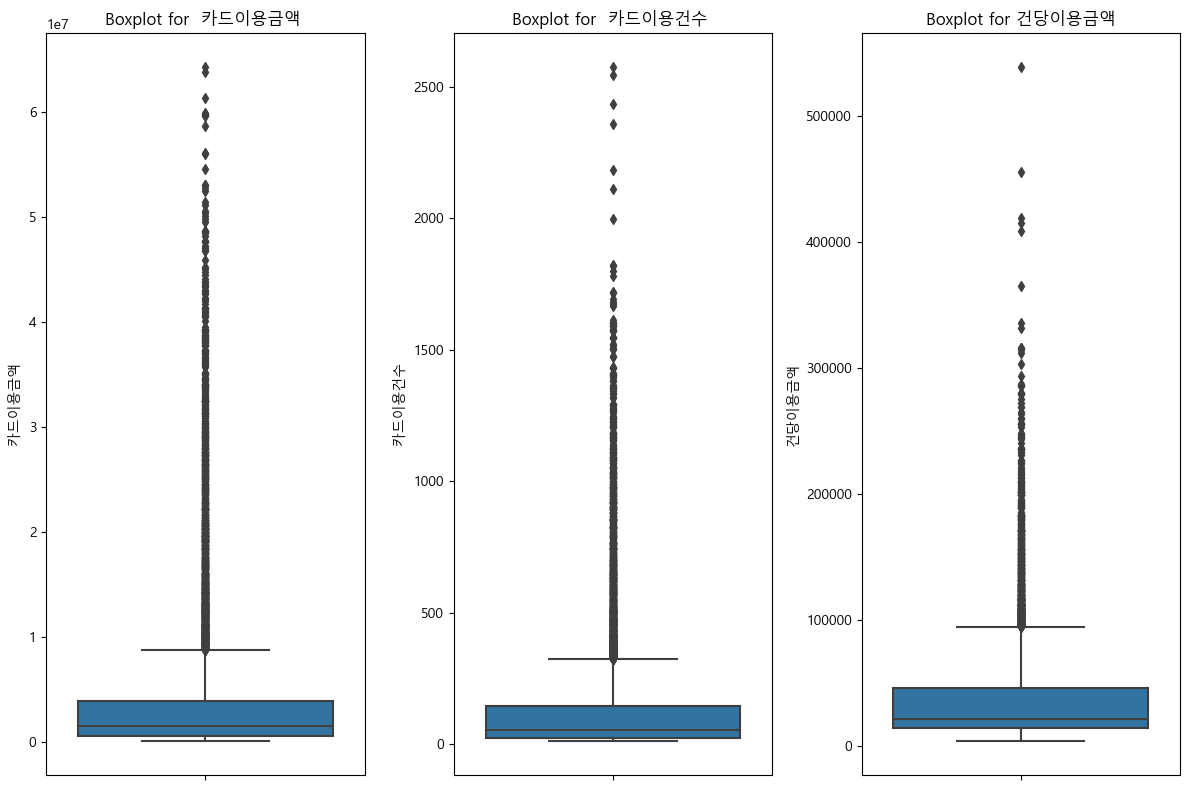

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
target_data = [' 카드이용금액 ', ' 카드이용건수 ', '건당이용금액']
for i, column in enumerate(target_data):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [11]:
df[['년', '월']] = df['기준년월'].str.split('-', expand=True)

# If you want to convert the new columns to numeric values, you can do:
df['년'] = pd.to_numeric(df['년'])
df['월'] = pd.to_numeric(df['월'])



In [12]:
def generate_season(date):
    month = int(date[6:]) if date[5] == '0' else int(date[5:])
    if 3 <= month <= 5:
        return 1
    elif 6 <= month <= 8:
        return 2
    elif 9 <= month <= 11:
        return 3
    else:
        return 4

df['계절'] = df['기준년월'].apply(generate_season)

In [13]:
year = df.groupby('년')['년'].value_counts().reset_index()

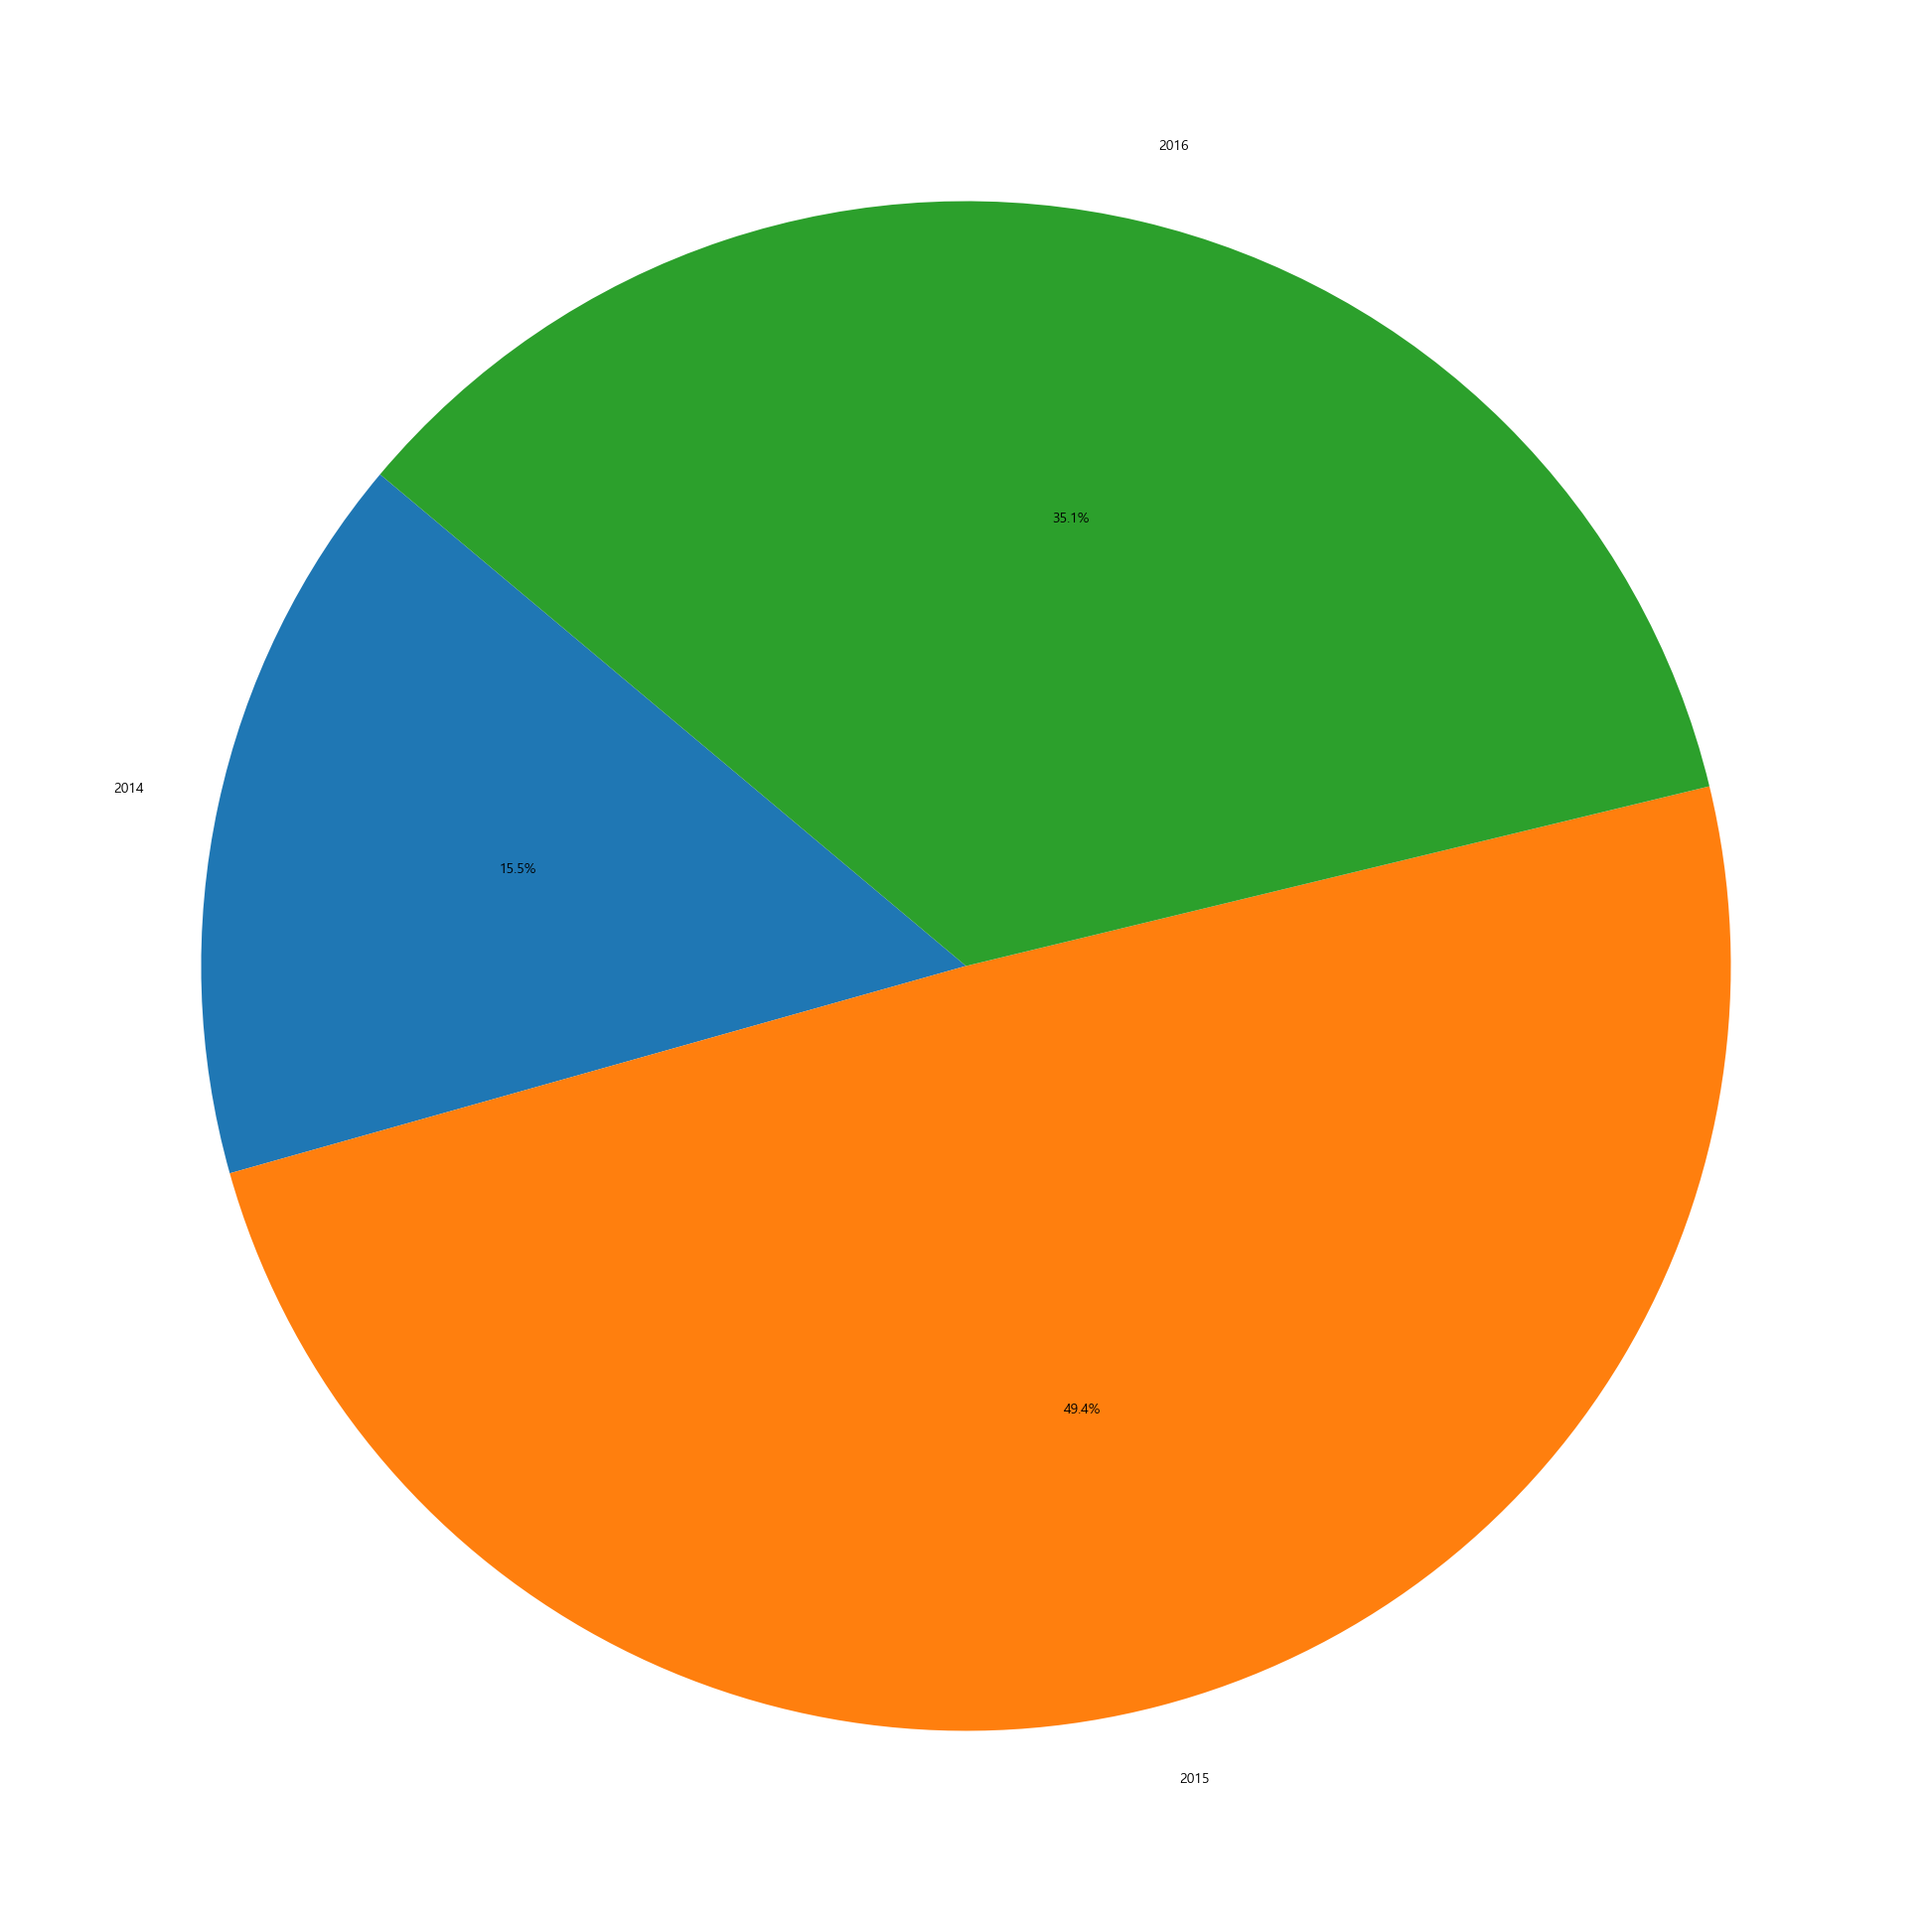

In [14]:
plt.figure(figsize=(25, 25))
plt.pie(year['count'], labels=year['년'], autopct='%1.1f%%', startangle=140)
plt.show()

- 2015년도 데이터가 제일많음을 알 수 있다

In [27]:
month = df.groupby('월')['월'].value_counts().reset_index()

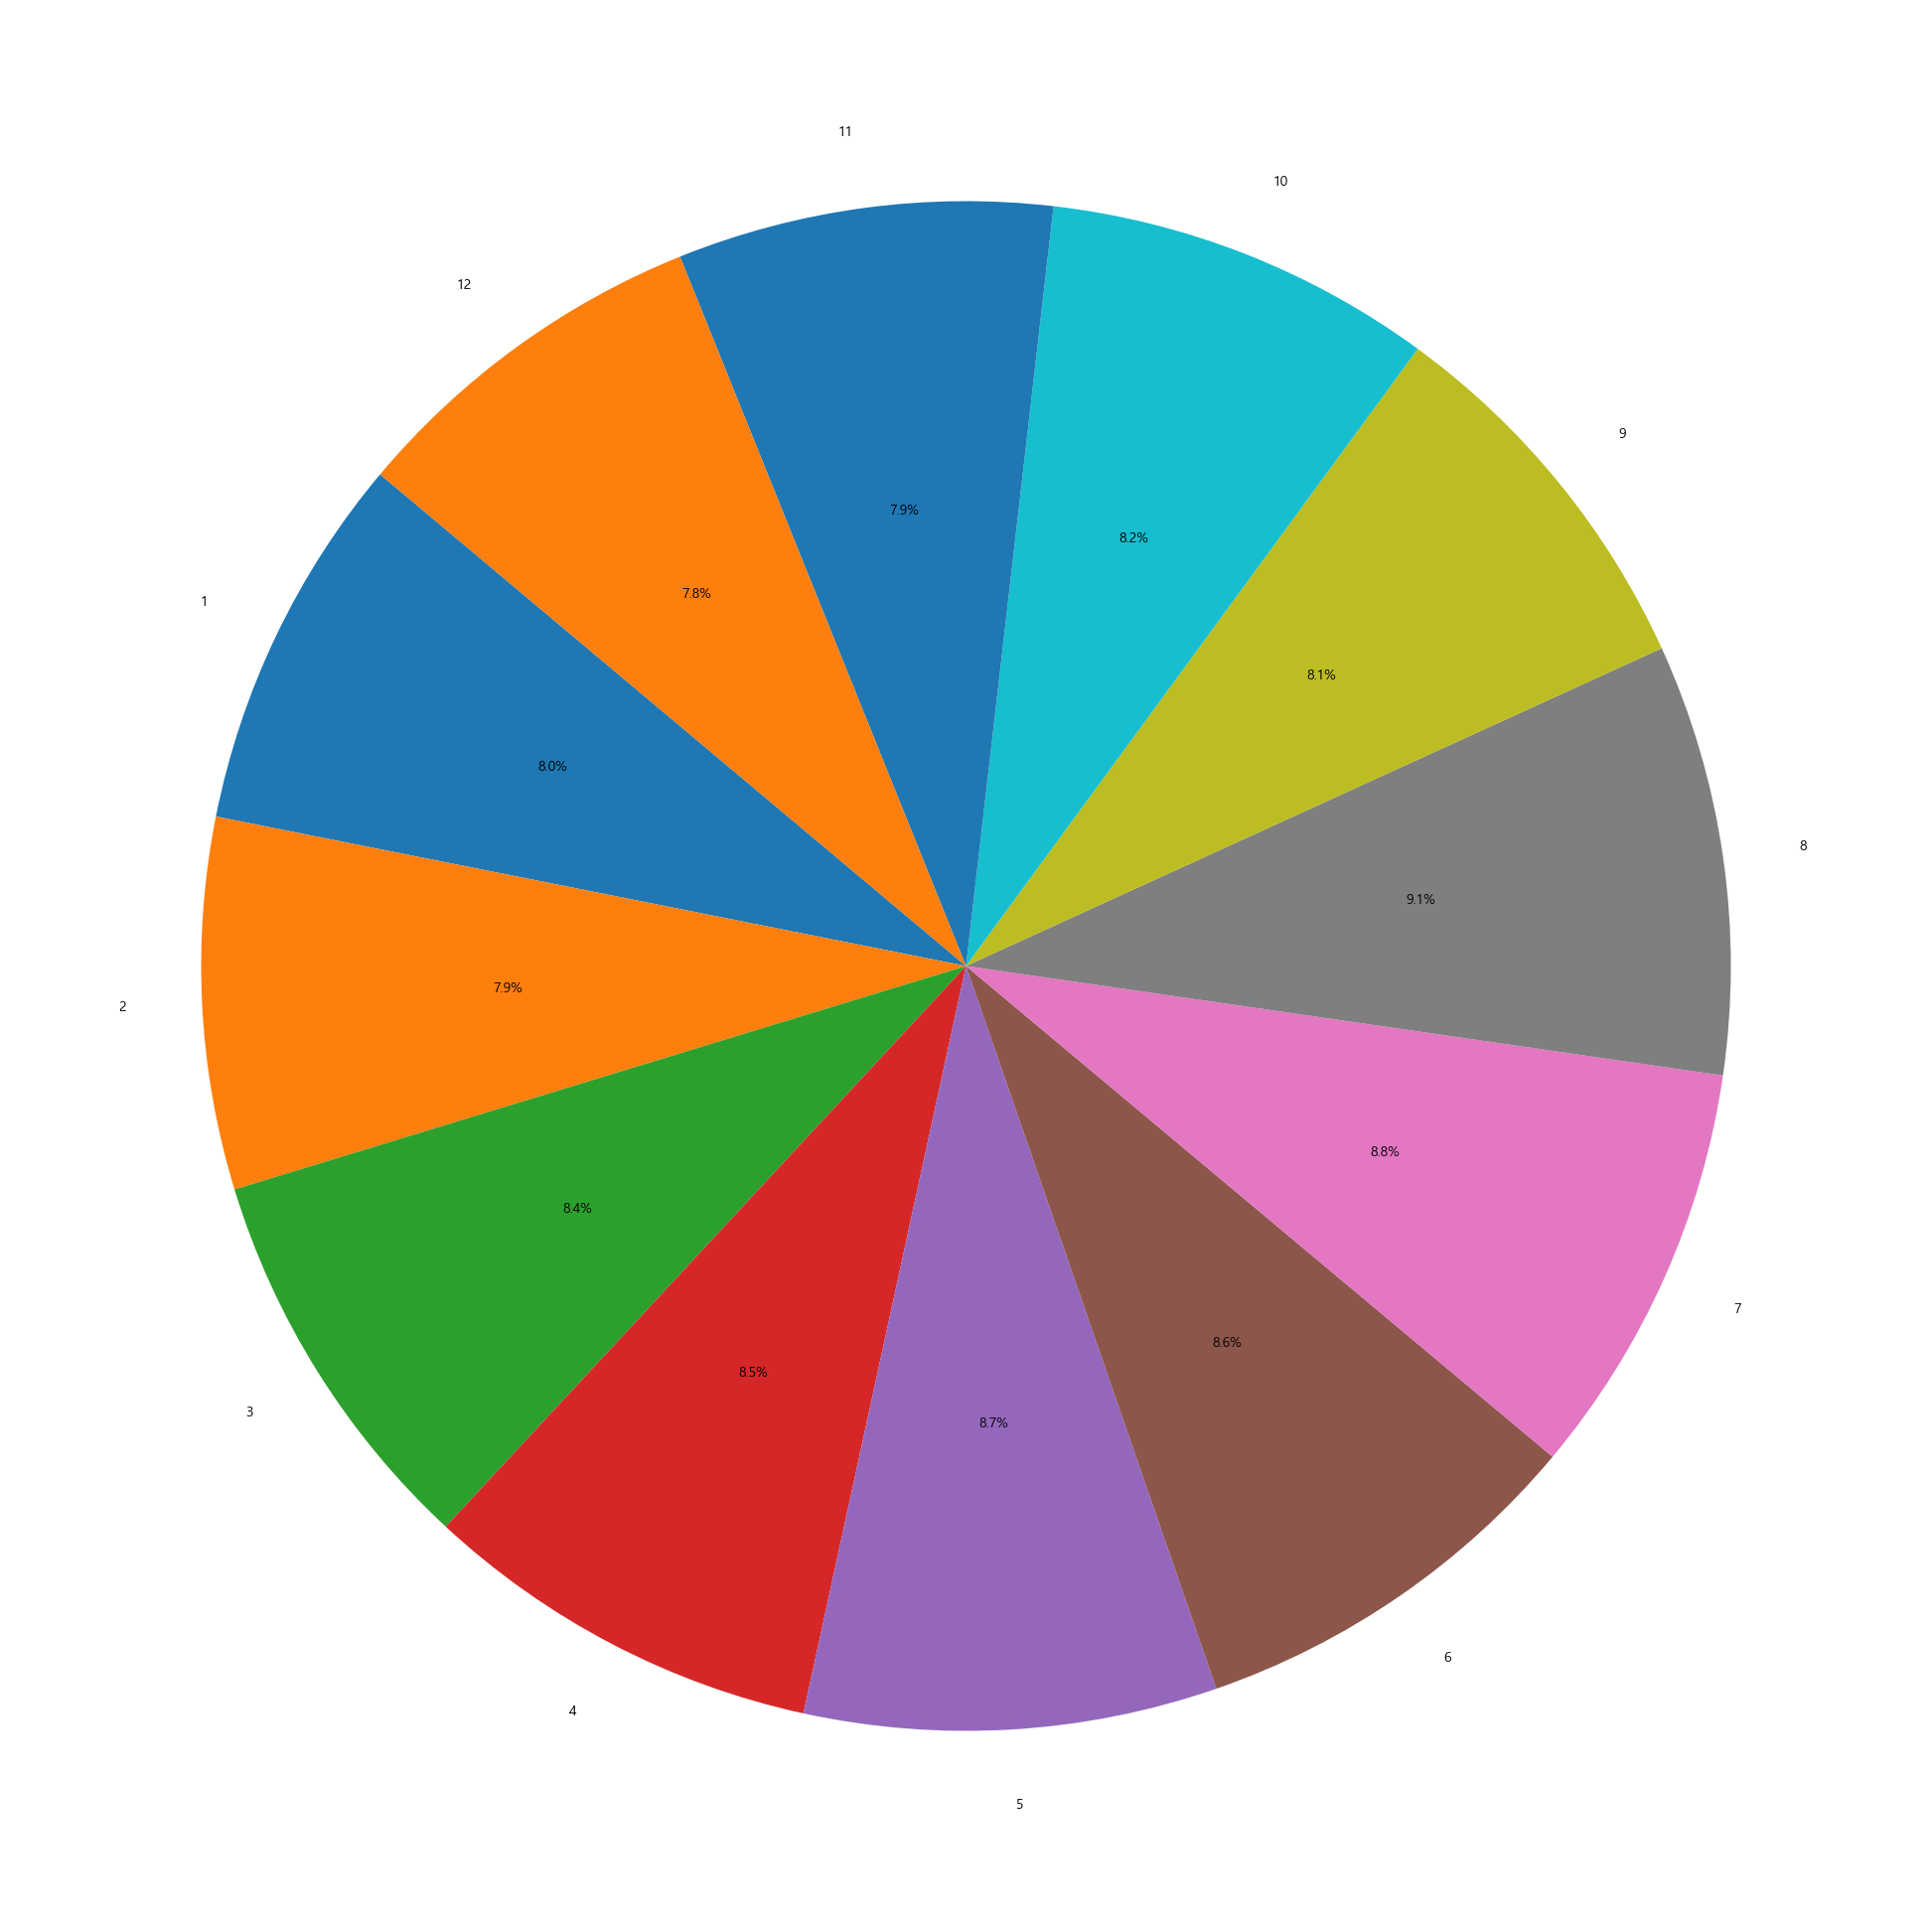

In [28]:
plt.figure(figsize=(25, 25))
plt.pie(month['count'], labels=month['월'], autopct='%1.1f%%', startangle=140)
plt.show()

- 특출나게 손님이 많은 월이 업이 엇비슷하게 균등하게 배분되어있다

In [26]:
season = df.groupby('계절')['계절'].value_counts().reset_index()

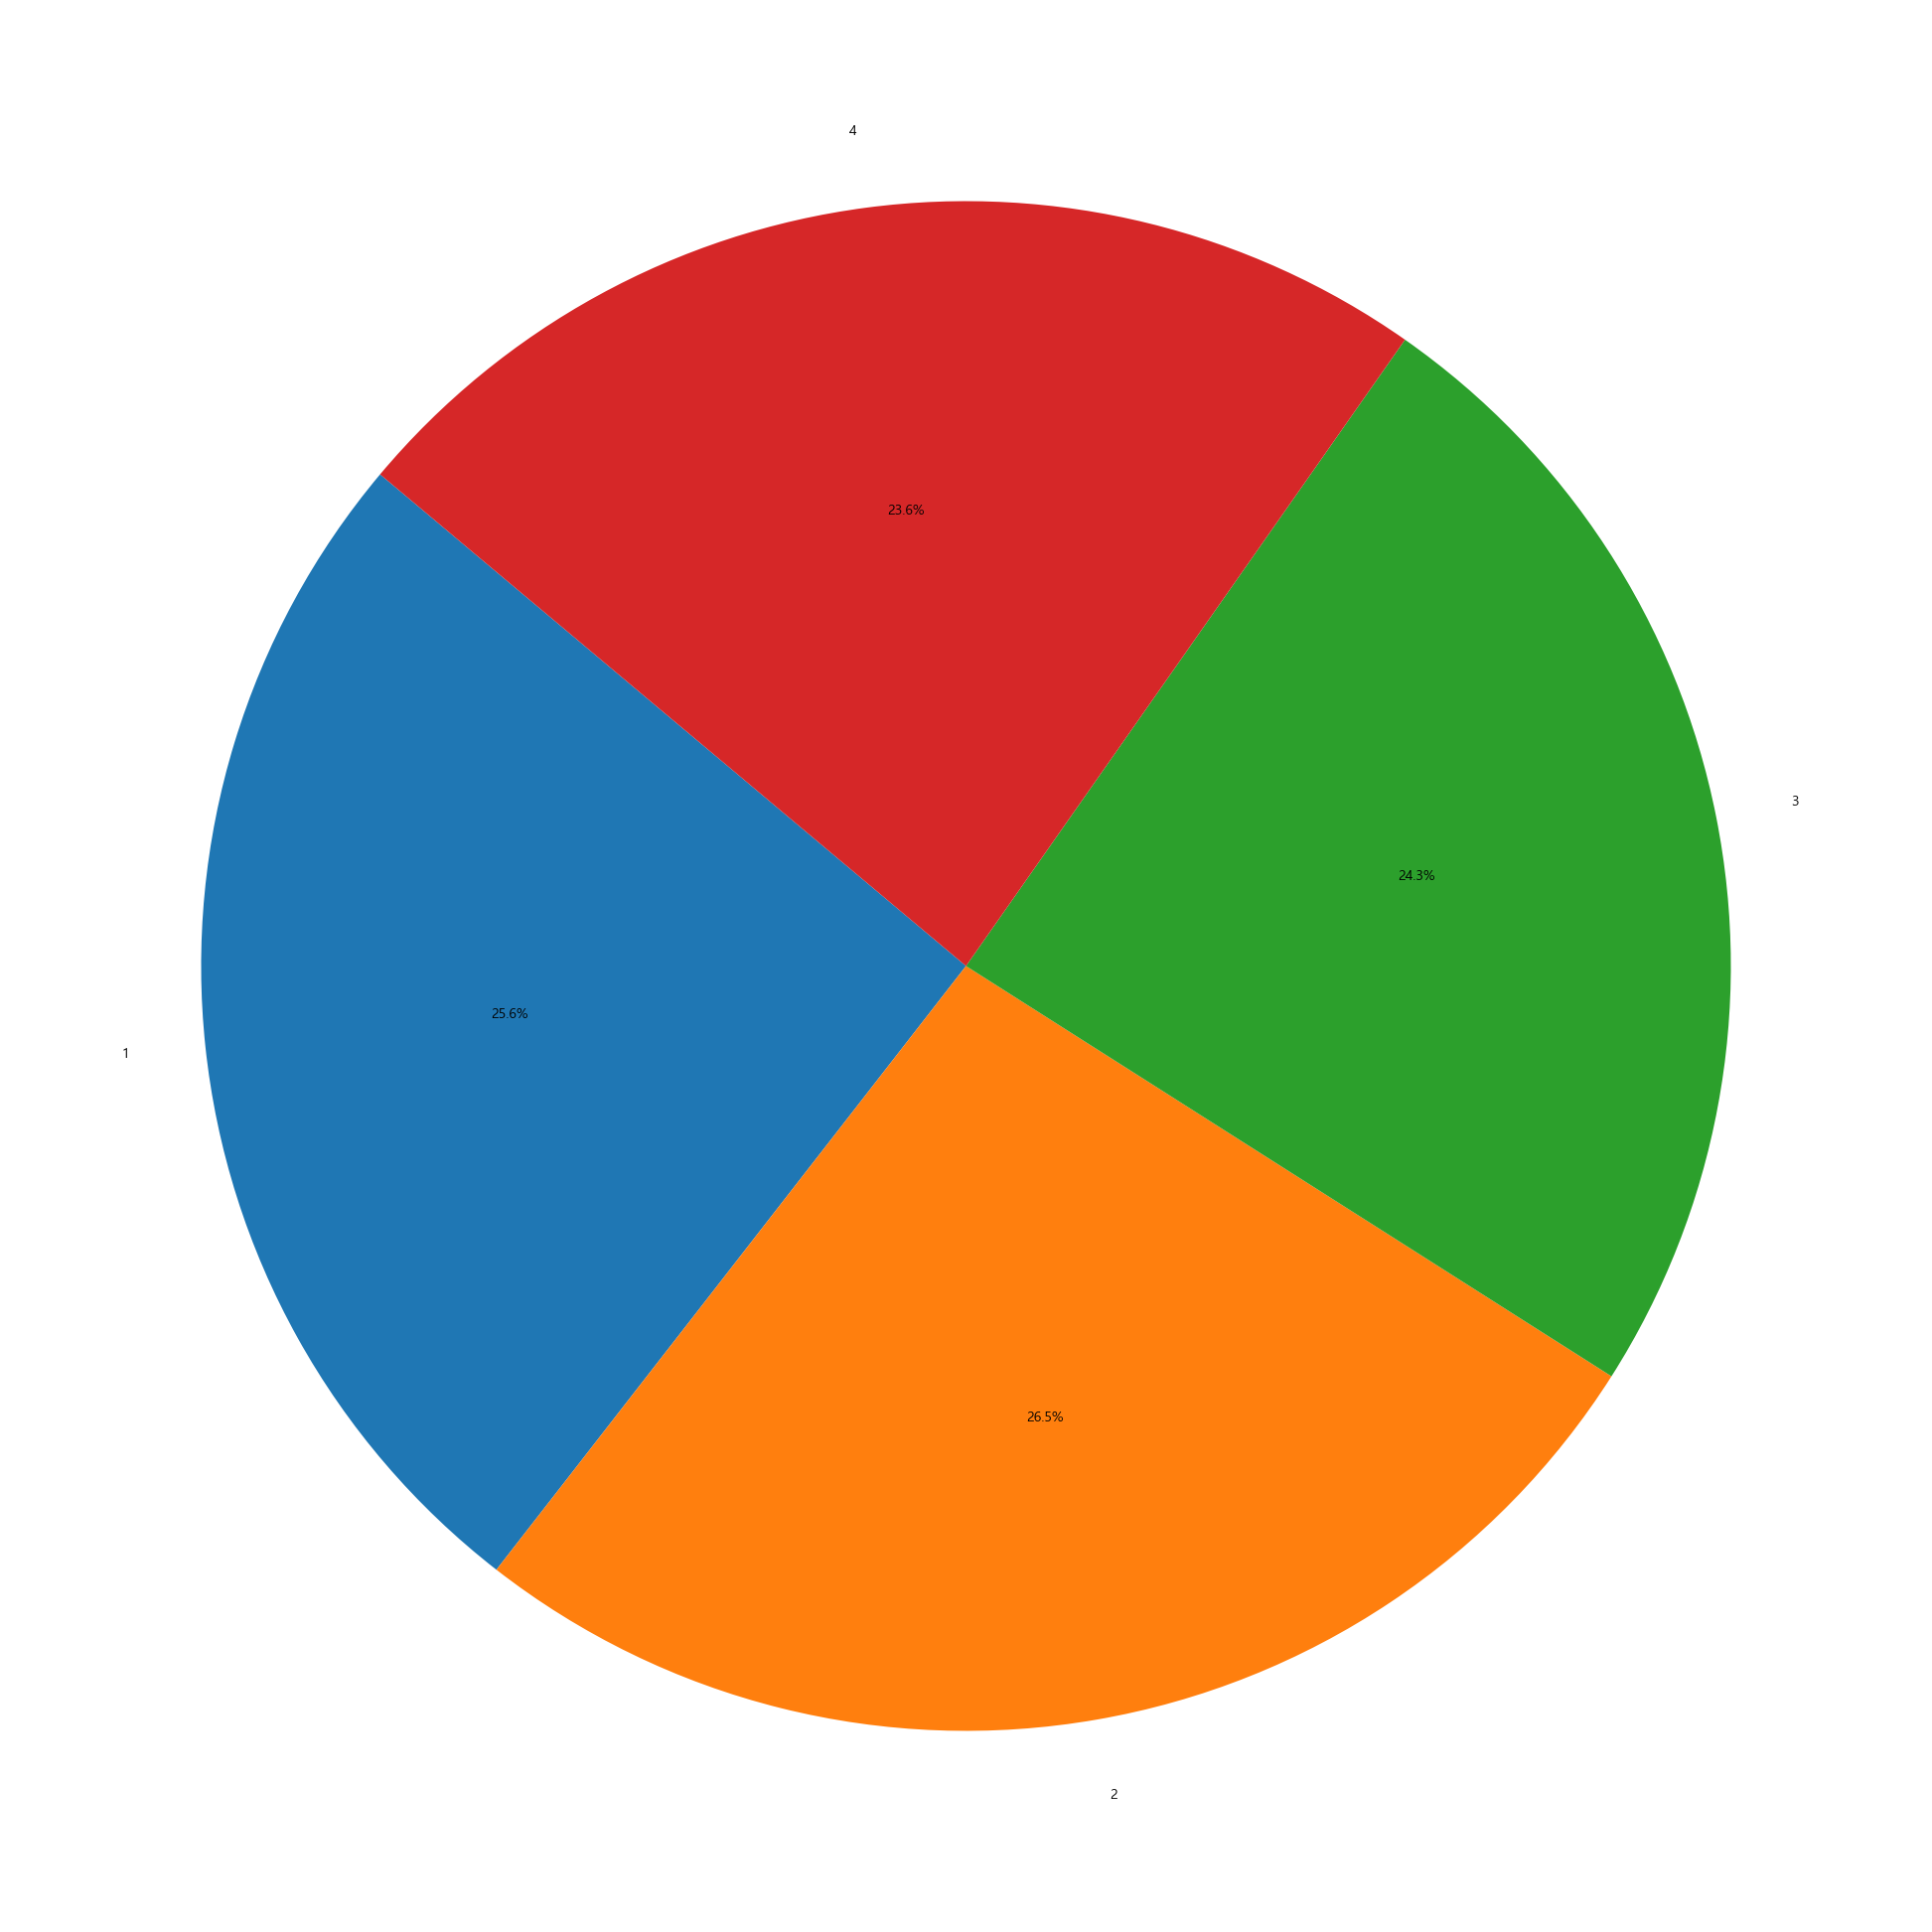

In [29]:
plt.figure(figsize=(25, 25))
plt.pie(season['count'], labels=season['계절'], autopct='%1.1f%%', startangle=140)
plt.show()

- 큰차이는 없지만 여름 봄 가을 겨울순으로 방문자가 많다

In [17]:
gender = df.groupby('성별')['성별'].count().reset_index(name='count')

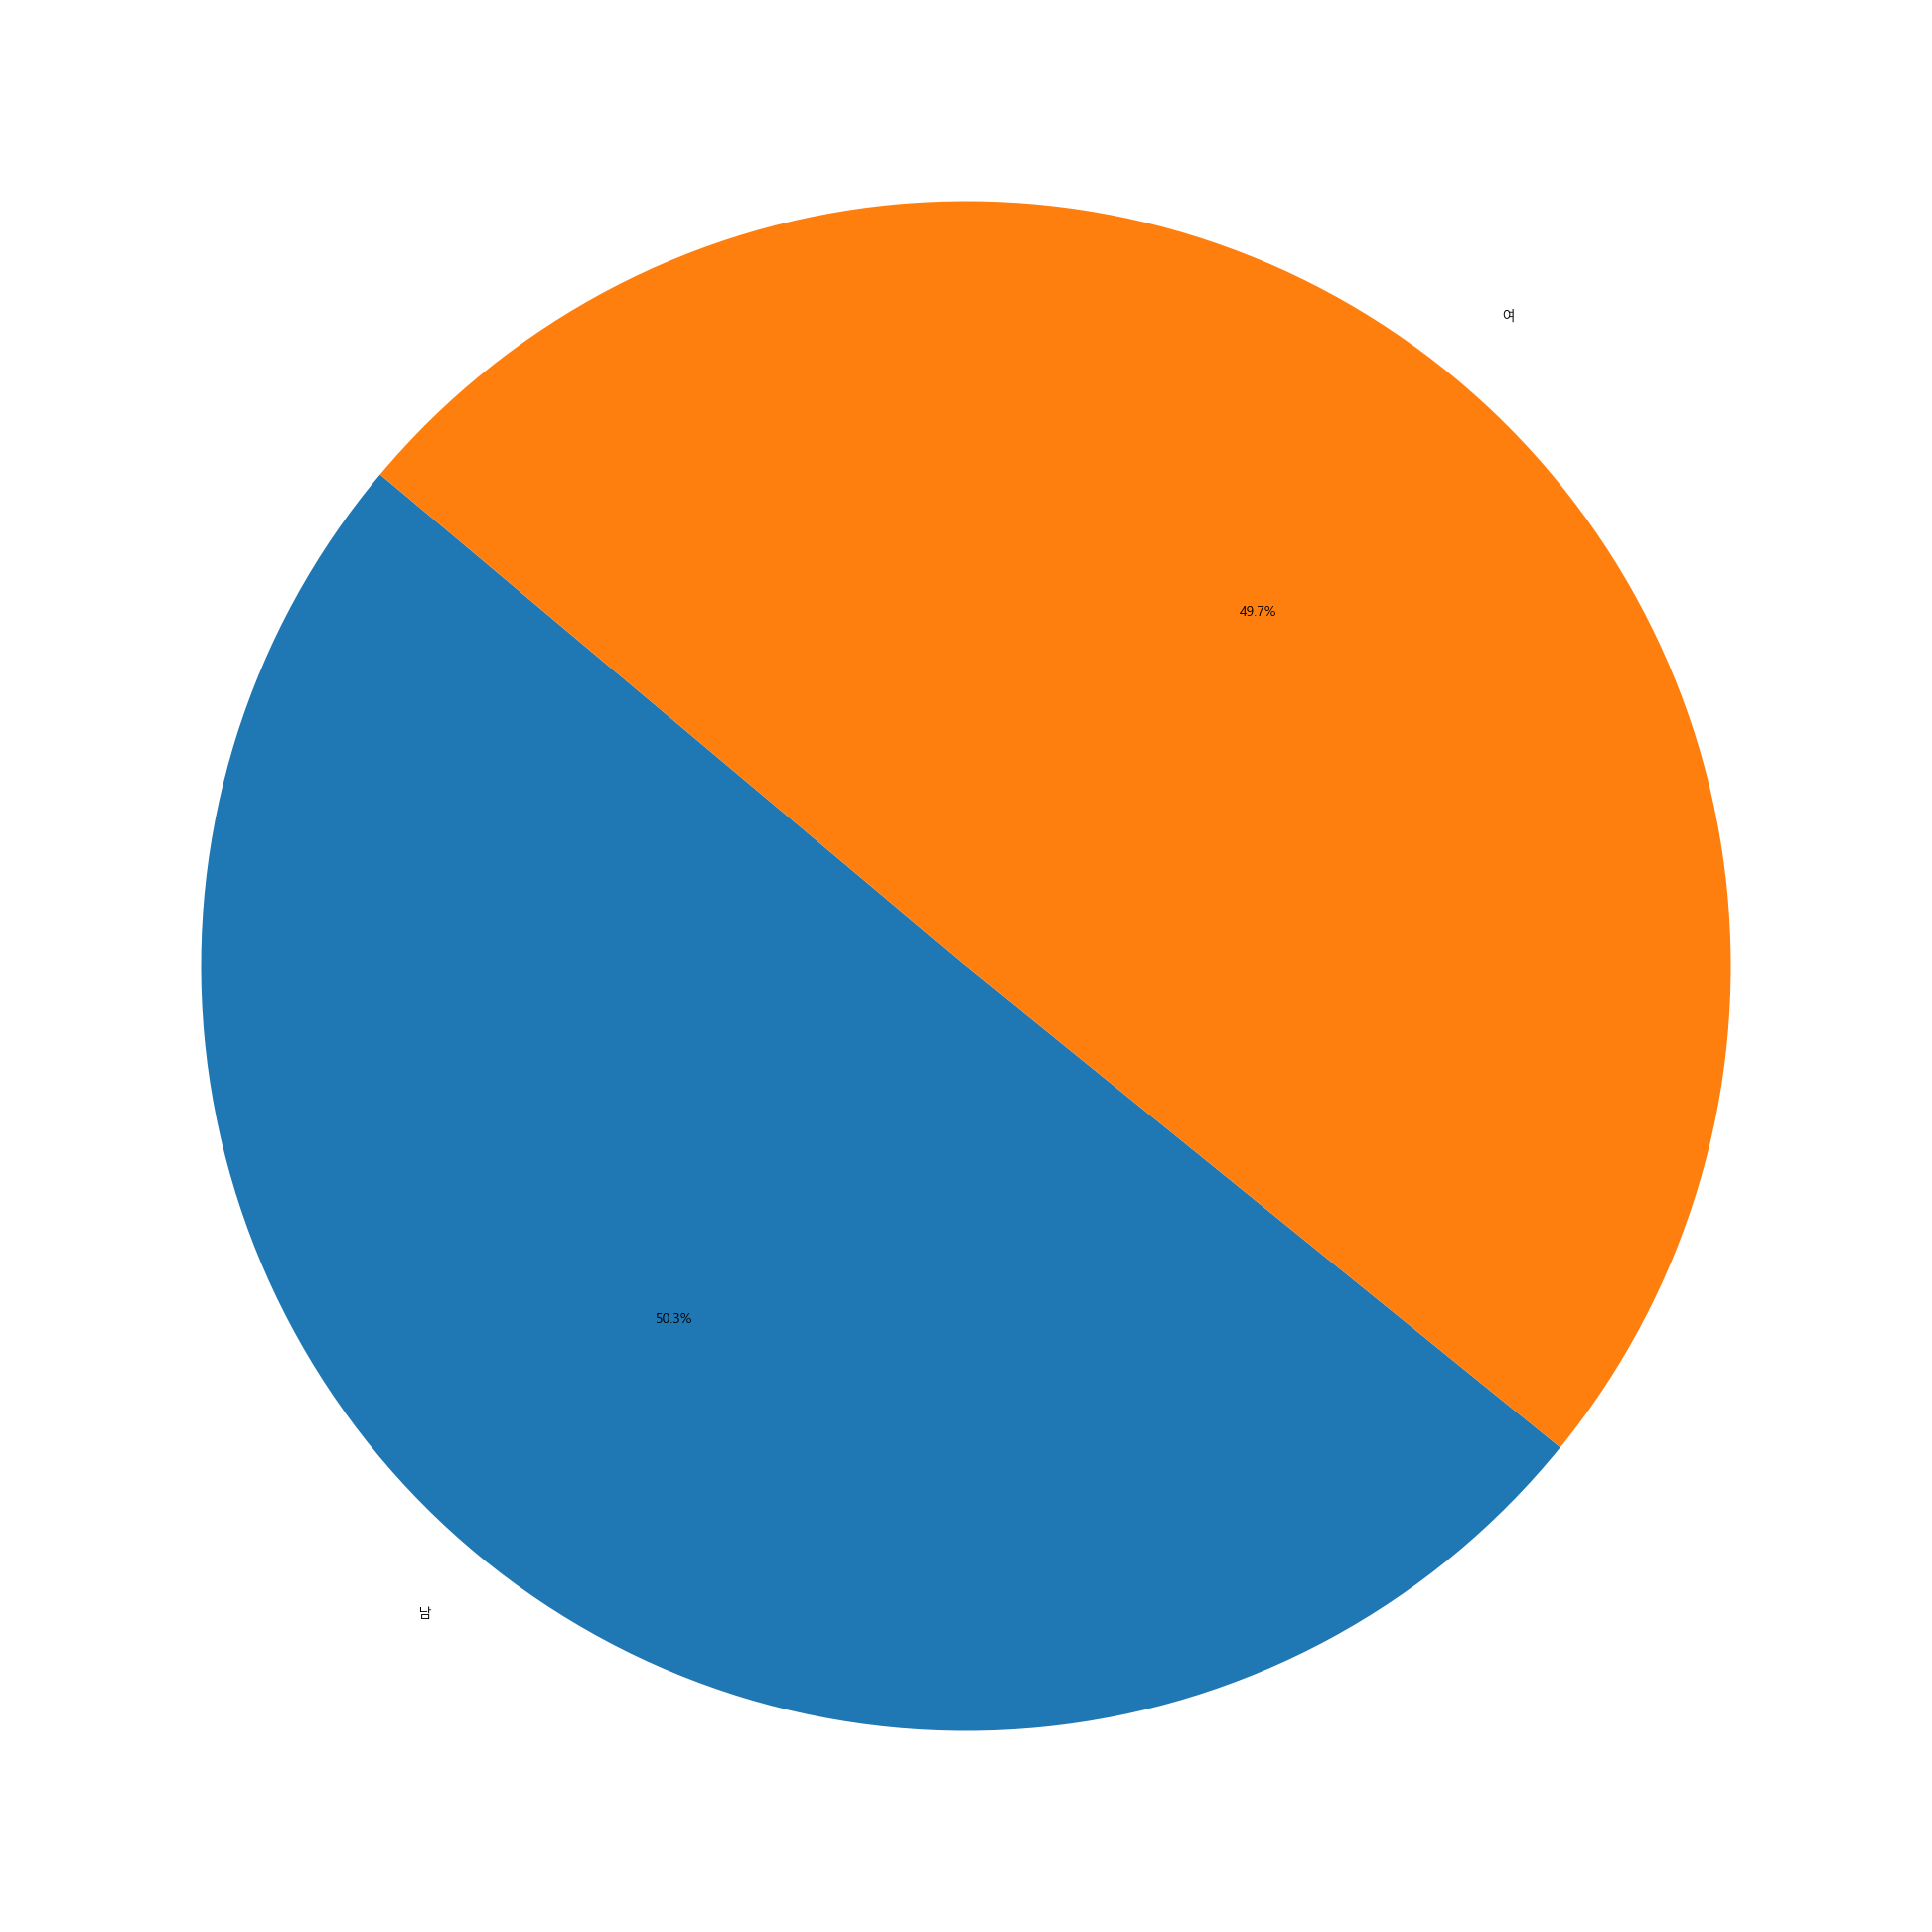

In [18]:
plt.figure(figsize=(25, 25))
plt.pie(gender['count'], labels=gender['성별'], autopct='%1.1f%%', startangle=140)
plt.show()

- 데이터내 남녀 비율을 거의 동일하다

In [19]:
df_si= df['제주 대분류'].value_counts().reset_index()

In [20]:
df_si

제주 대분류  count
0    제주시   8729
1   서귀포시   4417

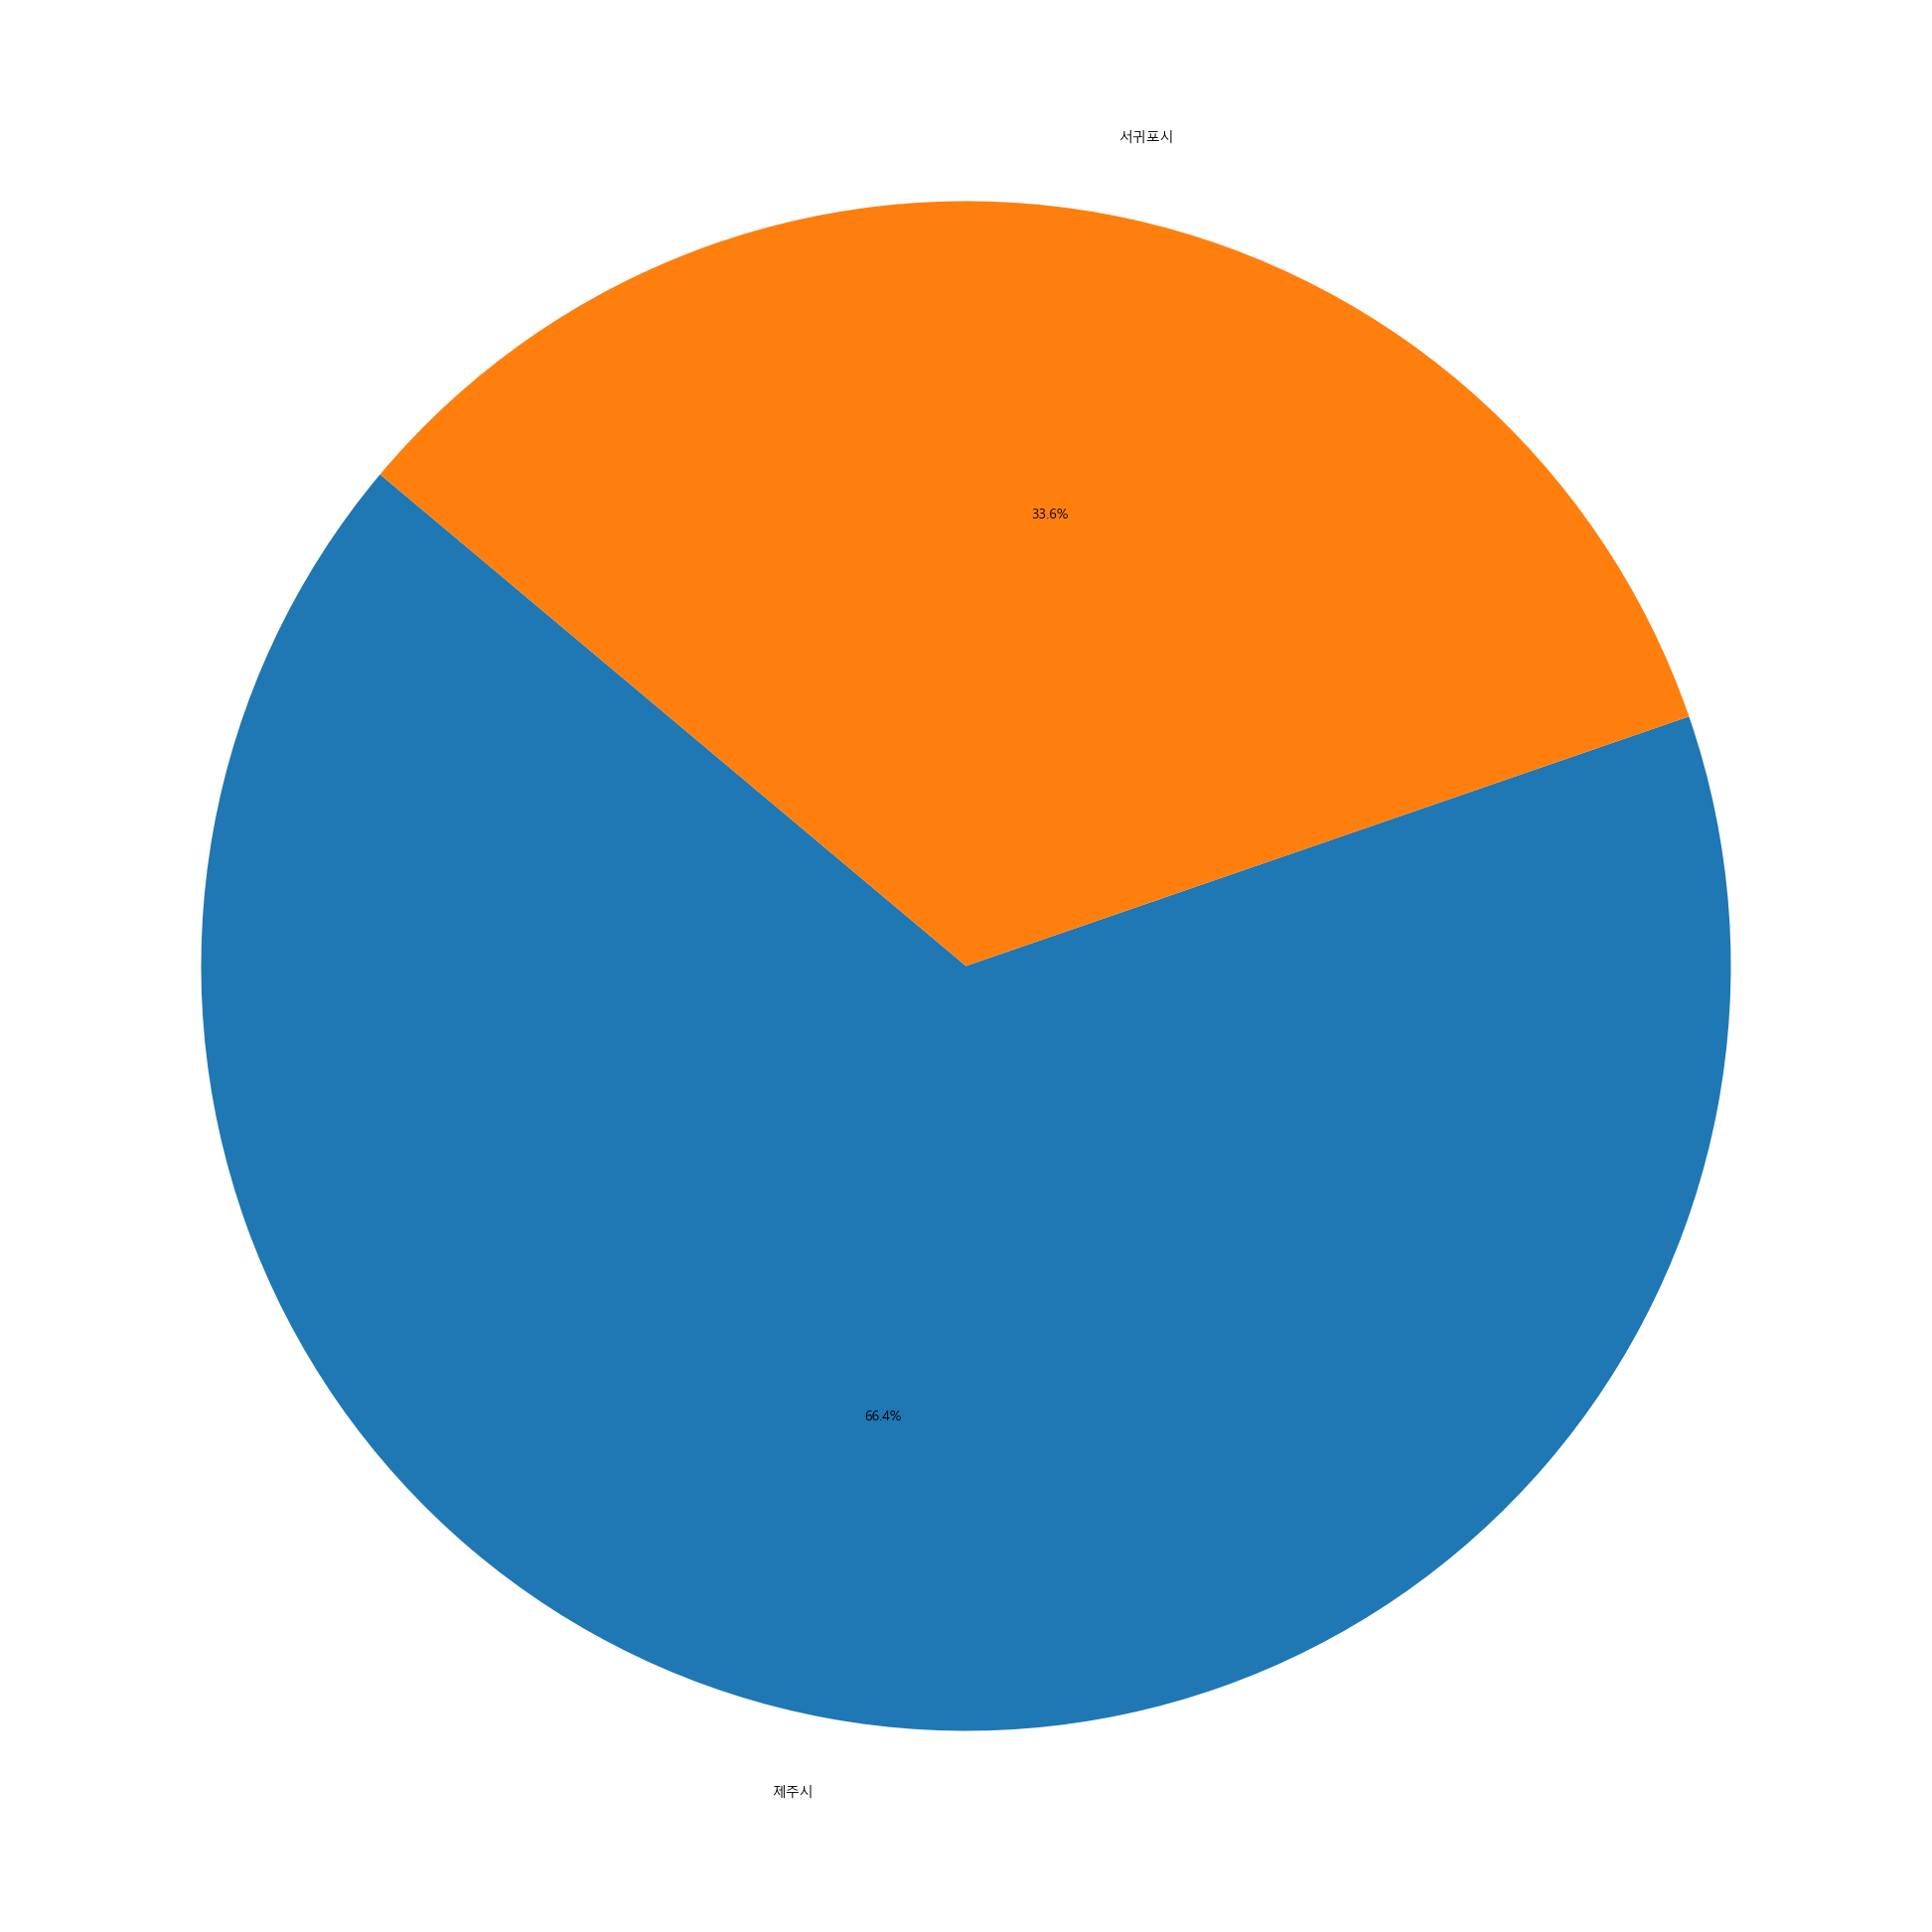

In [21]:
plt.figure(figsize=(25, 25))
plt.pie(df_si['count'], labels=df_si['제주 대분류'], autopct='%1.1f%%', startangle=140)
plt.show()

- 제주시에 여행객이 더 많이 온다

In [22]:
si_type = df.groupby(['제주 대분류','업종명'])['업종명'].count().reset_index(name='count')

In [23]:
si_type

제주 대분류      업종명  count
0    서귀포시    골프 용품     28
1    서귀포시    기념품 점    417
2    서귀포시   기타음료식품    730
3    서귀포시    농축수산품    767
4    서귀포시    슈퍼 마켓    759
5    서귀포시       스넥    636
6    서귀포시  스포츠레져용품    217
7    서귀포시    악세 사리     30
8    서귀포시       안경     36
9    서귀포시       약국    501
10   서귀포시       의원    234
11   서귀포시   정장(여성)     62
12    제주시    골프 용품     11
13    제주시    귀 금 속      3
14    제주시    기념품 점    600
15    제주시   기타음료식품    754
16    제주시    농축수산품   1117
17    제주시    슈퍼 마켓   1152
18    제주시       스넥   1098
19    제주시  스포츠레져용품    623
20    제주시    신   발     95
21    제주시    악세 사리    373
22    제주시       안경    348
23    제주시       약국   1105
24    제주시       의원    839
25    제주시   정장(여성)    611

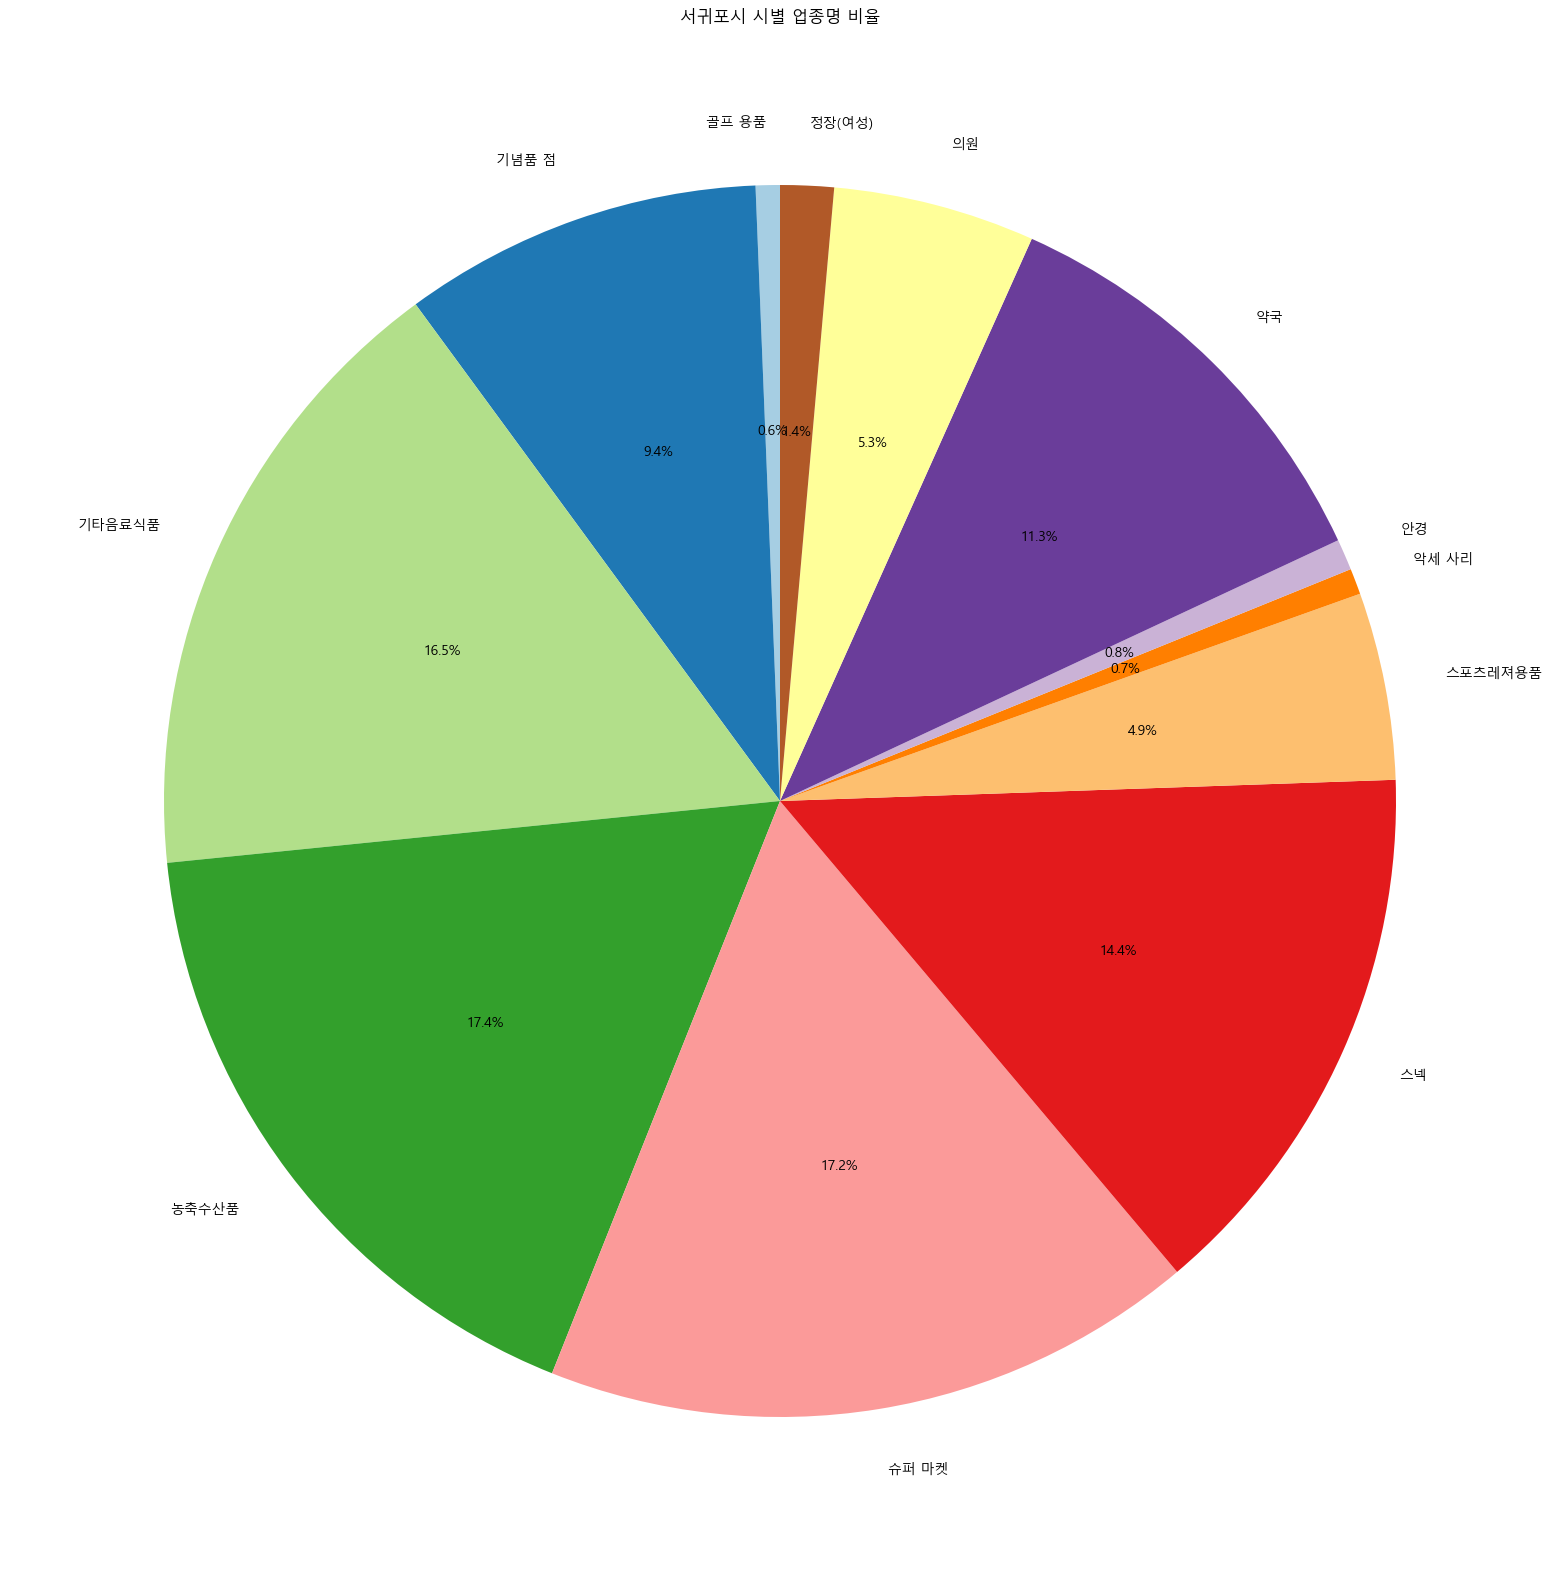

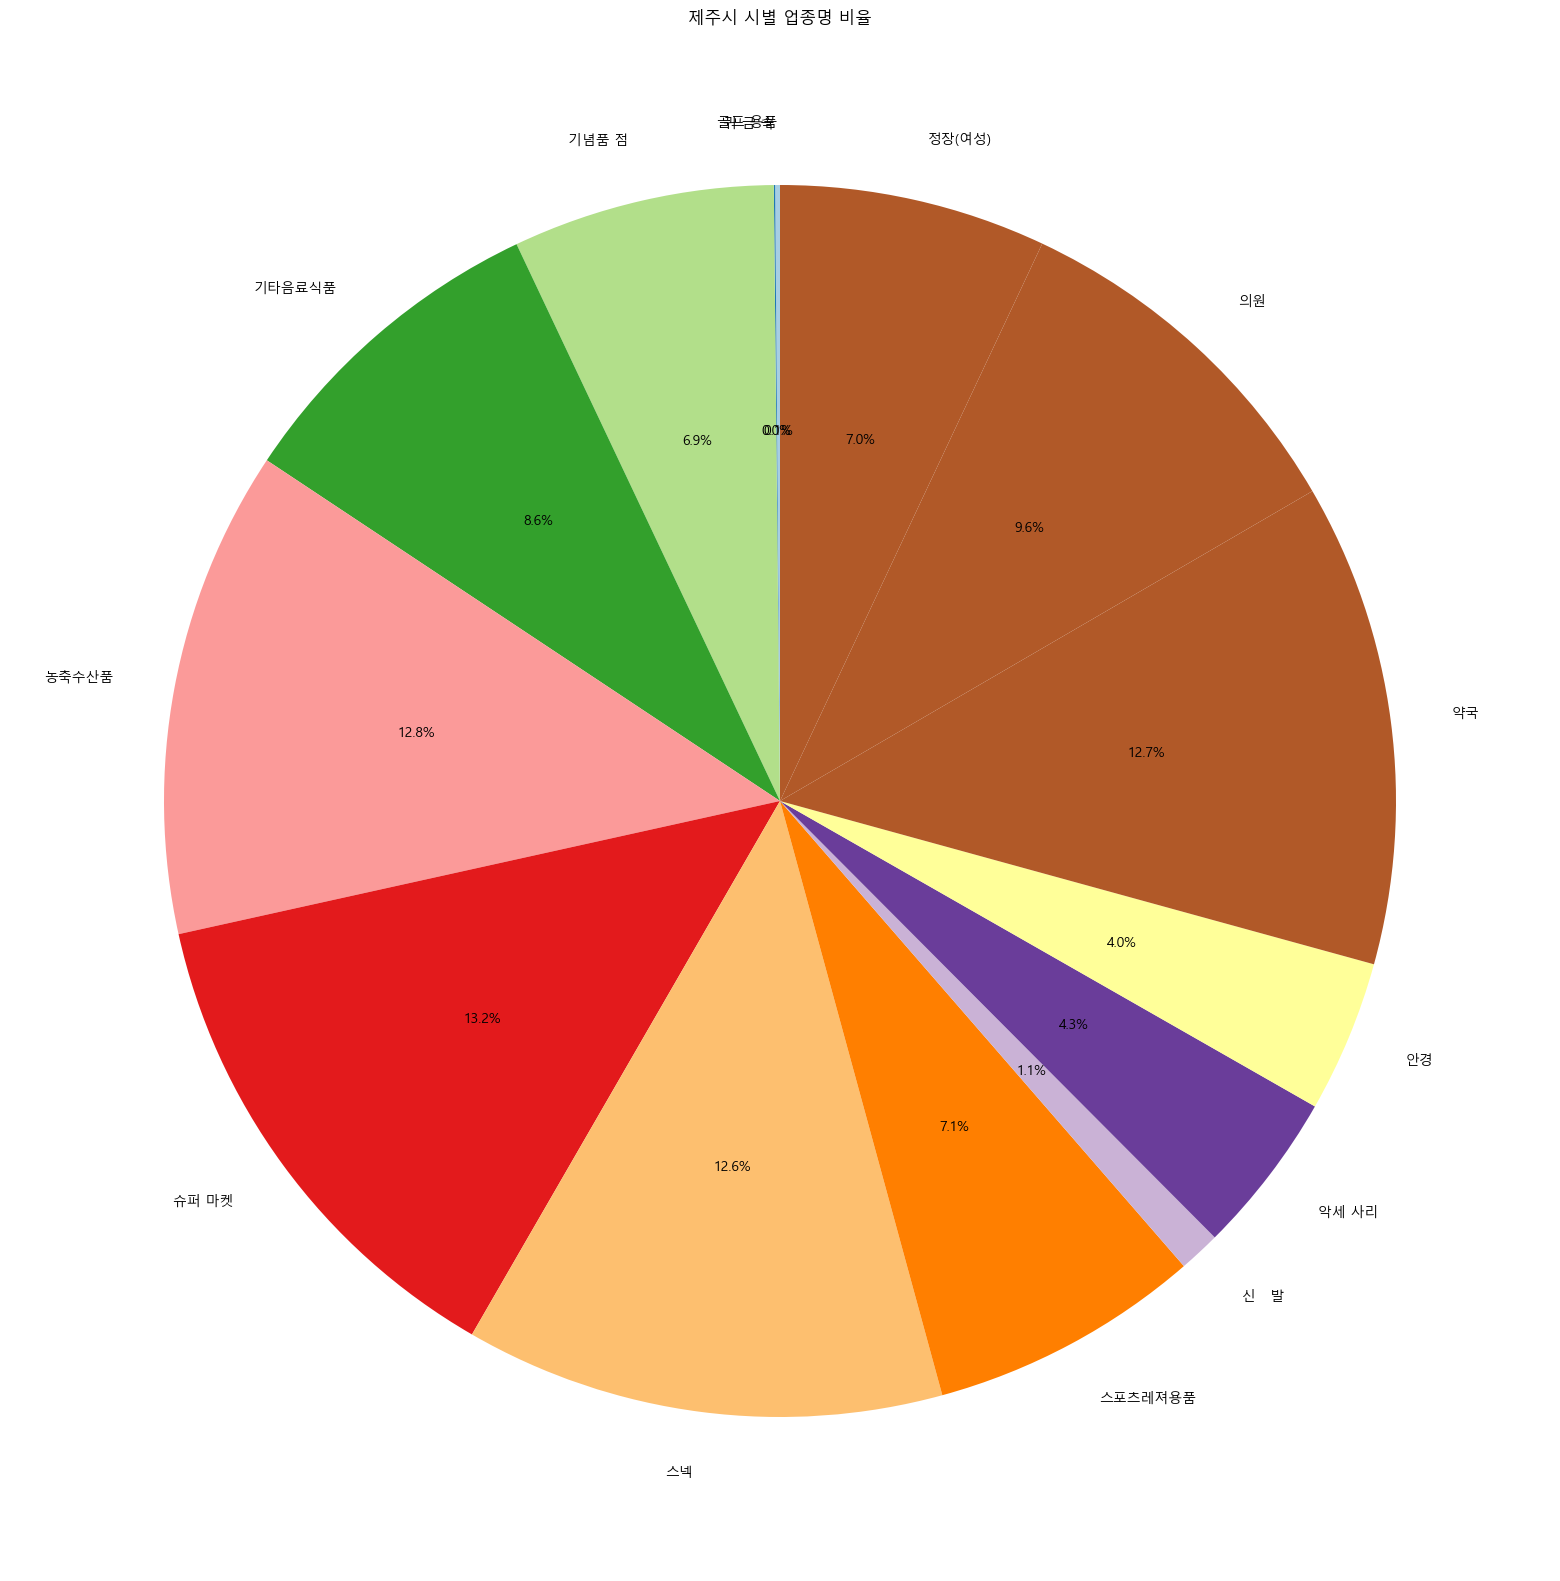

In [24]:
colors = plt.cm.Paired(range(len(df['업종명'].unique())))
for si_group, data in si_type.groupby('제주 대분류'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['업종명'], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'{si_group} 시별 업종명 비율')
    plt.show()

- 서귀포시는 먹는것들의 데이터가 많은 부분을 차지하고 제주시는 서귀포보다는 더 다양한 업종을 관광객들이 이용한다

In [26]:
age_type = df.groupby(['연령대별','업종명'])['업종명'].count().reset_index(name='count')

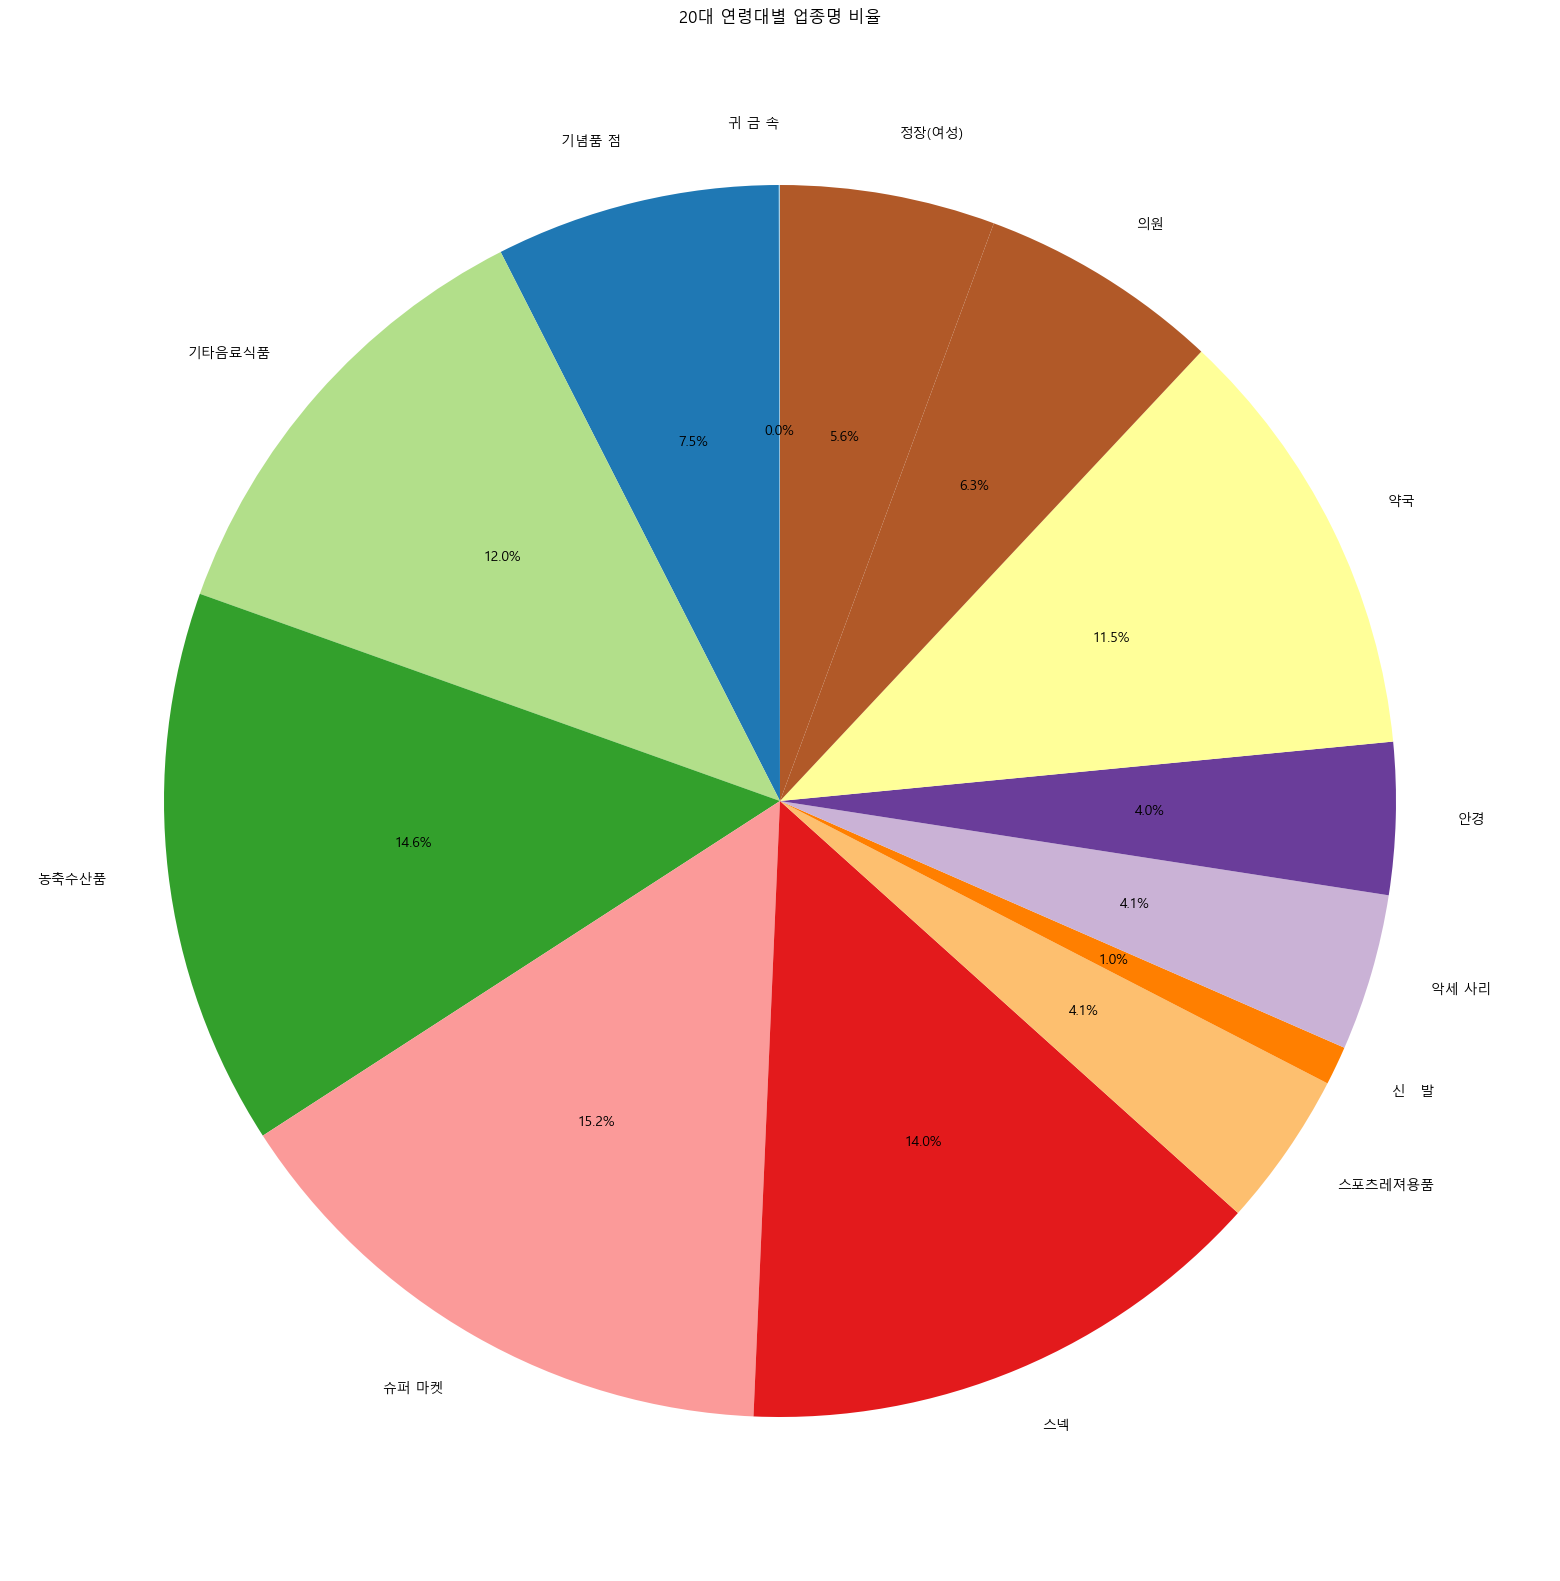

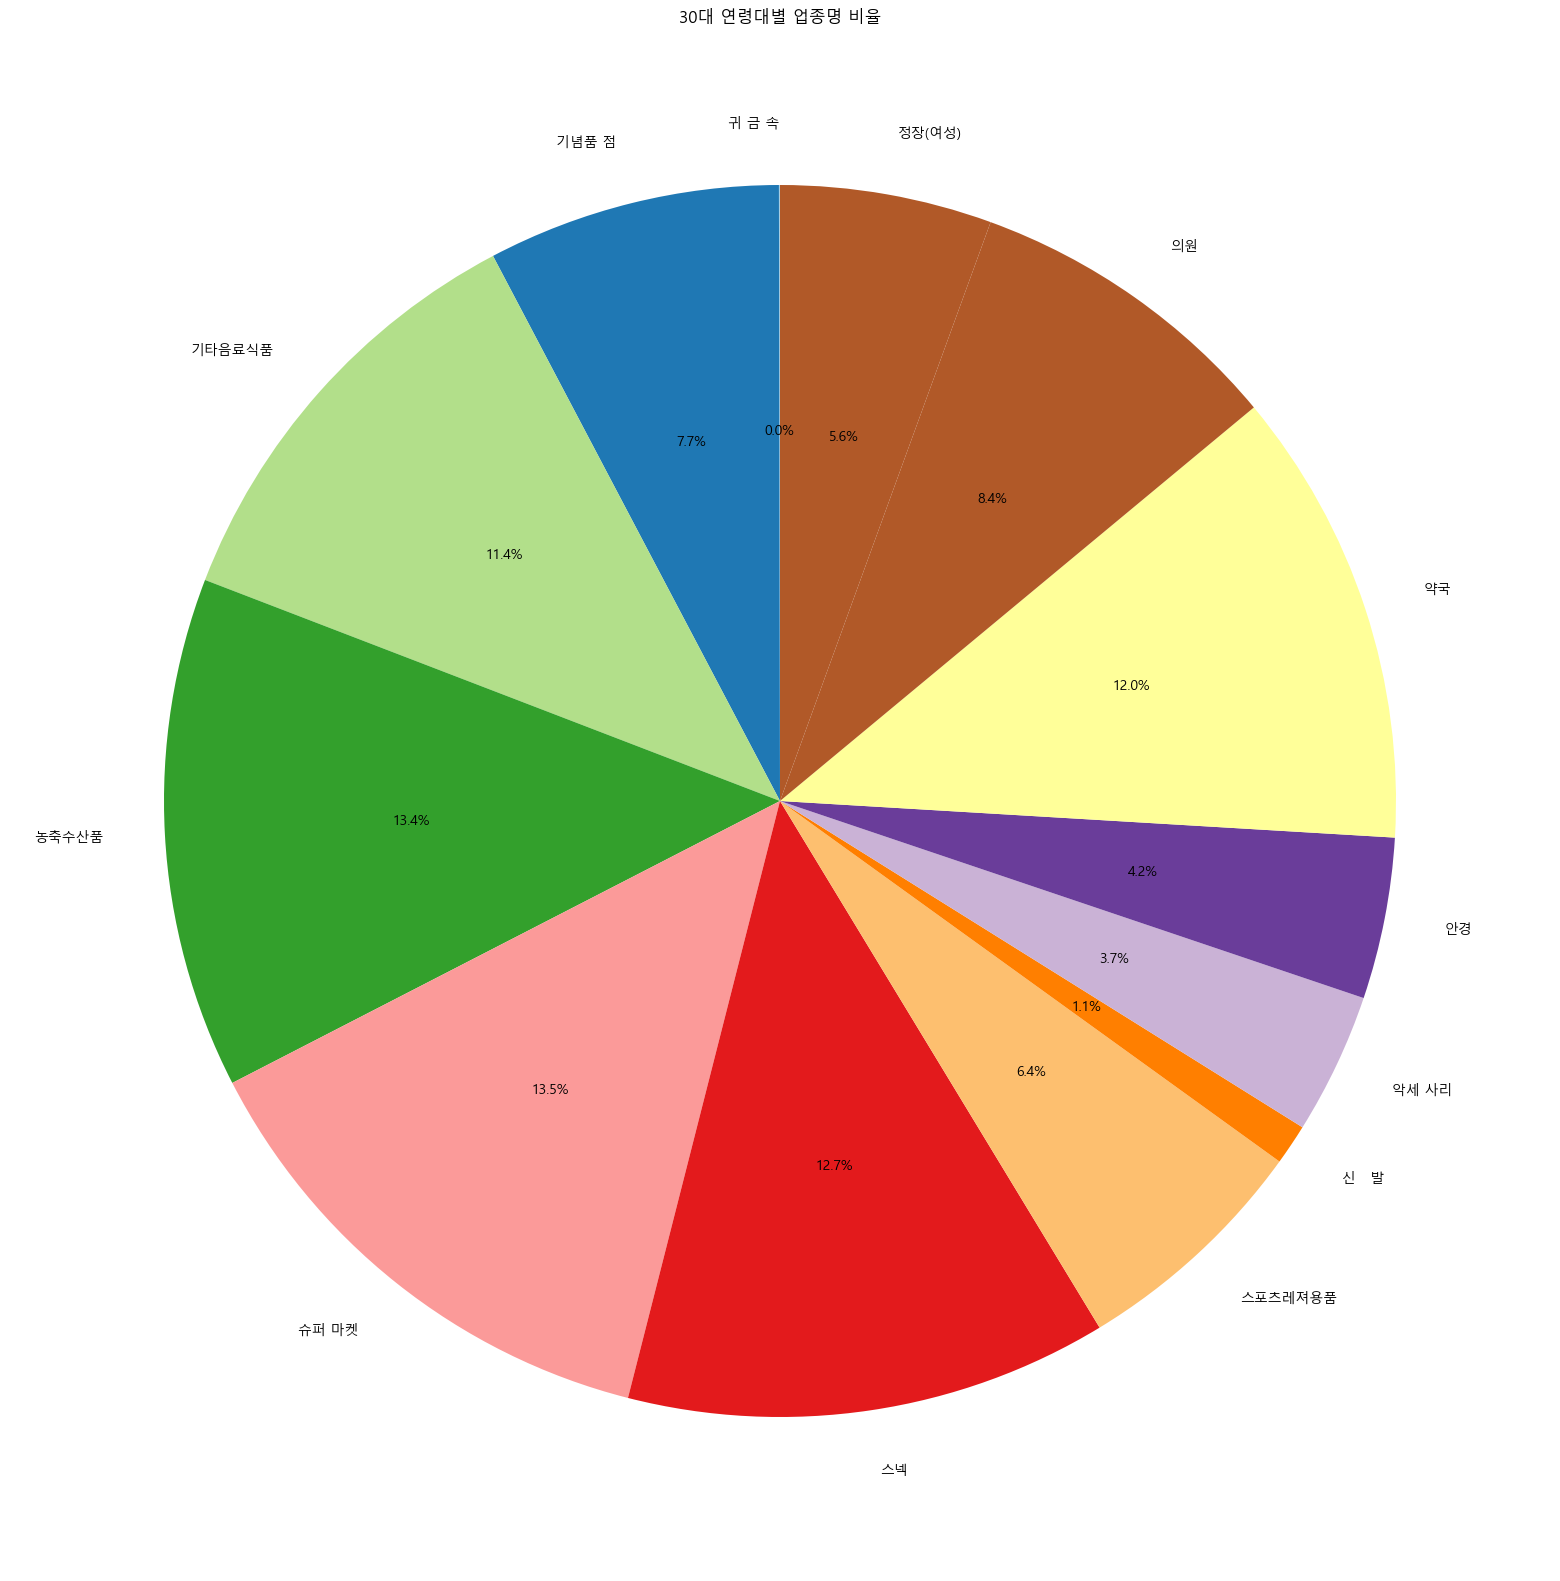

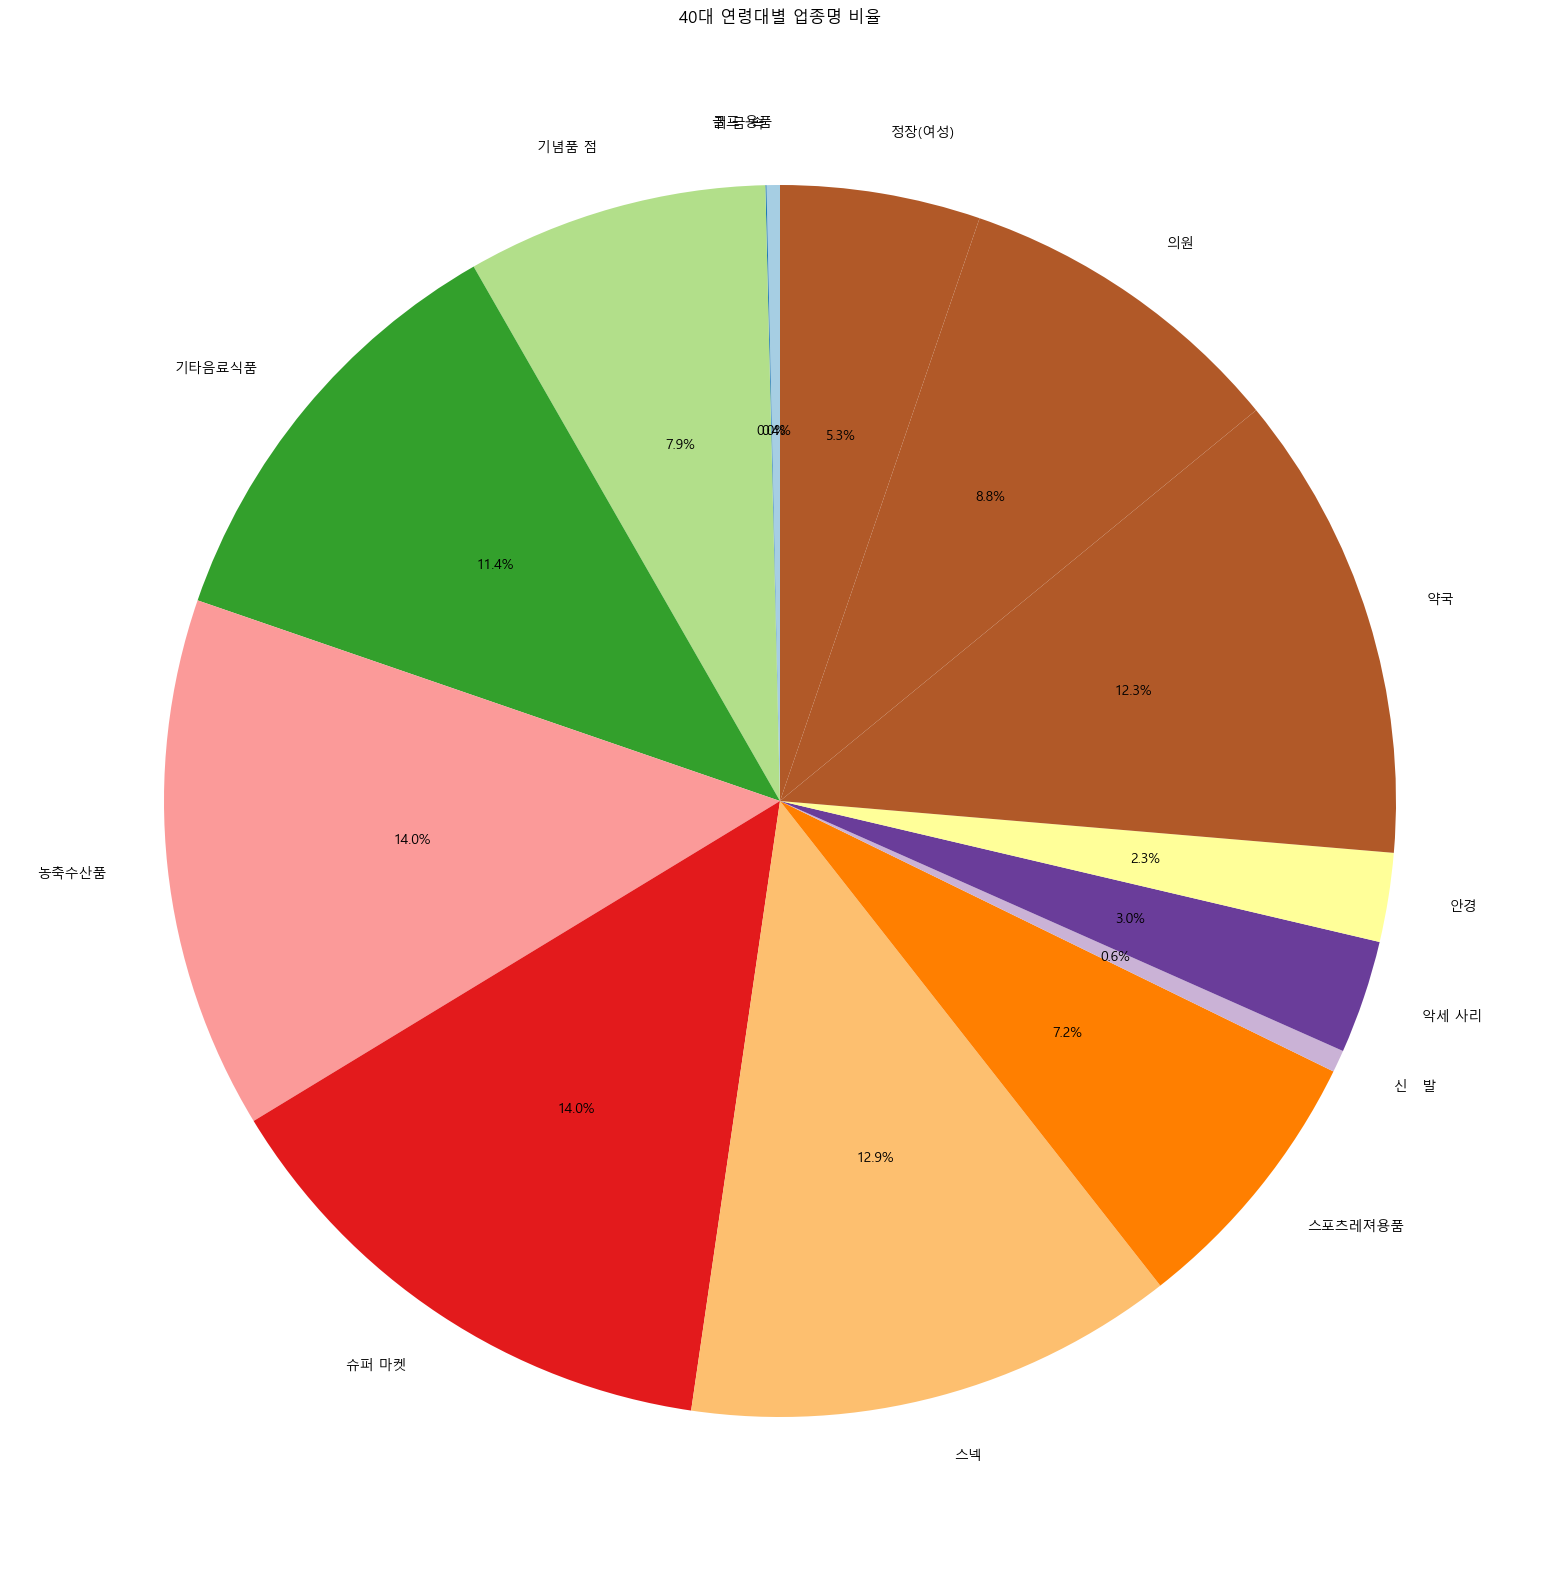

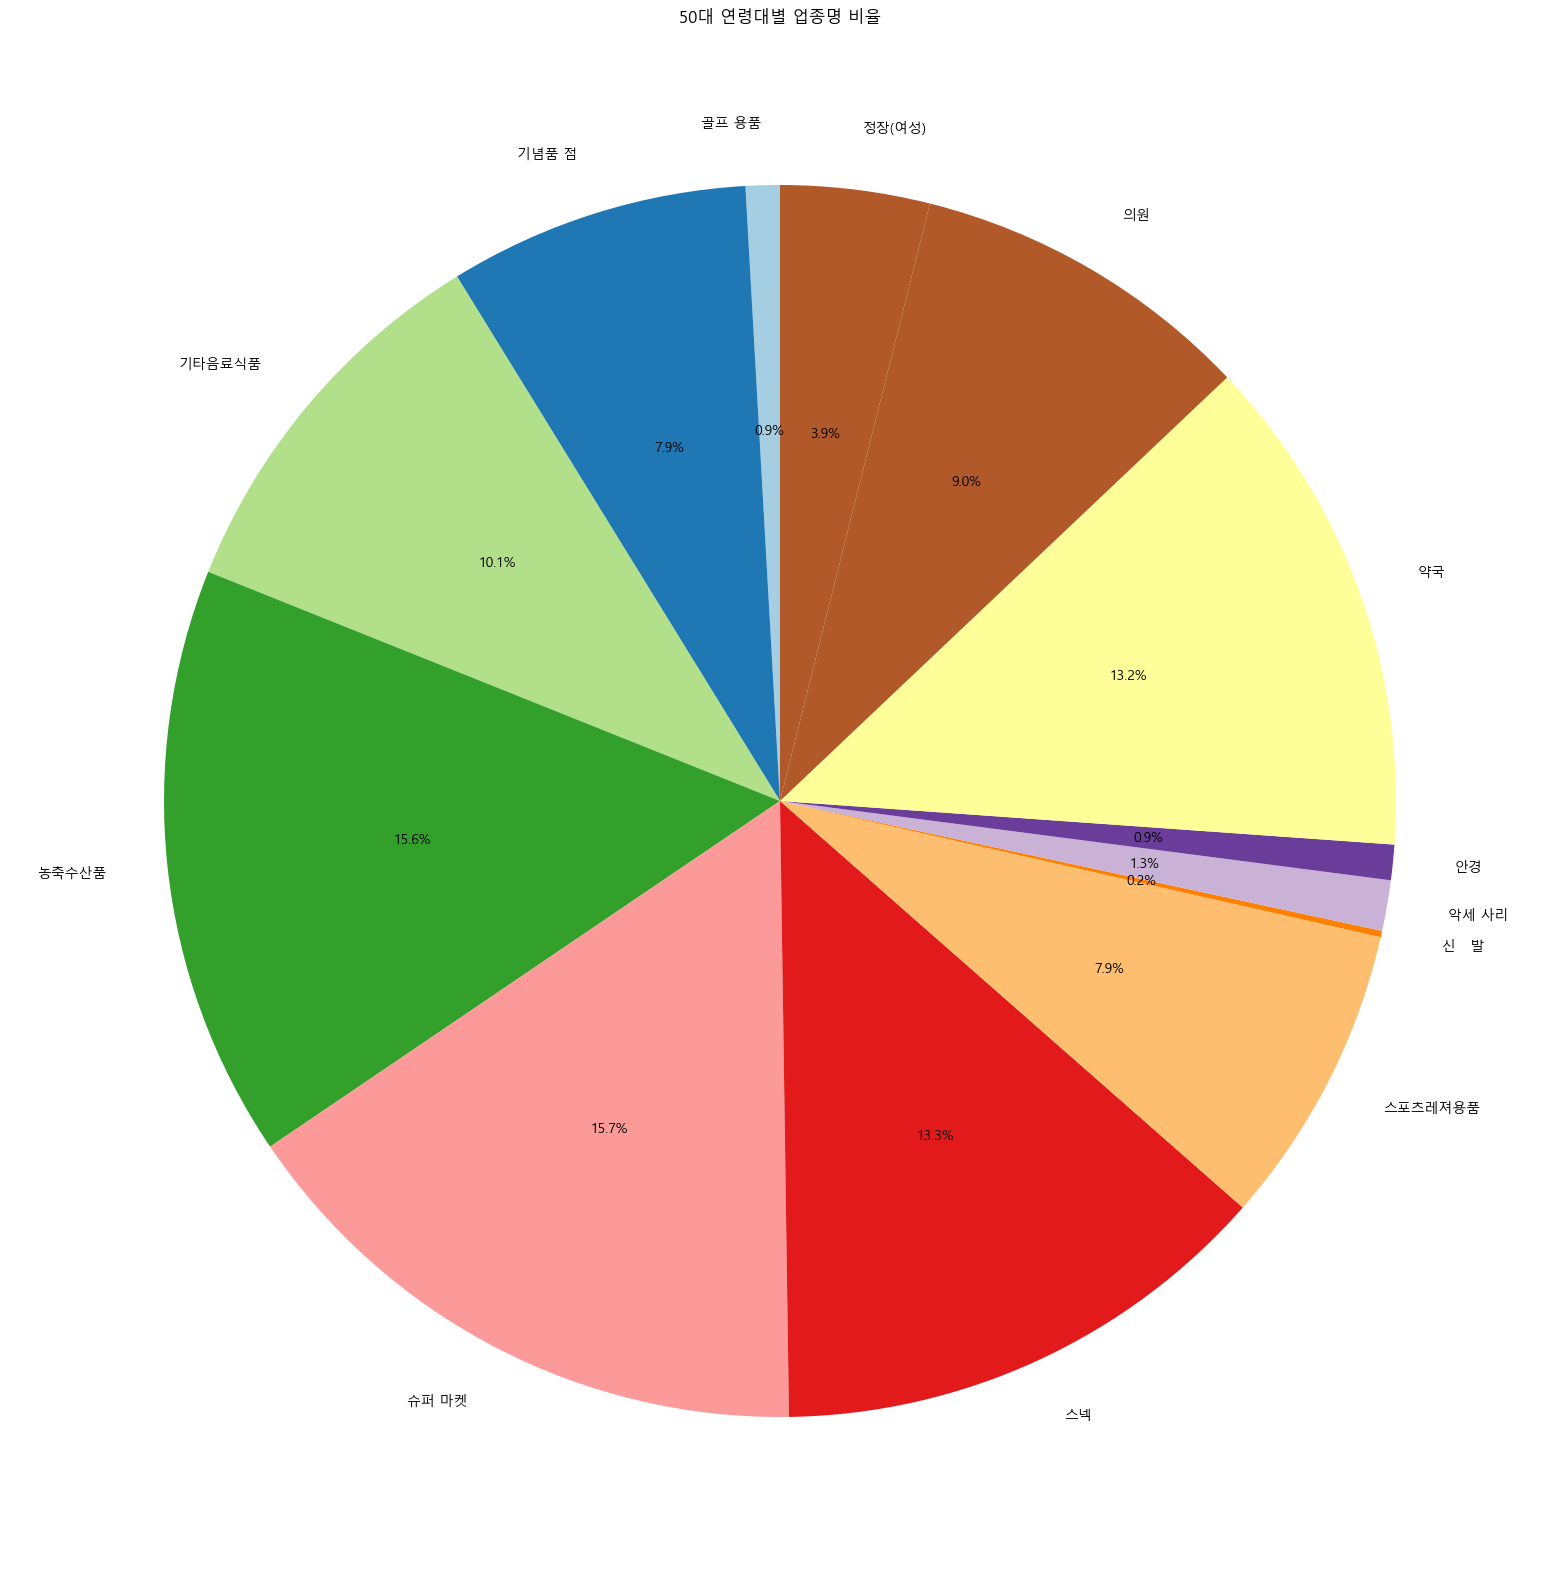

In [27]:
colors = plt.cm.Paired(range(len(df['업종명'].unique())))
for age_group, data in age_type.groupby('연령대별'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['업종명'], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'{age_group} 연령대별 업종명 비율')
    plt.show()

- 대부분의 연령대에서 농축수산품과 슈퍼마켓 이용을 자주한다
- 40대 50대에서 부터 골프용품 구매가 시작된다
- 레저스포츠용품 구매 비율이 연령대가 높아지면서 많아진다

In [28]:
age_df = df['연령대별'].value_counts()

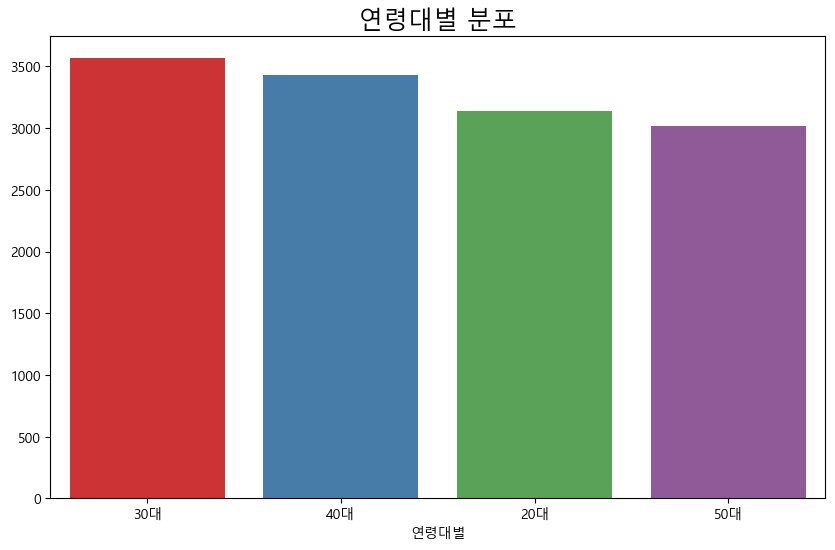

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_df.index, y=age_df.values, palette='Set1')
plt.title('연령대별 분포', fontsize=18)
plt.show()

In [30]:
dong_jeju = df.groupby('제주 중분류')['제주 중분류'].value_counts().reset_index()

In [31]:
dong_jeju

제주 중분류  count
0    남원읍   1117
1    노형동   1623
2    대륜동    850
3   삼도2동   1327
4    성산읍   1425
5    애월읍    958
6     연동   2063
7    예래동   1025
8   용담2동   1231
9   이도2동   1527

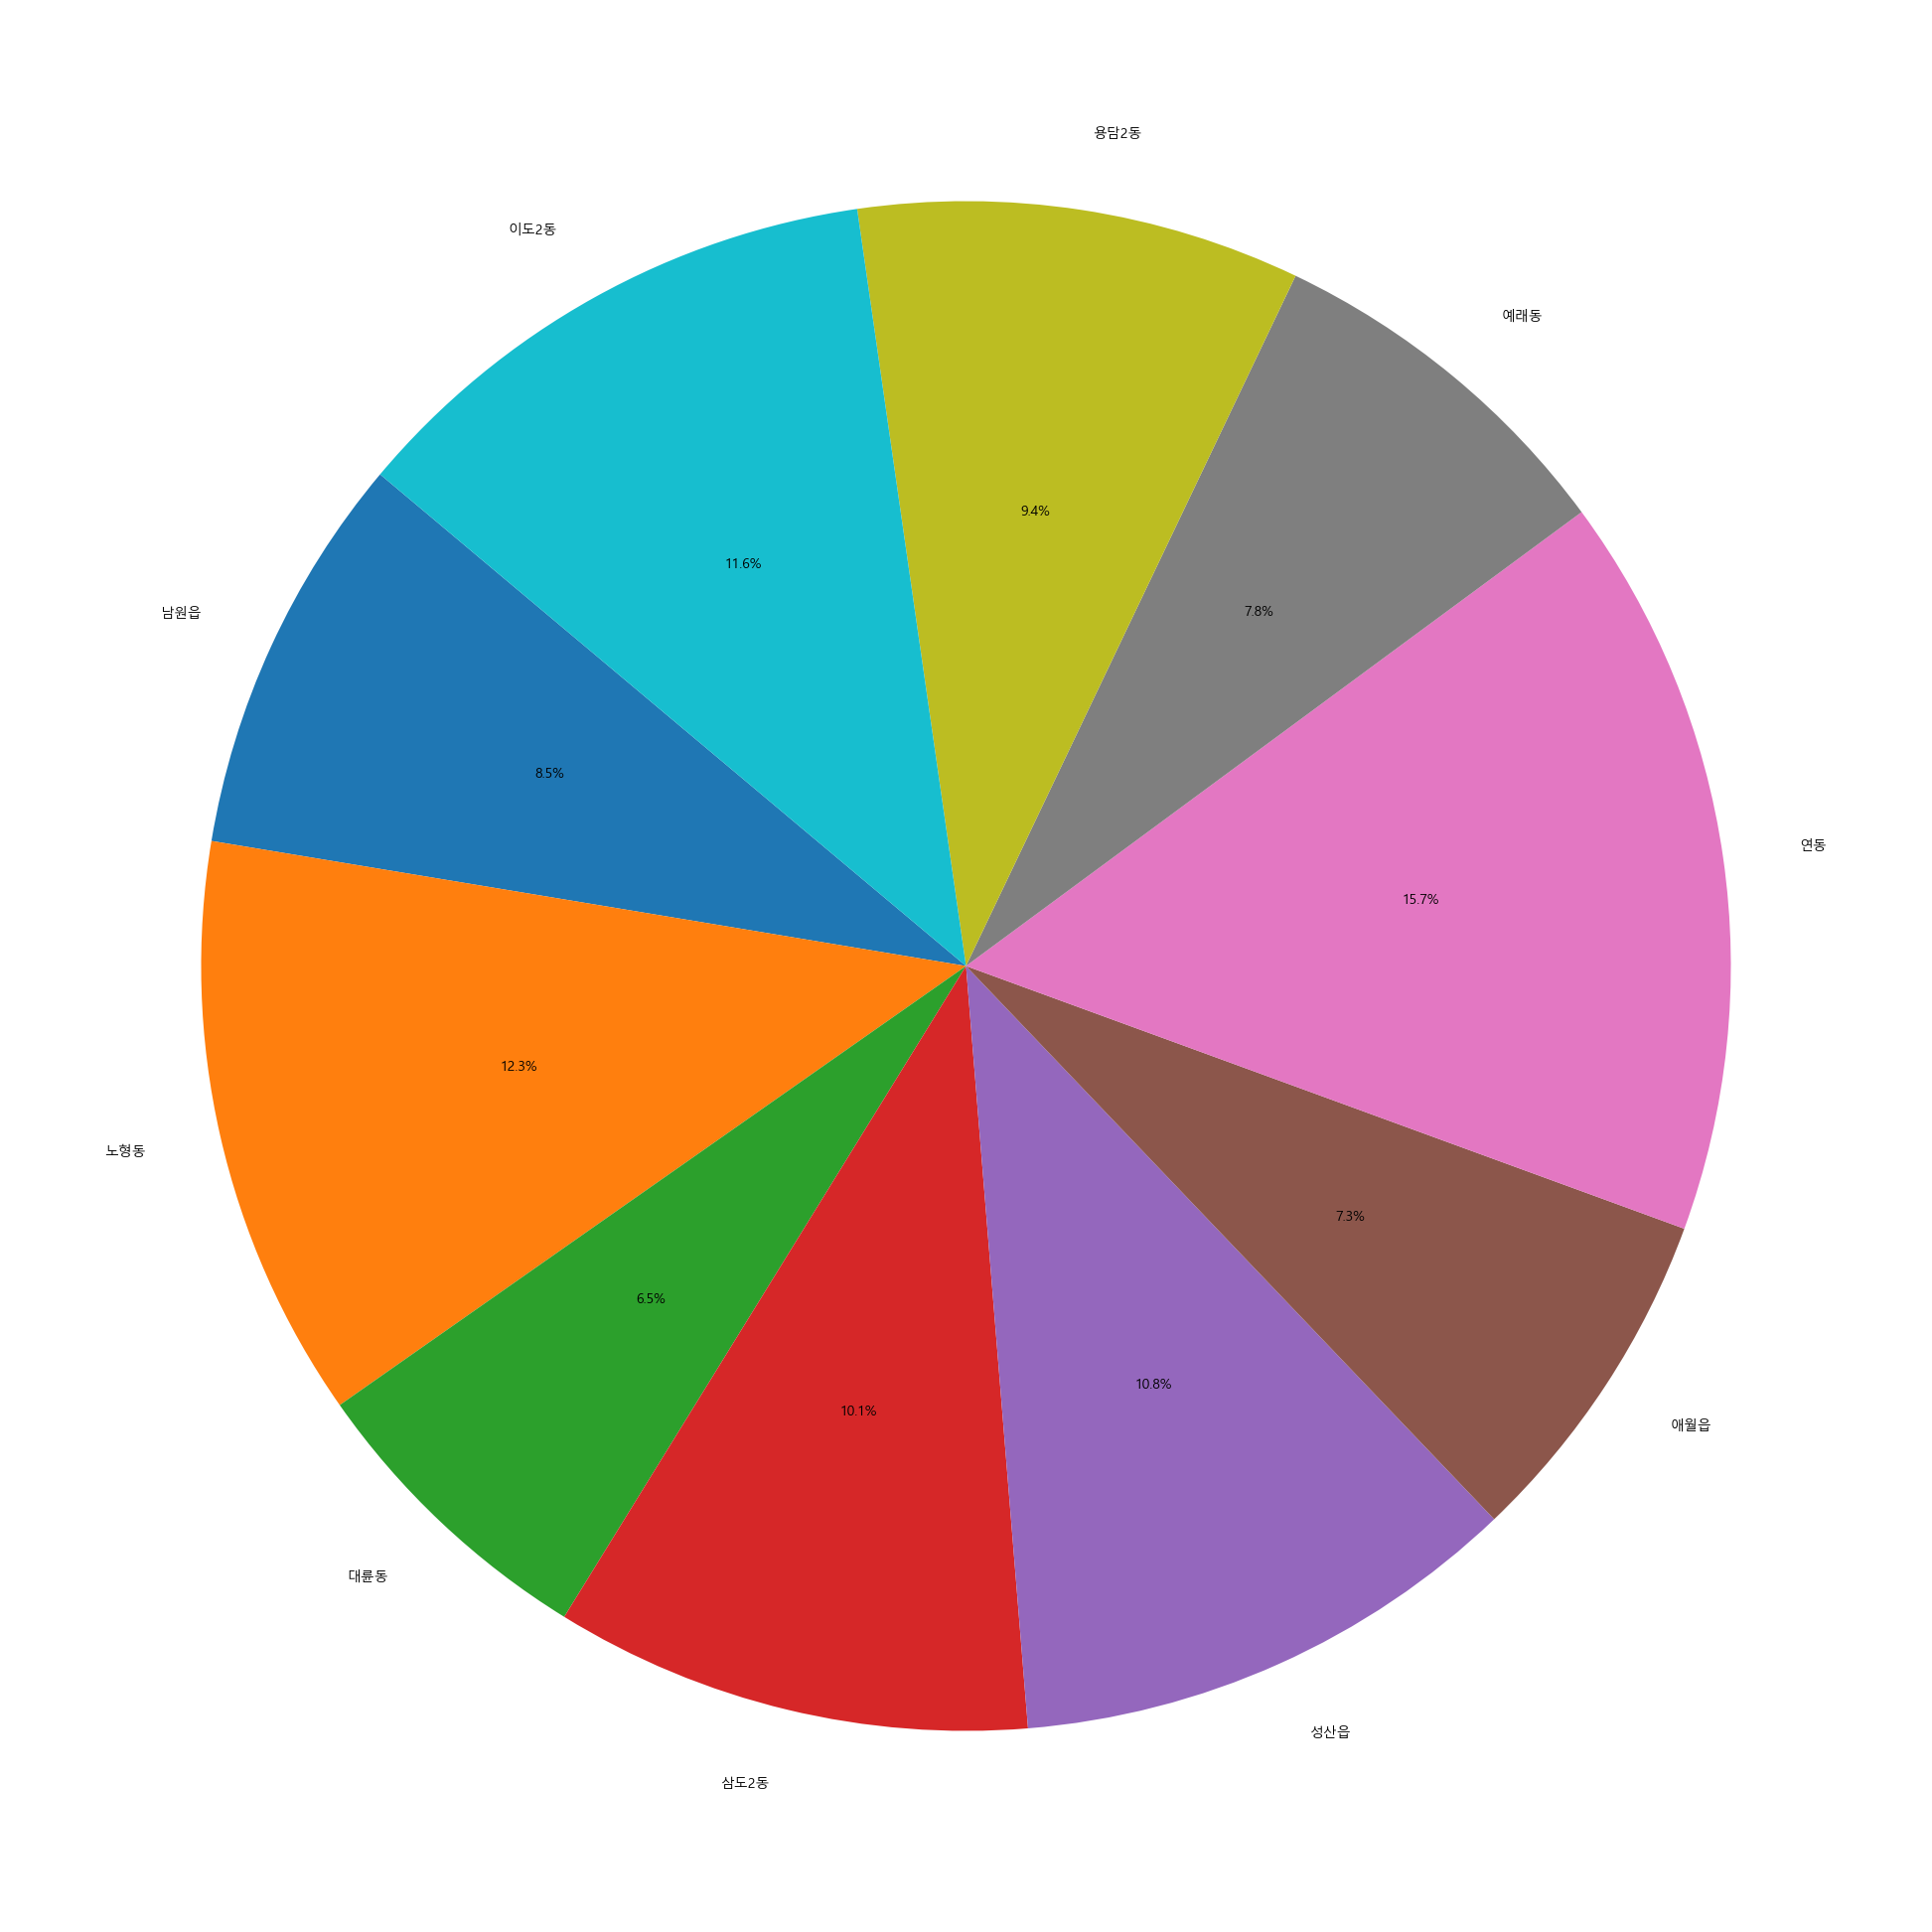

In [32]:
plt.figure(figsize=(25, 25))
plt.pie(dong_jeju['count'], labels=dong_jeju['제주 중분류'], autopct='%1.1f%%', startangle=140)
plt.show()

- 연동,노형동,이도2동순으로 관광객이 많다

In [33]:
spend_jeju=df.groupby(['제주 중분류'])[' 카드이용금액 '].sum().reset_index()

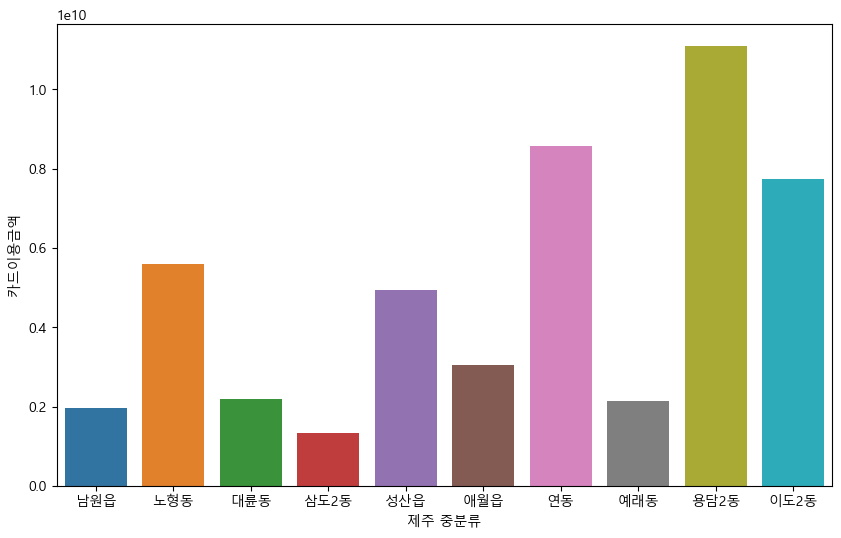

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='제주 중분류', y=' 카드이용금액 ',data=spend_jeju)
plt.show()

- 이용객은 연동이 높지만 용담2동이 총사용금액이 연동보다 높다

In [35]:
spend_count_jeju=df.groupby(['제주 중분류'])[' 카드이용건수 '].sum().reset_index()

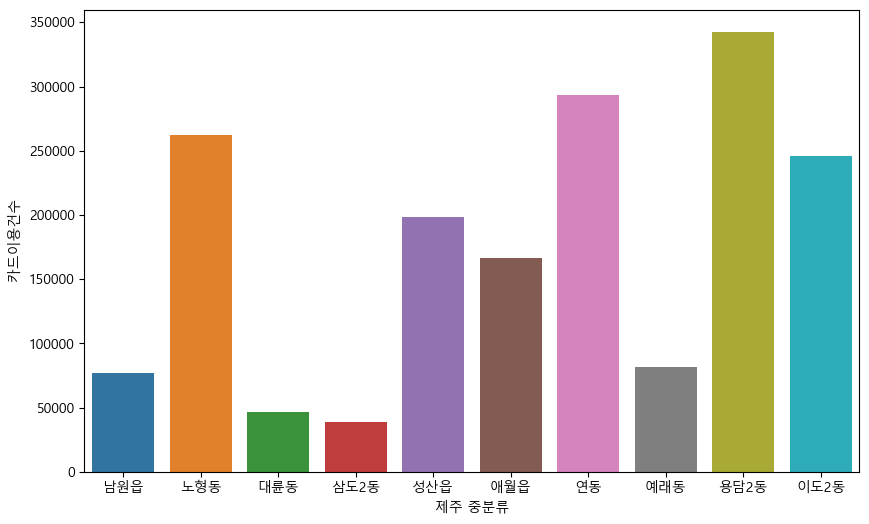

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='제주 중분류', y=' 카드이용건수 ',data=spend_count_jeju)
plt.show()

- 이용객은 연동이 높지만 용담2동이 총카드사용건수도 용담2동이 제일높다

In [37]:
mean_use = df.groupby('업종명')['건당이용금액'].mean().reset_index()
mean_use = mean_use.sort_values(('건당이용금액'), ascending=False)

<Axes: xlabel='업종명', ylabel='건당이용금액'>

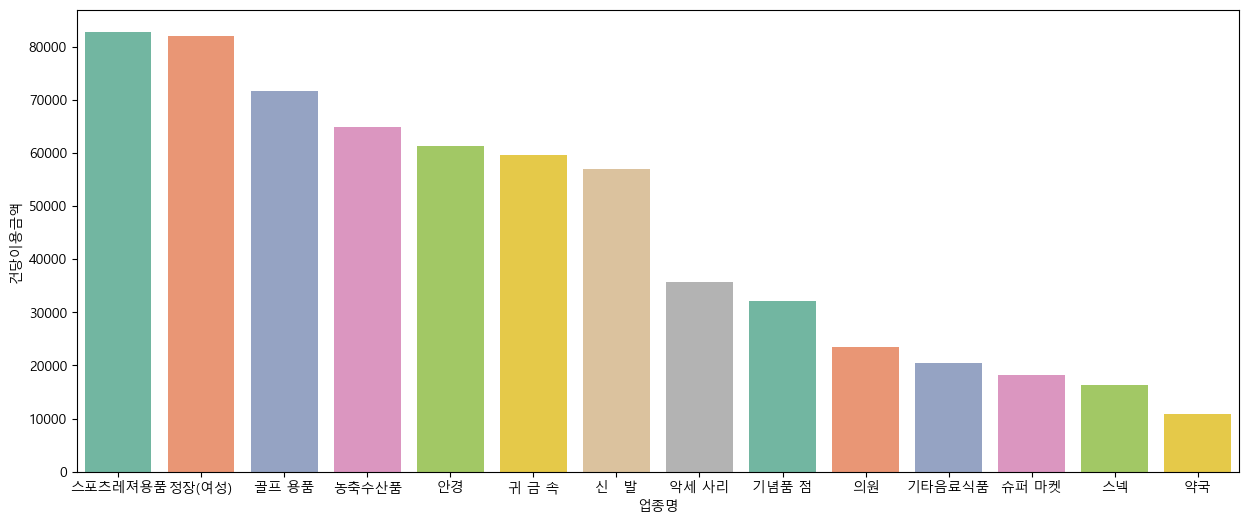

In [38]:
plt.figure(figsize=(15, 6))
sns.barplot(data=mean_use, x='업종명', y='건당이용금액', palette="Set2")

- 스포츠레저 용품이 가장 높은 평균가격이 형성 되어있다

In [39]:
mean_use_dong = df.groupby('제주 중분류')[' 카드이용금액 '].mean().reset_index()
mean_use_dong = mean_use_dong.sort_values((' 카드이용금액 '), ascending=False)

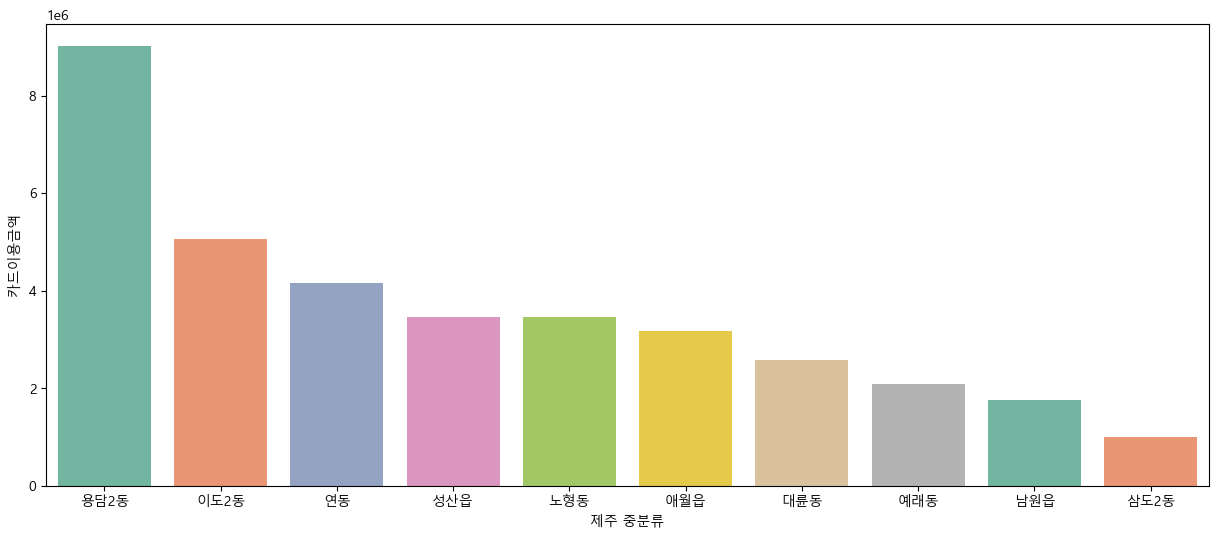

In [40]:
plt.figure(figsize=(15, 6))
sns.barplot(data=mean_use_dong, x='제주 중분류', y=' 카드이용금액 ', palette="Set2")
plt.show()

- 평균 이용금액도 제일 용담2동이 많다

In [41]:
mean_use_case_dong = df.groupby('제주 중분류')[' 카드이용건수 '].mean().reset_index()
mean_use_case_dong = mean_use_case_dong.sort_values((' 카드이용건수 '), ascending=False)

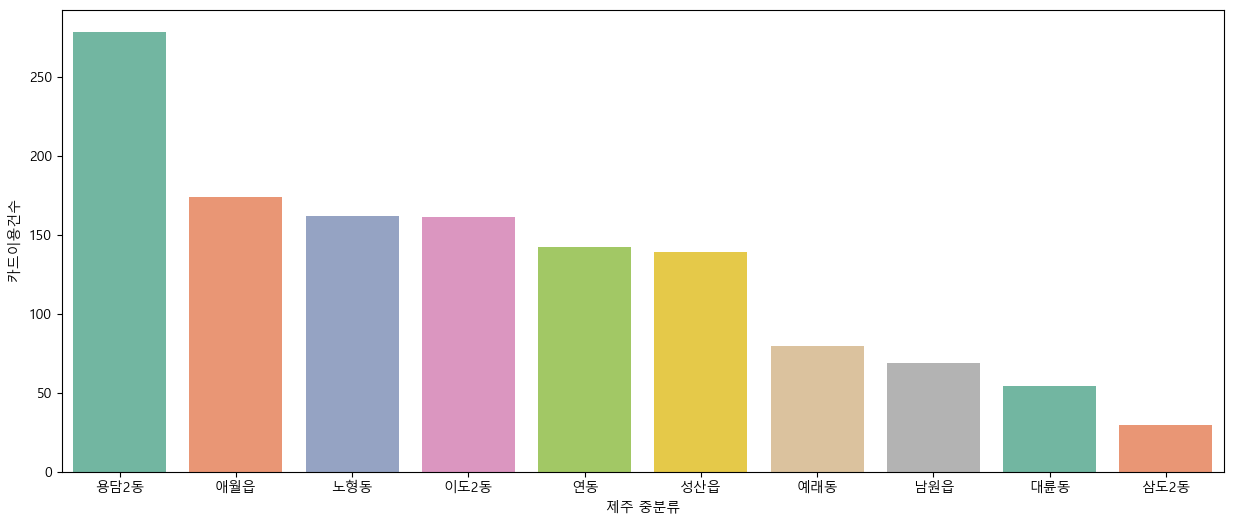

In [42]:
plt.figure(figsize=(15, 6))
sns.barplot(data=mean_use_case_dong, x='제주 중분류', y=' 카드이용건수 ', palette="Set2")
plt.show()

- 평균이용건수 용담2동이 많다

In [43]:
age_jeju=df.groupby(['연령대별'])['제주 중분류'].value_counts().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

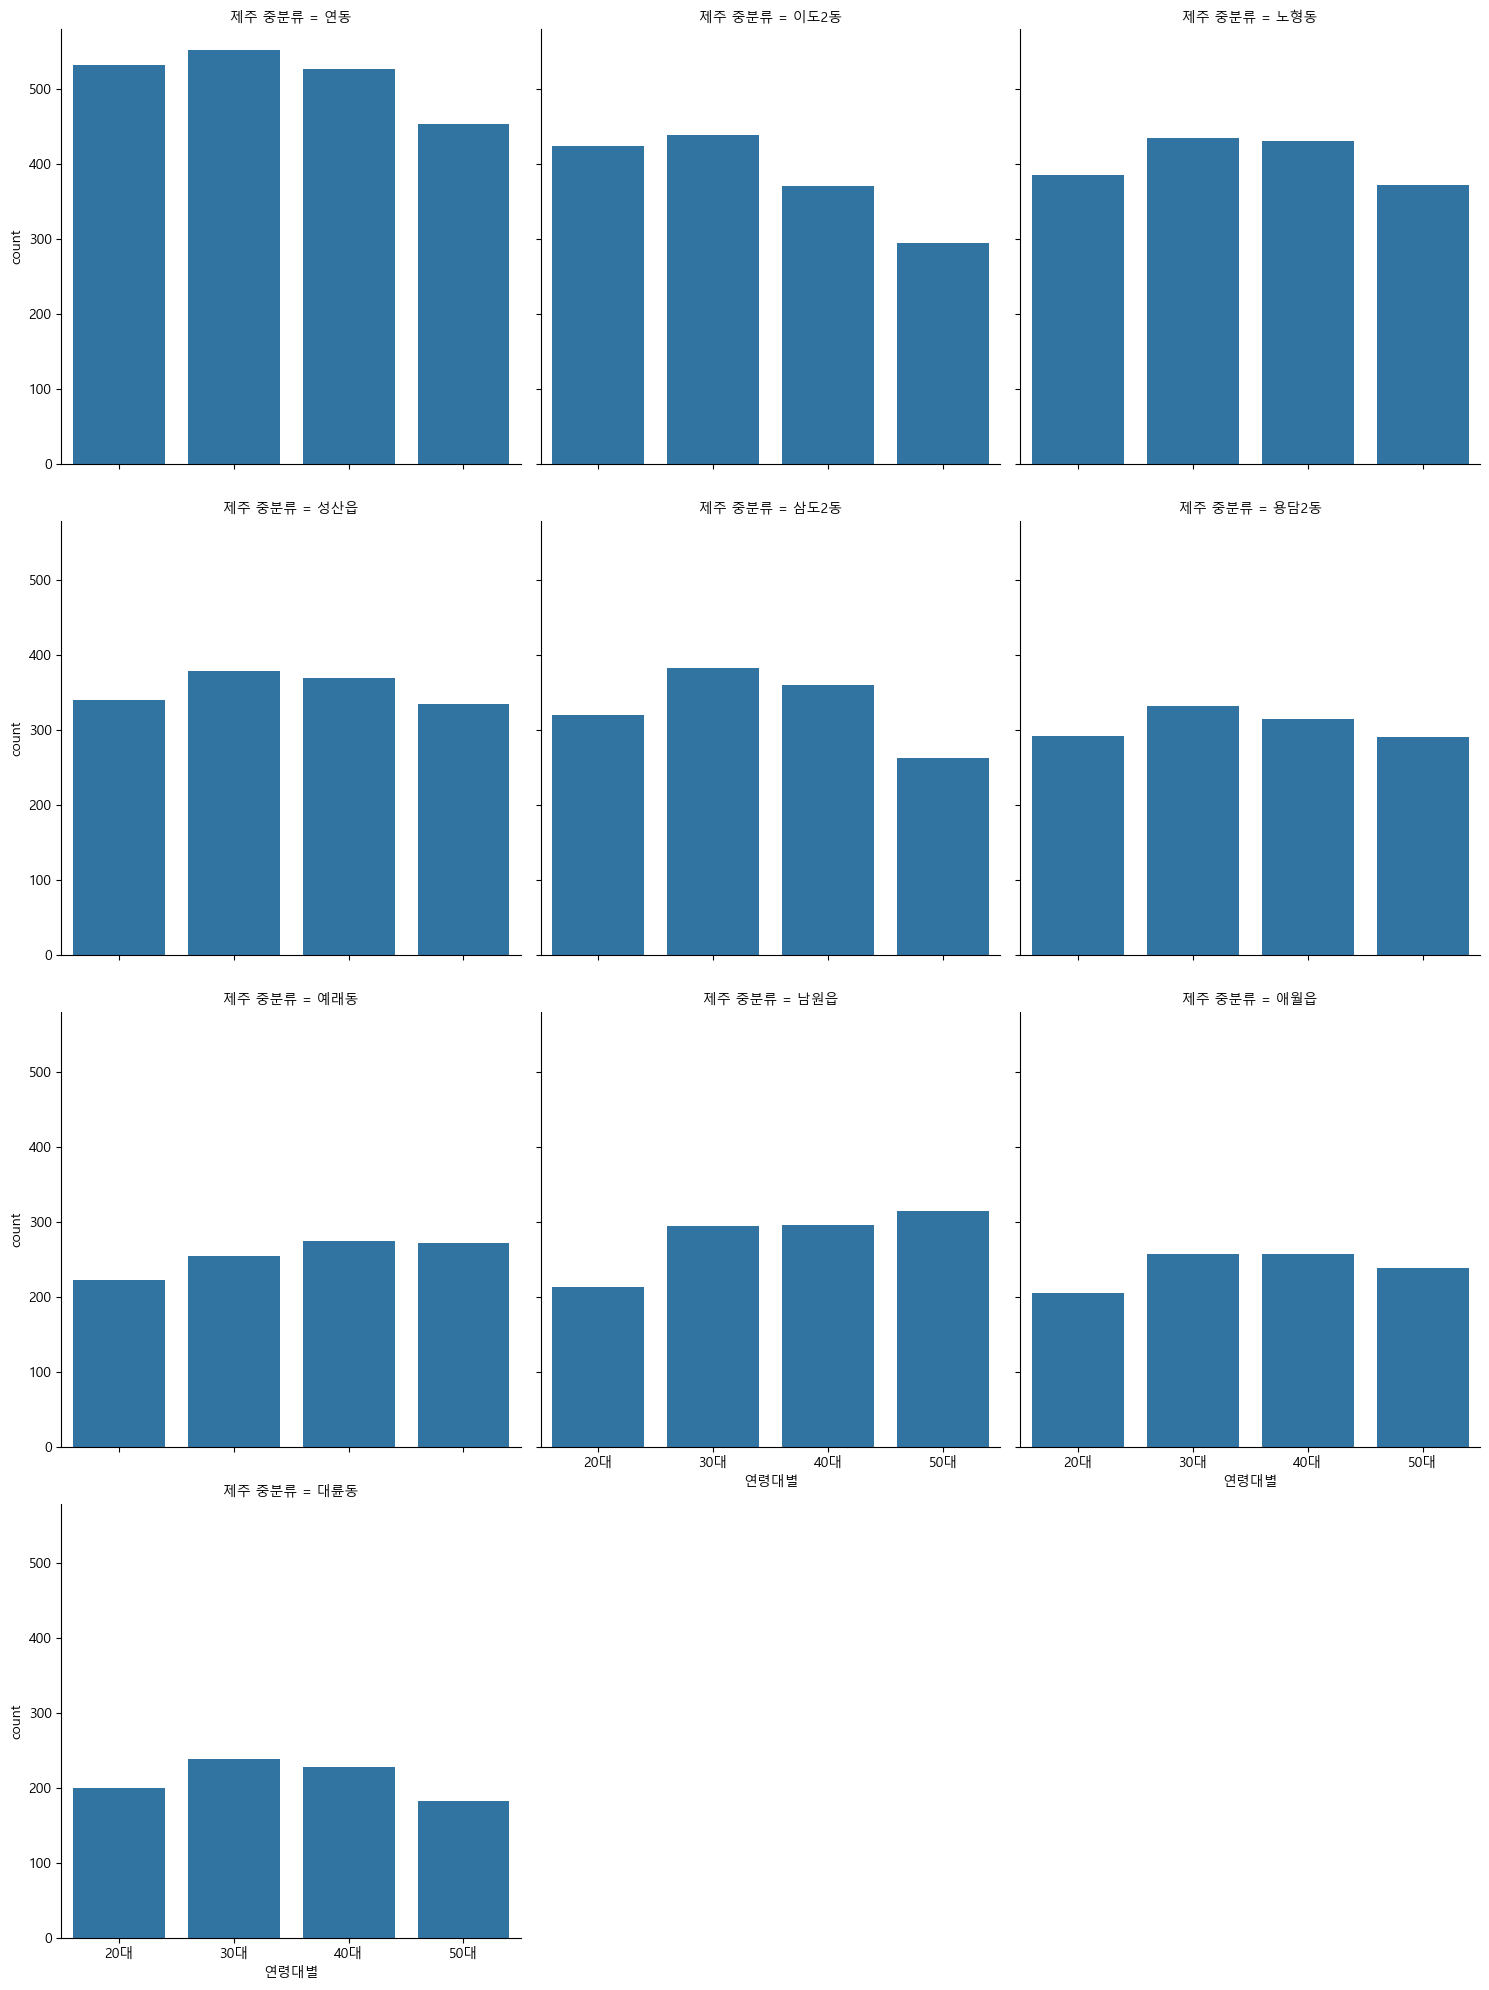

In [44]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(age_jeju, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '연령대별', 'count', errorbar=None)
plt.show()

- 연동과 이도2동 젊은 20 30대가 많이 방문하고 예래동은 40 50대의 방문 노형동에는 30 40대가 방문자가 많다

In [45]:
gender_jeju=df.groupby(['성별'])['제주 중분류'].value_counts().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

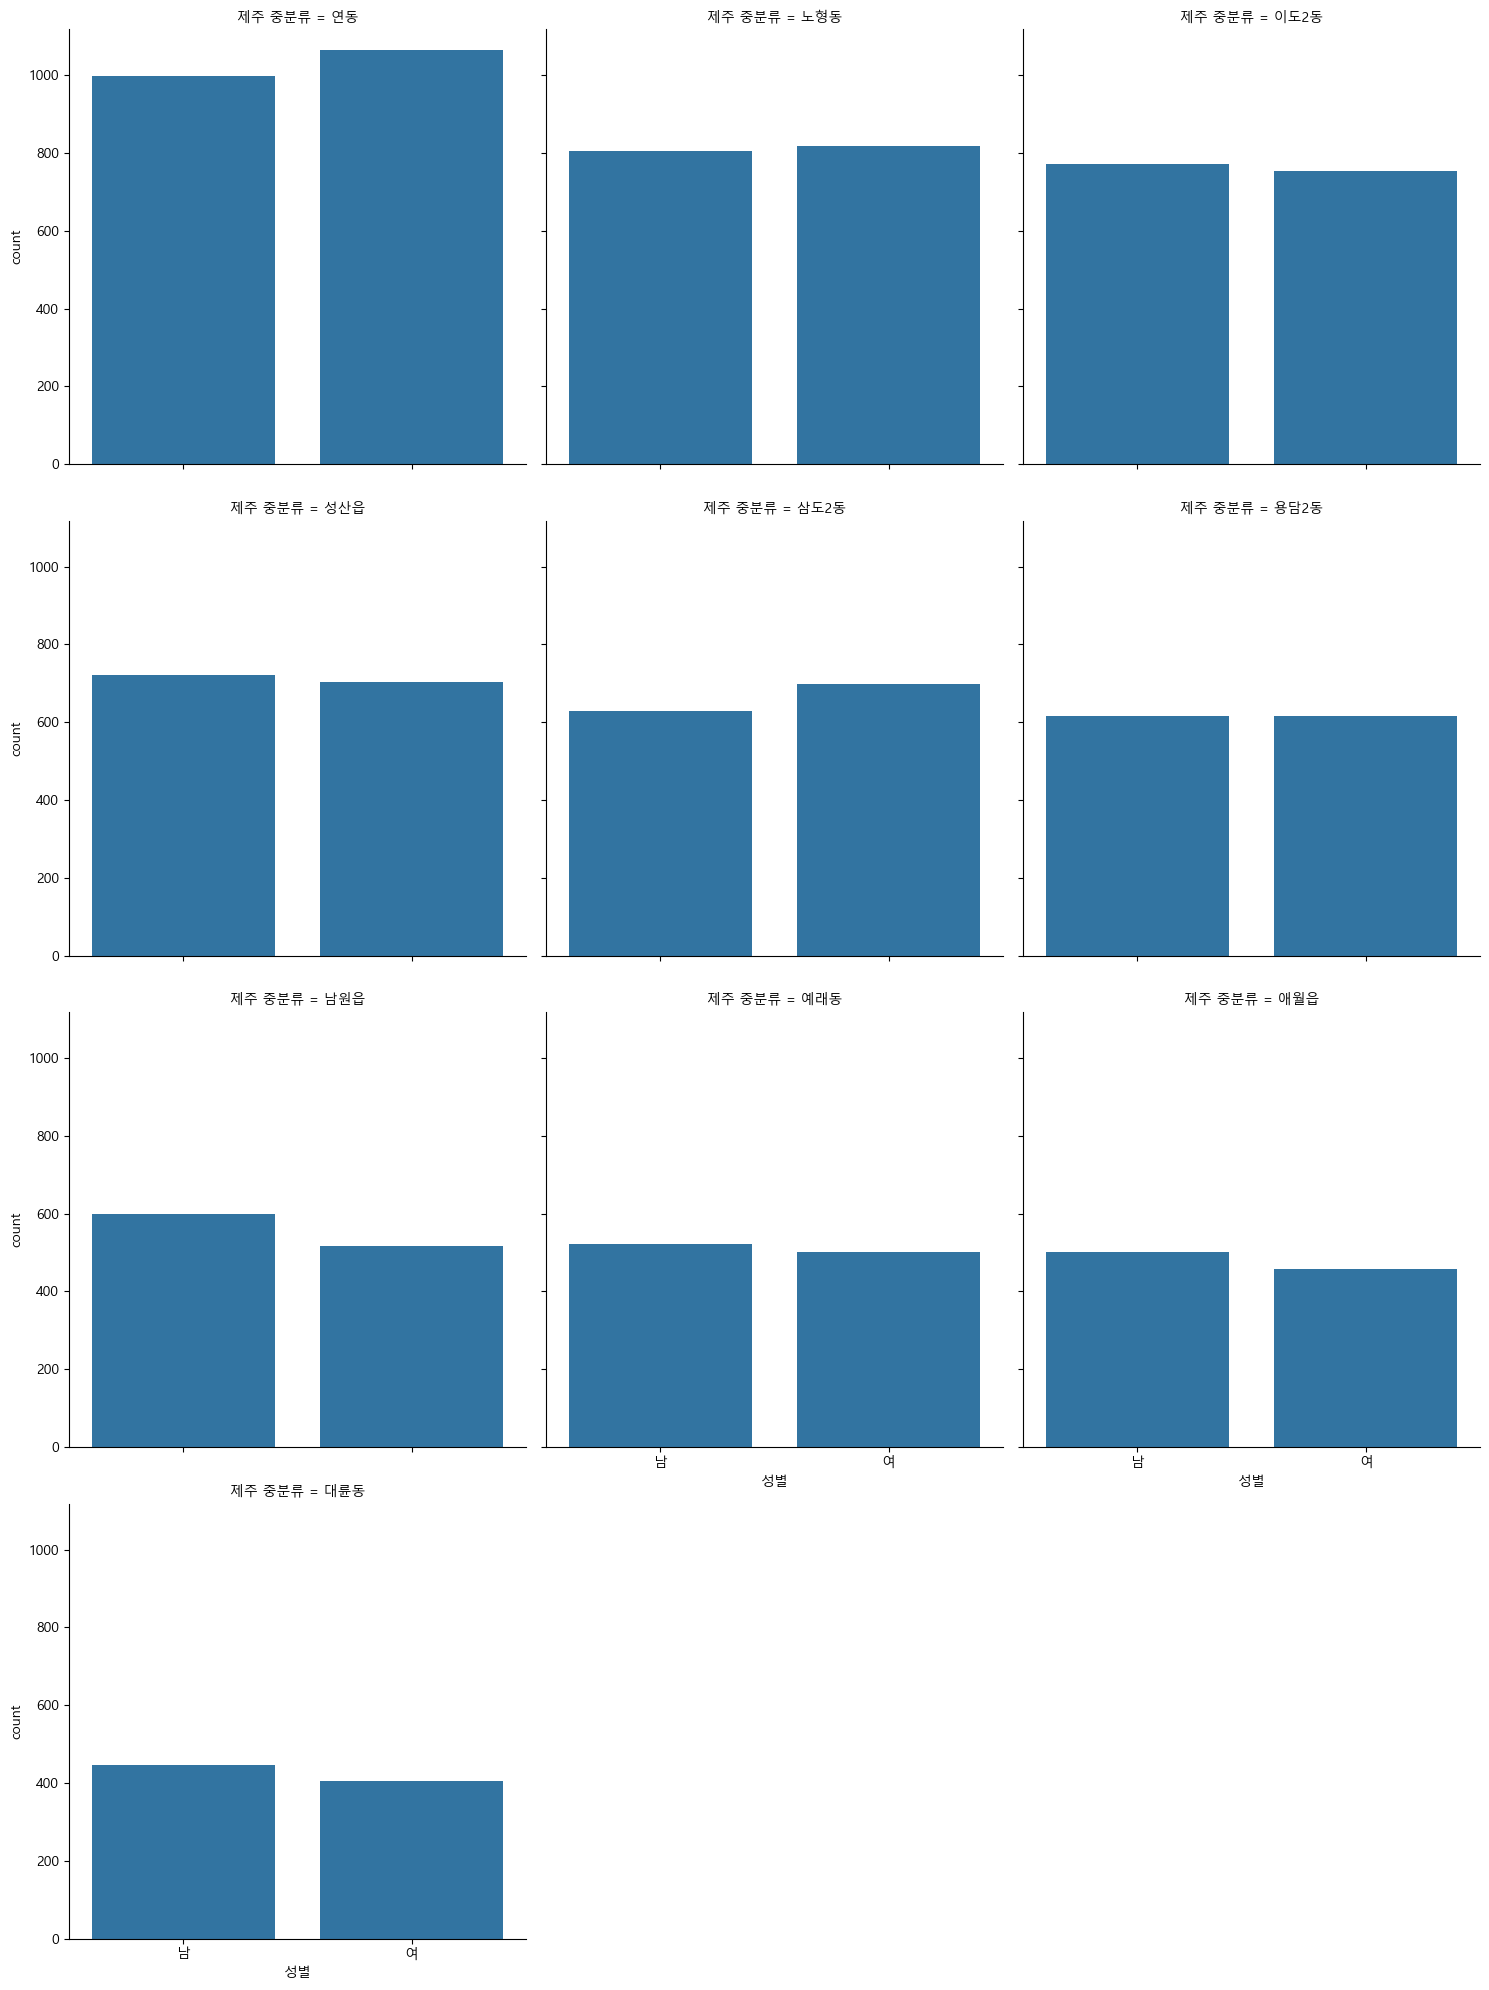

In [46]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(gender_jeju, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '성별', 'count', errorbar=None)
plt.show()

- 비율에는 큰 차이가 없지만 연동과 삼도2동에는 여자가 많고 남원읍과 대륜동은 남성의 방문이 조금 더 많다
- 연동에 관광객이 많다
- 대륜동에는 관광객이 적다

In [47]:
month_card_use=df.groupby(['월','제주 중분류'])[' 카드이용건수 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

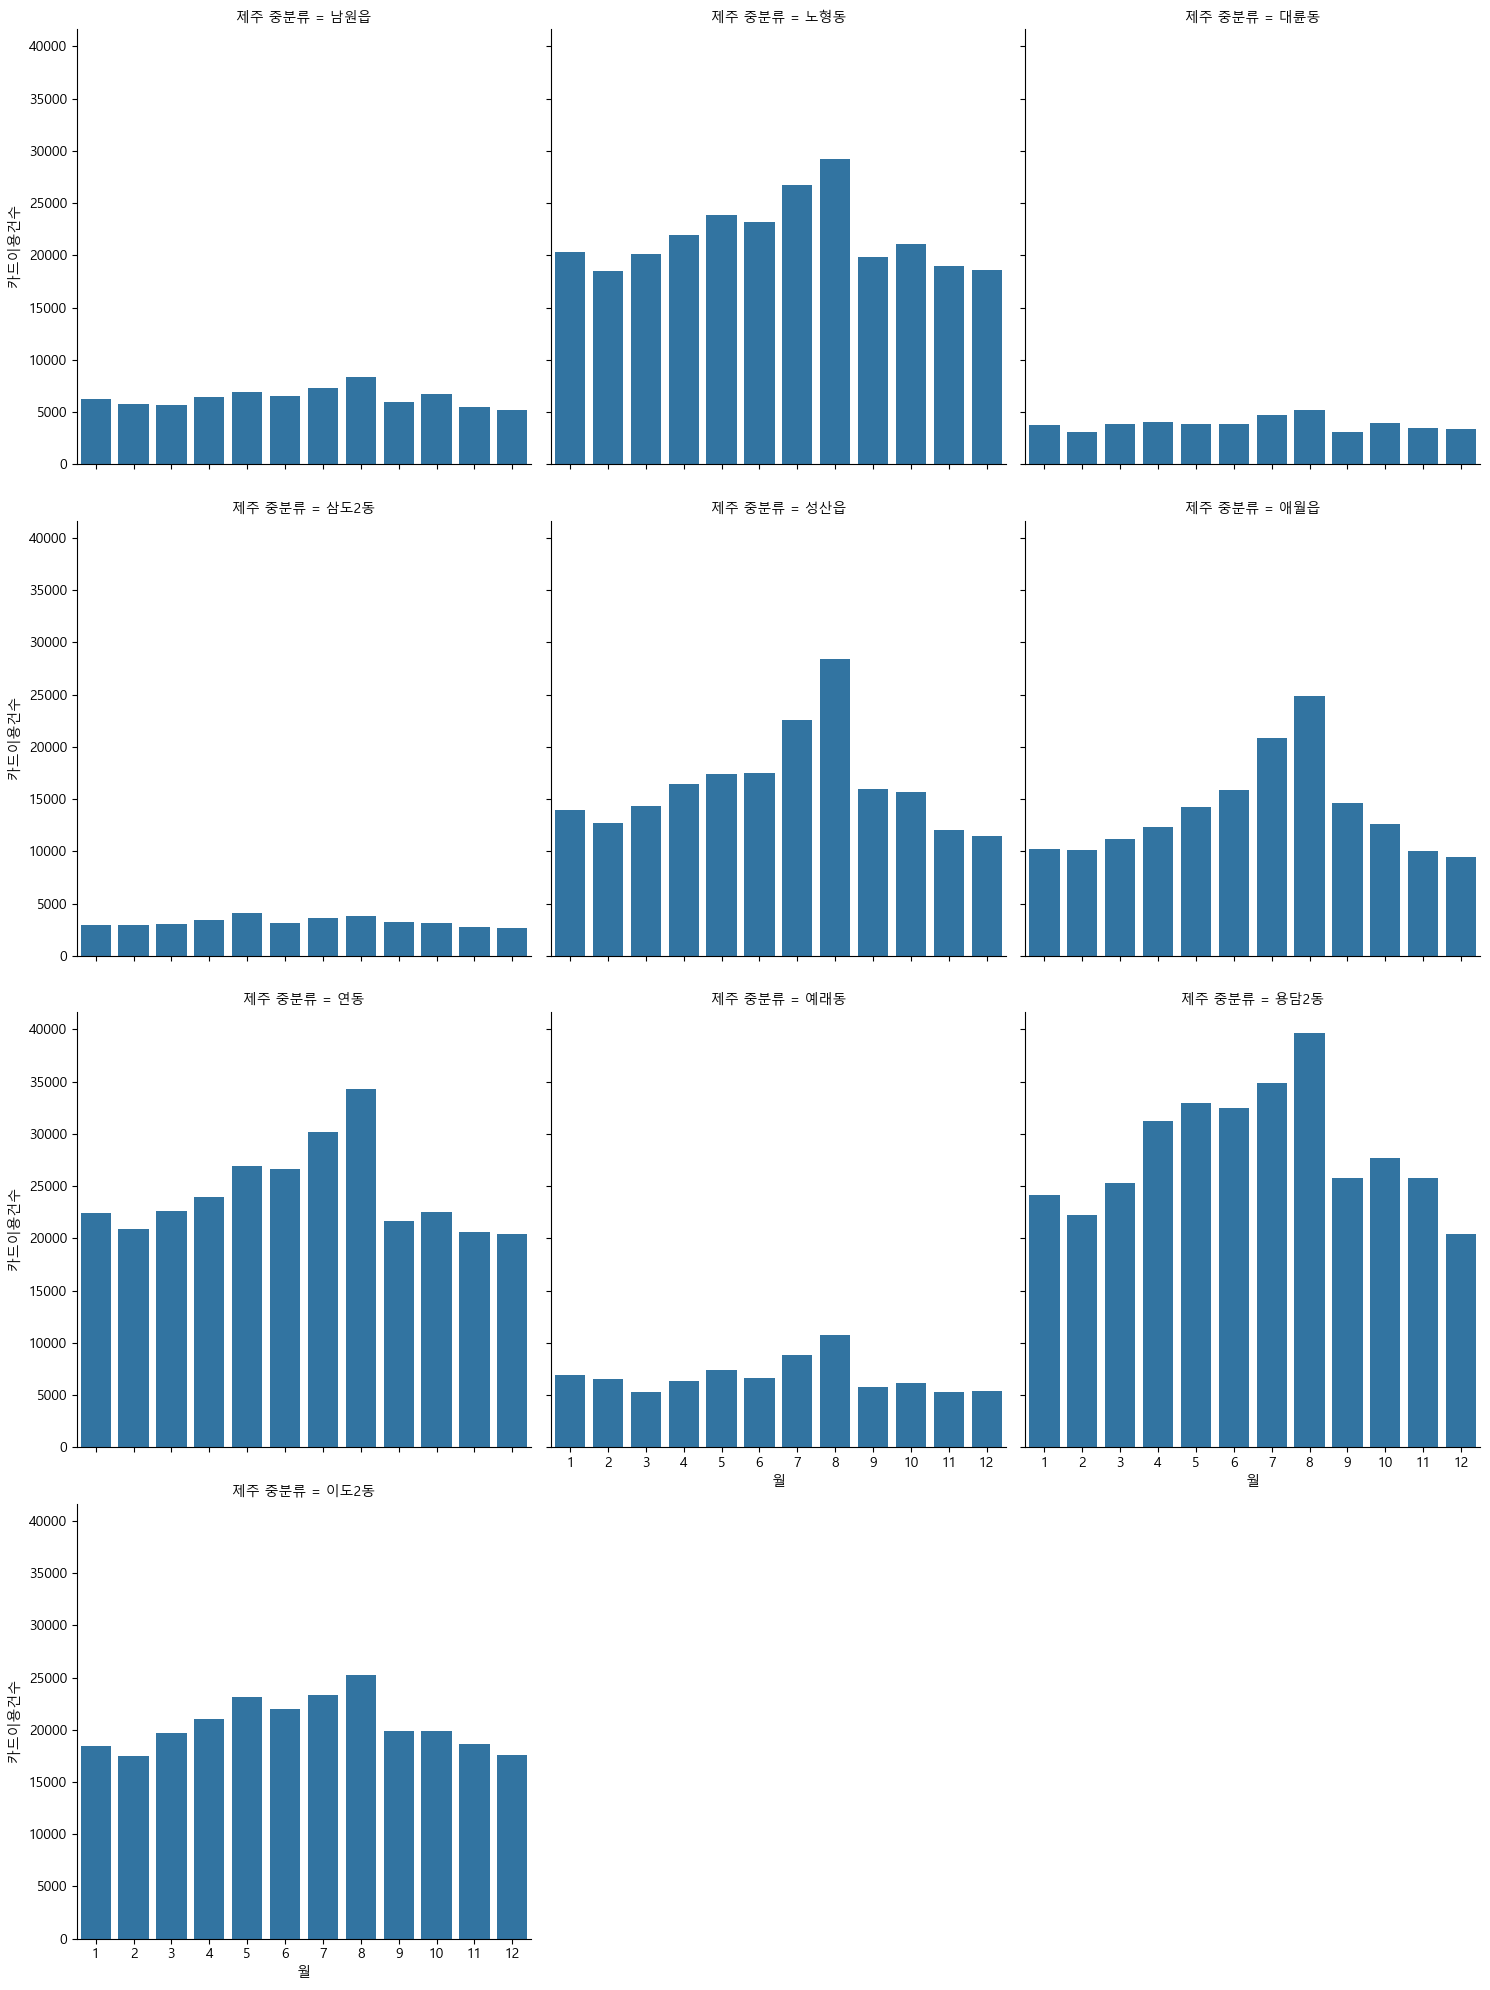

In [48]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(month_card_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '월', ' 카드이용건수 ', errorbar=None)
plt.show()

- 7월 8월에 관광객들이 많아 카드 건수도 7월 8월에 많다
- 이도2동에 5월과 7,8월과 큰 차이가 없다

In [49]:
jeju_type_card_use=df.groupby(['제주 중분류','업종명'])[' 카드이용건수 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

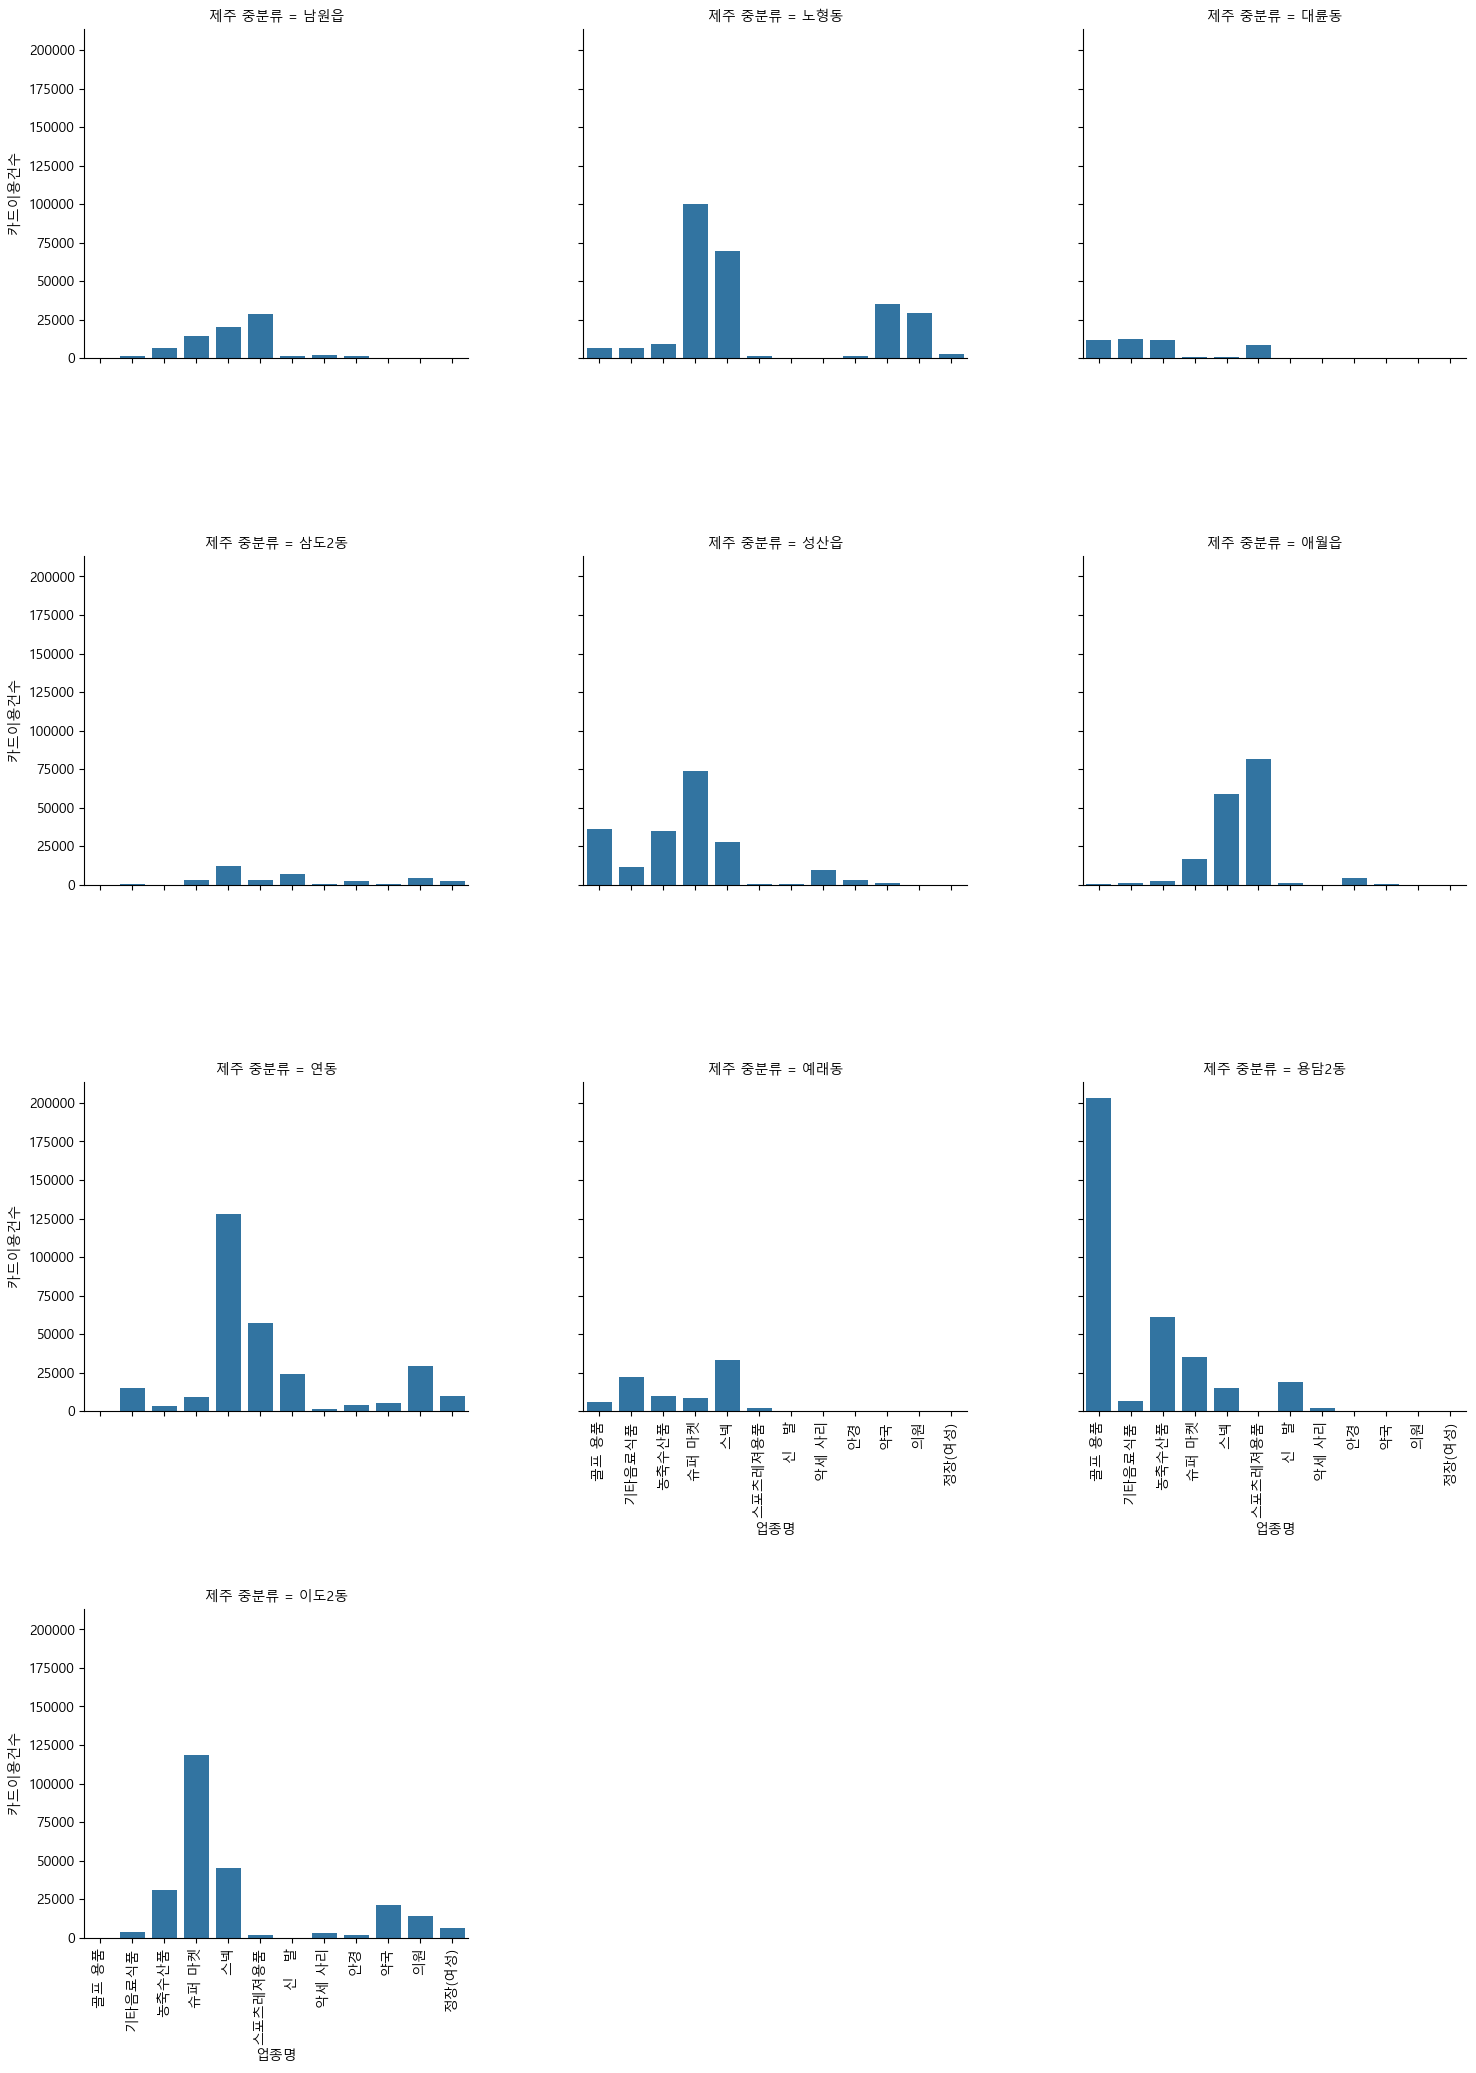

In [50]:
# Assuming 'jeju_type_card_use' is your DataFrame
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(jeju_type_card_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '업종명', ' 카드이용건수 ')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- 대부분 슈퍼마켓에 이용이 많은데 용담2동만 골프용품에 대한 카드건수가 많다
- 애월읍에는 스포츠레저용품이 많이 팔렸다 수상 레저활동이 몰려있다
- 연동도 스포츠레저용품이 많이 팔린 편인데 연동에 스포츠용품점이 몰려있다(나이키,아식스,아디다스,미즈노등)

In [51]:
jeju_type_use=df.groupby(['성별','제주 중분류','업종명'])[' 카드이용금액 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

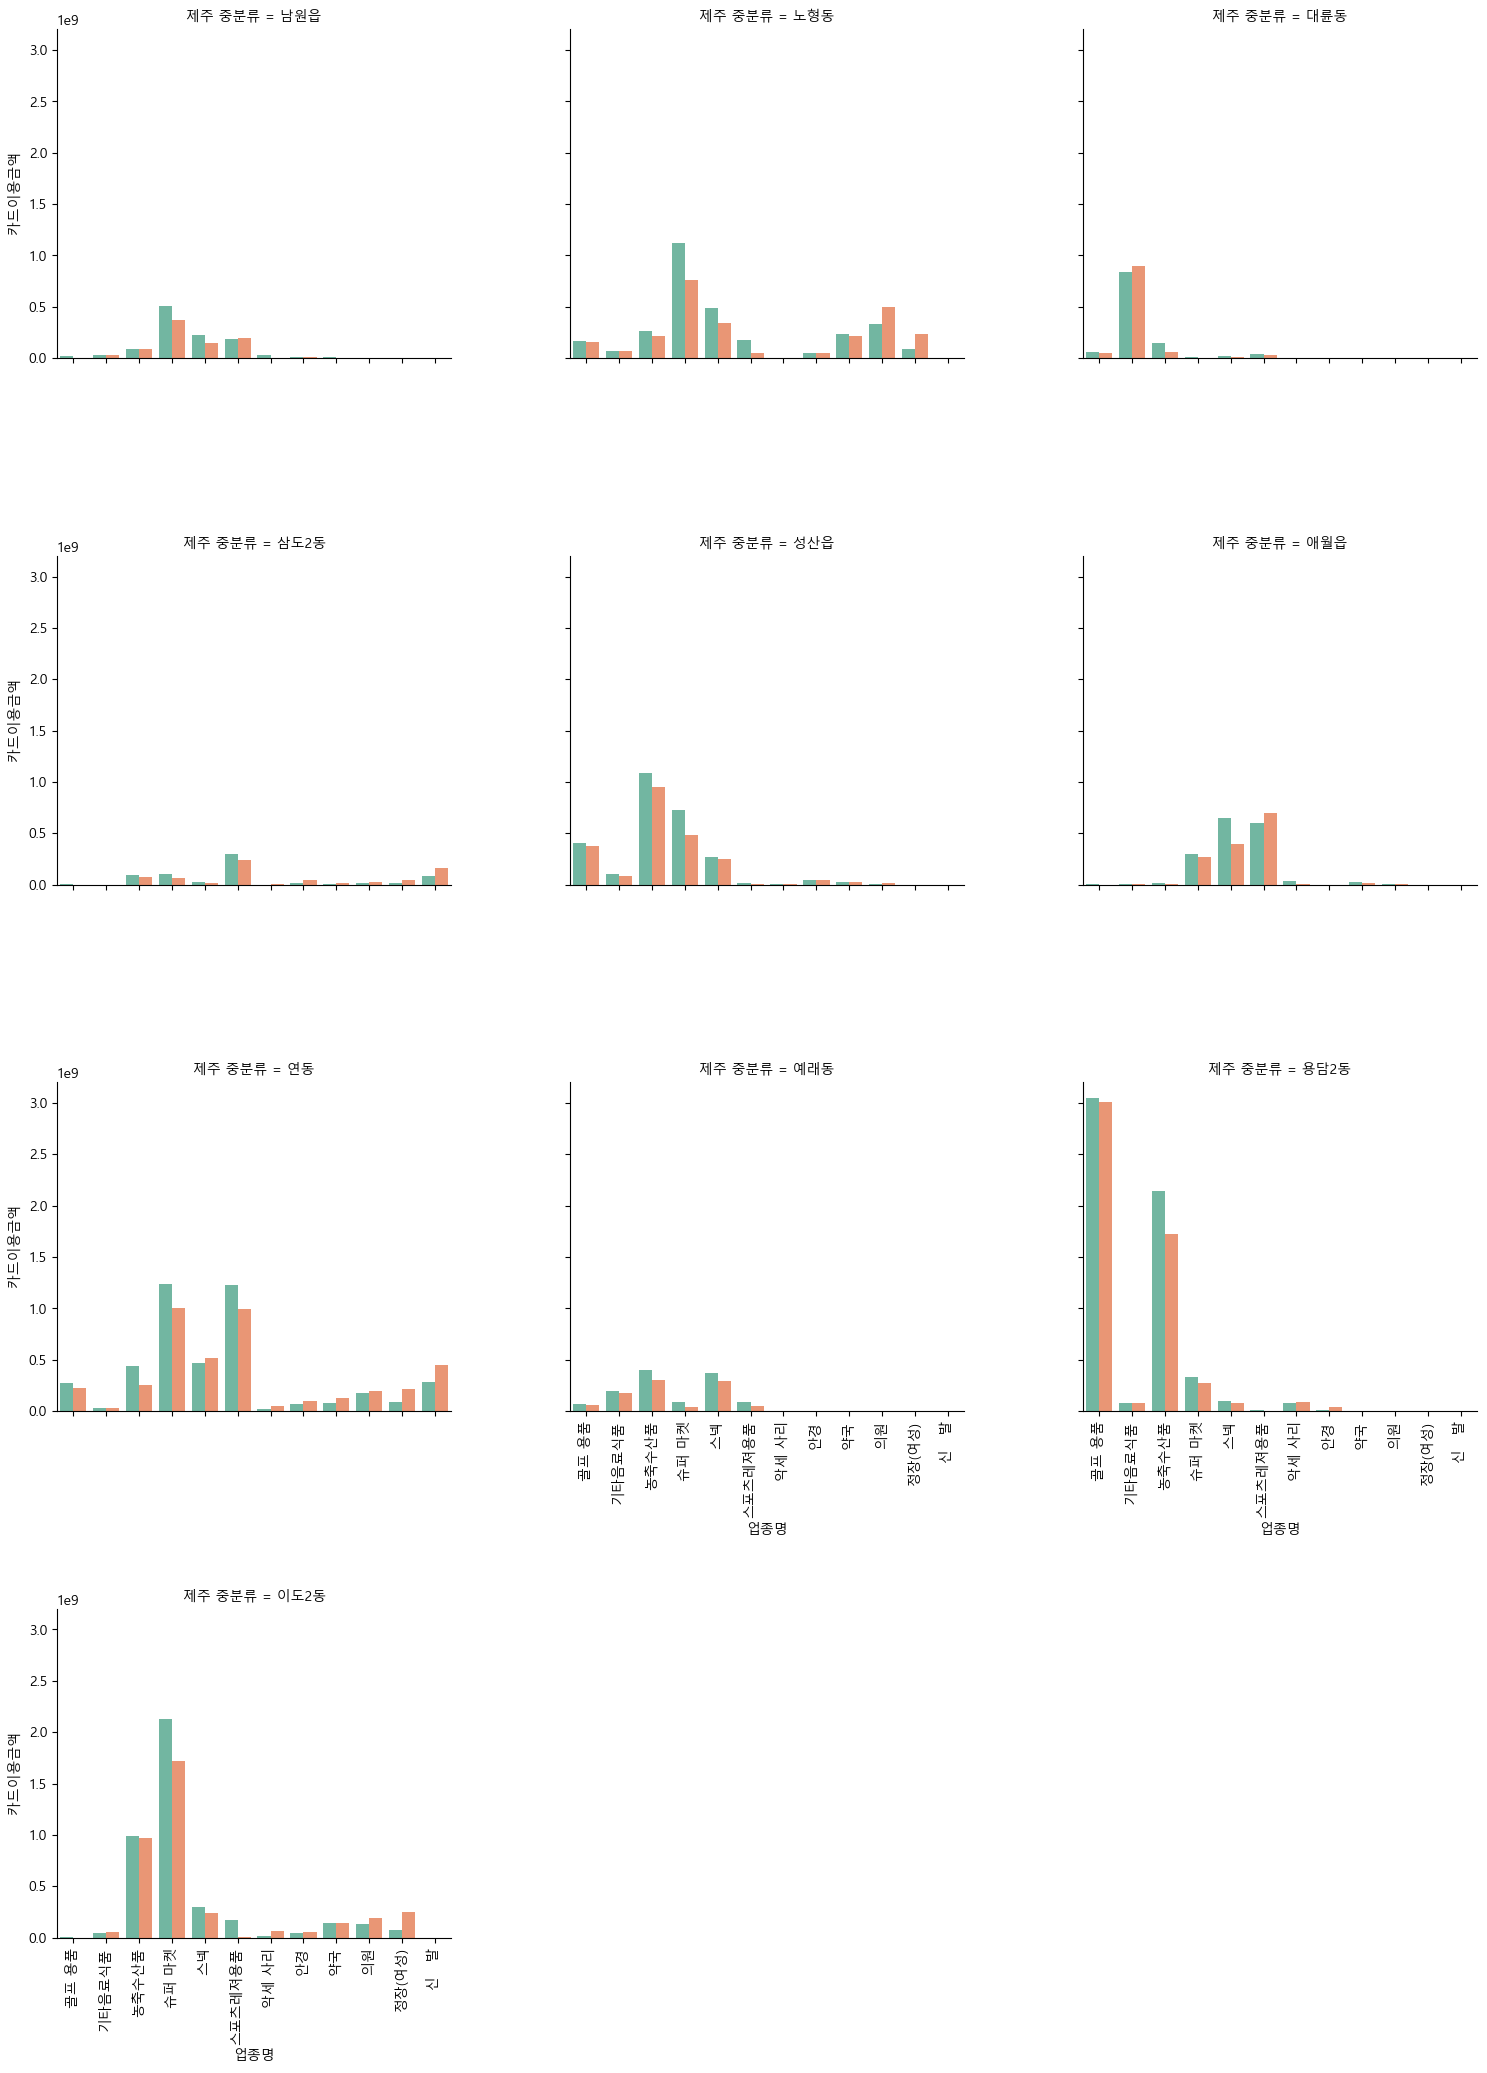

In [52]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(jeju_type_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '업종명', ' 카드이용금액 ','성별',palette='Set2')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- 용담2동에서 골프용품에 대한 구매가 많고 가격도 제일 높다
- 용담2동에서 농수산식품이 높은이유는 제주공항에서 떠나기전에 사는것 때문이라고 예측한다.
- 이도2동 슈퍼마켓이 높은이유는 음식점떄문이 아닐까 예측한다

In [53]:
jeju_generation_use=df.groupby(['연령대별','제주 중분류','업종명'])[' 카드이용금액 '].sum().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

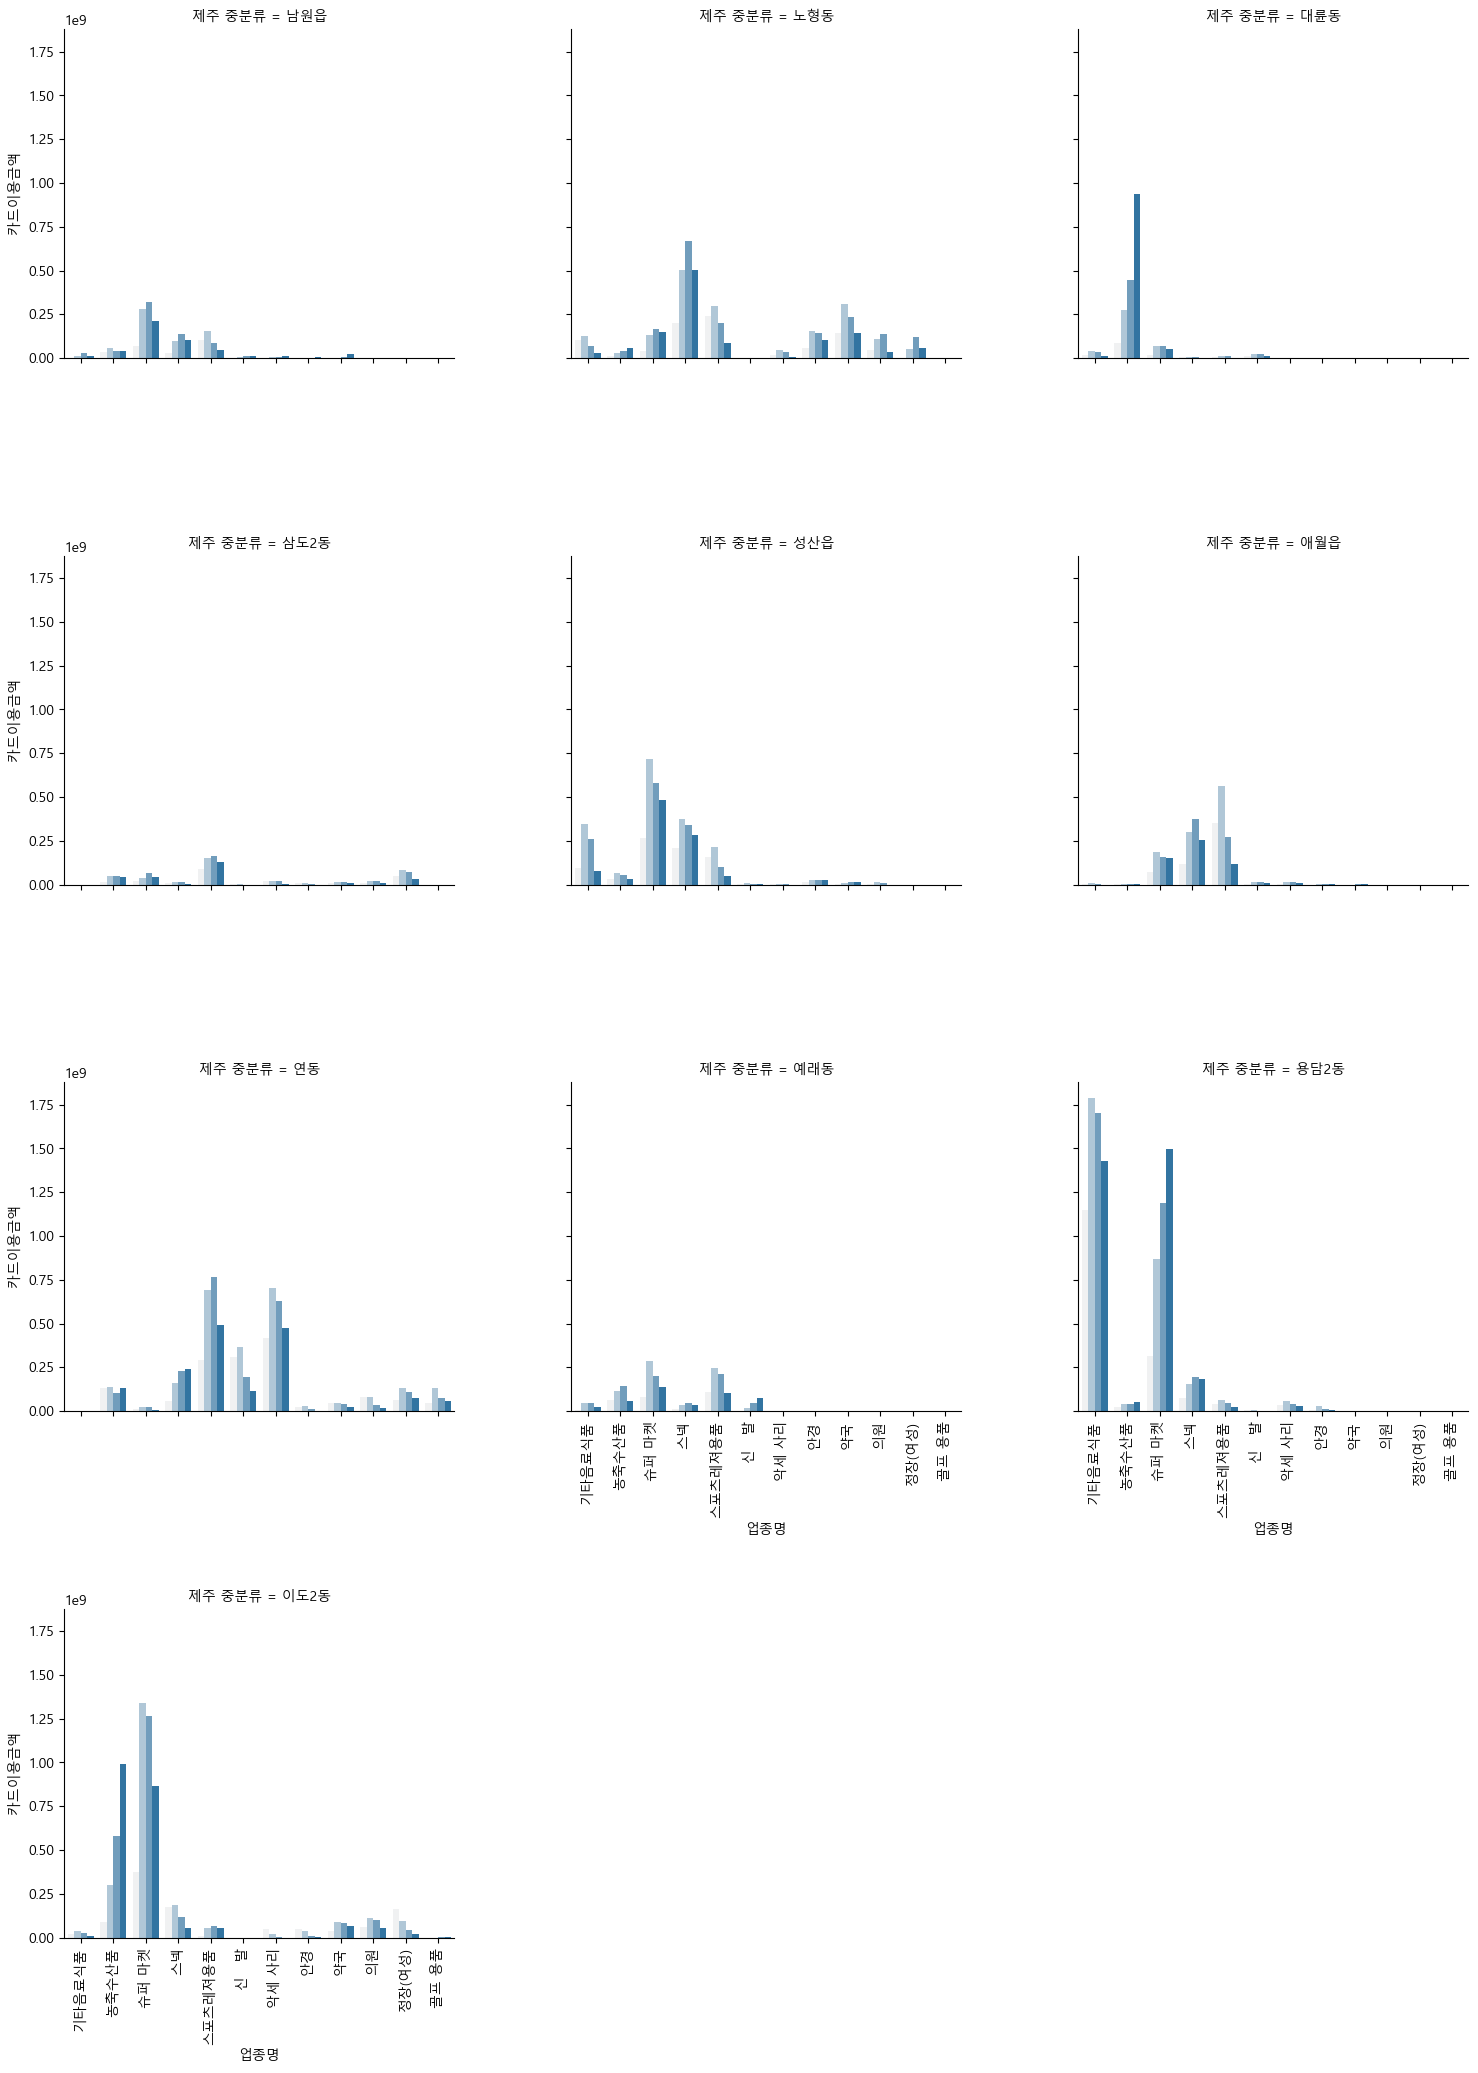

In [54]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(jeju_generation_use, col="제주 중분류", col_wrap=3, height=5)
g.map(sns.barplot, '업종명', ' 카드이용금액 ','연령대별')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

- 많은 소비가 먹는것에서 많이 일어난다
- 연동에서는 엑세러리에 대한 소비도 일어났다

In [55]:
gender_type_use =df.groupby(['업종명','성별'])[' 카드이용금액 '].sum().reset_index()

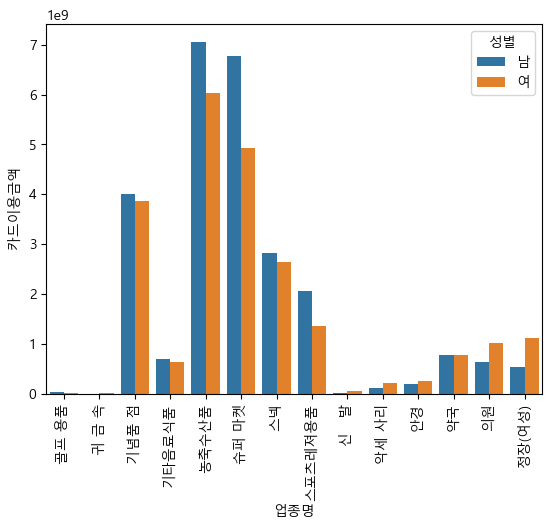

In [56]:
sns.barplot(data=gender_type_use,x='업종명',y=' 카드이용금액 ',hue='성별')
plt.xticks(rotation=90)
plt.show()

- 남성의 소비가 크고 의원과 엑세서리등은 여성의 소비 남성보다 높다

In [57]:
generation_type_use =df.groupby(['업종명','연령대별'])[' 카드이용금액 '].sum().reset_index()

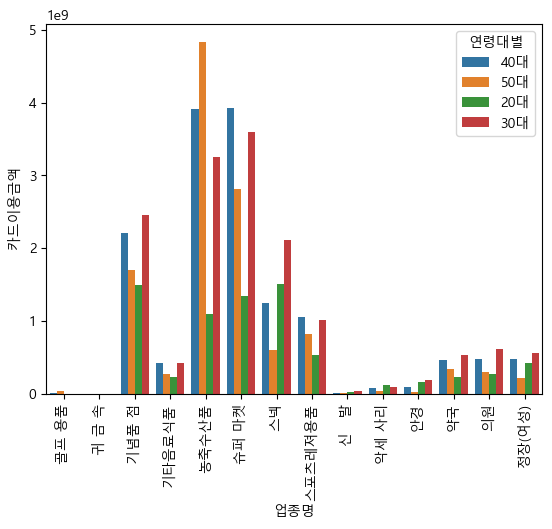

In [58]:
sns.barplot(data=generation_type_use,x='업종명',y=' 카드이용금액 ',hue='연령대별')
plt.xticks(rotation=90)
plt.show()

- 50대는 농축수산품에 구매력이 높다
- 30대 40대는 돈도 벌고 해서 먹는것과 기념품 스포츠레저용품을 각 업종비율에서 높게 차지한다.
- 의외인 점에선 30대에 의원 정장을 구매 다른 연령대에 비해 많다


In [59]:
month_money_used=df.groupby('월')[' 카드이용금액 '].sum().reset_index()

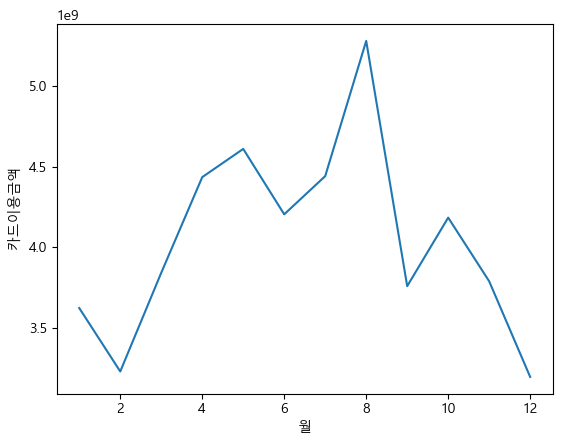

In [60]:
sns.lineplot(data=month_money_used,x='월',y=' 카드이용금액 ')
plt.show()

- 여름 휴가인 8월에 관광객이 많아 카드 이용금액도 제일 높게 형성되어있다

In [61]:
month_gender_money_used=df.groupby(['월','성별'])[' 카드이용금액 '].sum().reset_index()

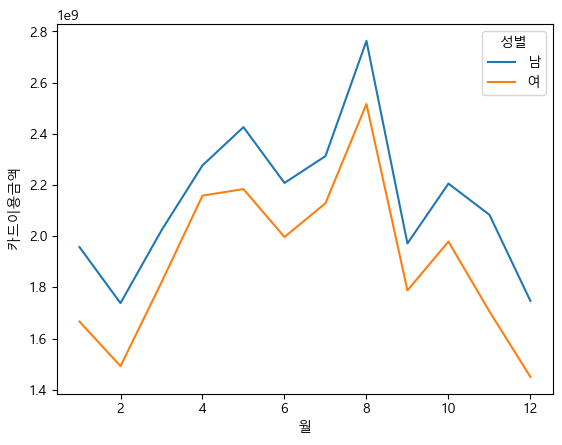

In [62]:
sns.lineplot(data=month_gender_money_used,x='월',y=' 카드이용금액 ',hue='성별')
plt.show()

- 남성이 소비가 여성보다 높게 형성되어 있다

In [63]:
month_generation_money_used=df.groupby(['월','연령대별'])[' 카드이용금액 '].sum().reset_index()

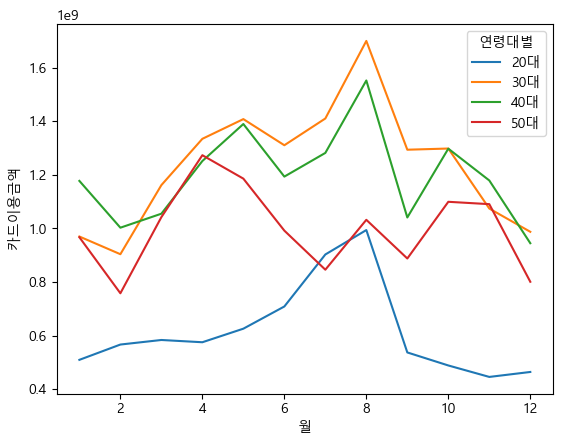

In [64]:
sns.lineplot(data=month_generation_money_used,x='월',y=' 카드이용금액 ',hue='연령대별')
plt.show()

- 30대가 소비력이 제일 강하게 형성되어 있다

<Axes: ylabel='건당이용금액'>

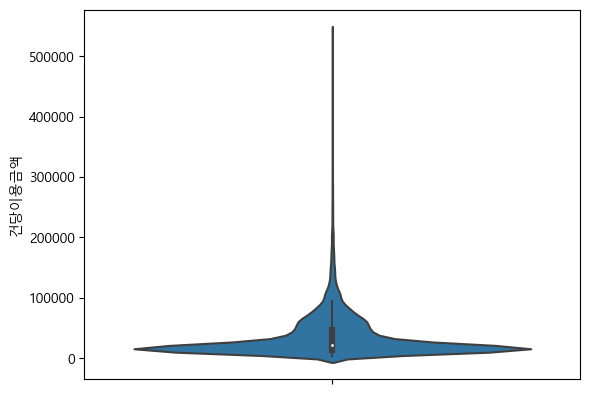

In [65]:
sns.violinplot(data=df, y='건당이용금액')

<Axes: ylabel=' 카드이용금액 '>

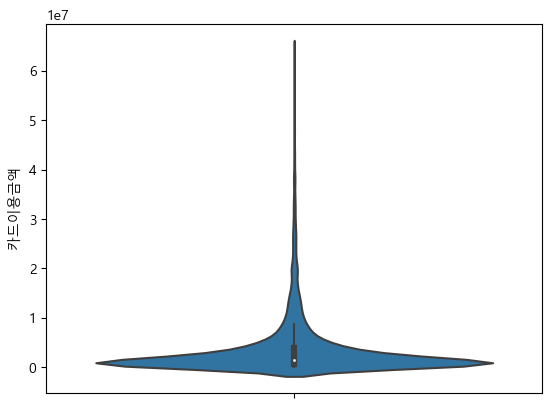

In [66]:
sns.violinplot(data=df, y=' 카드이용금액 ')

In [67]:
month_gender_generation=df.groupby(['성별','연령대별'])['월'].value_counts().reset_index()

c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\eagls\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x2500 with 0 Axes>

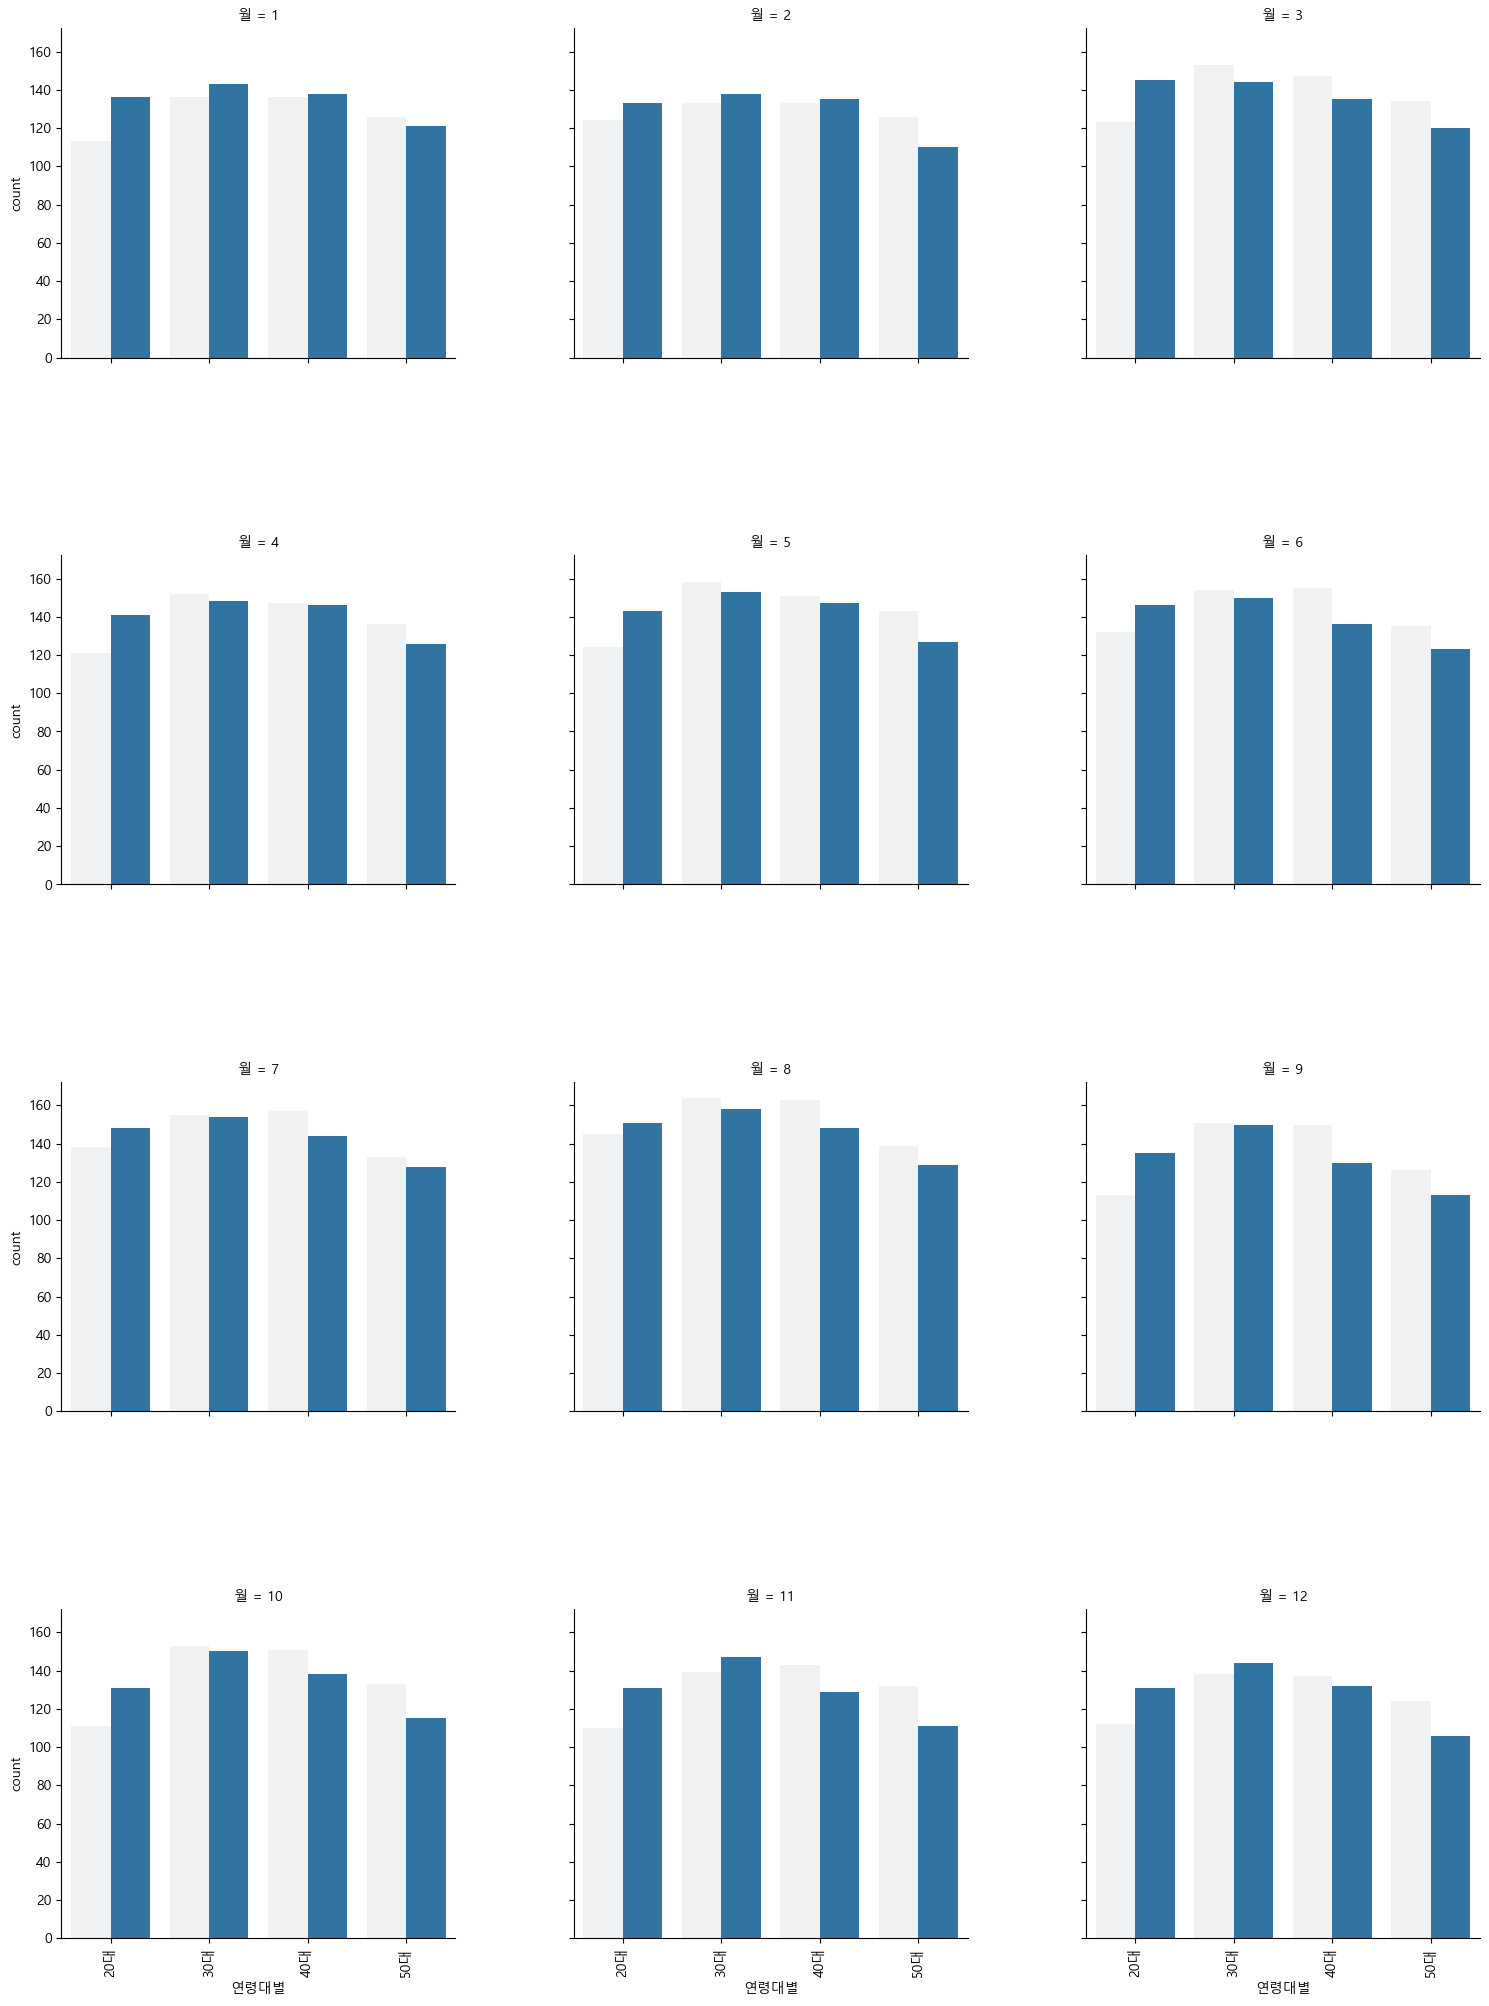

In [68]:
plt.figure(figsize=(25, 25))
g = sns.FacetGrid(month_gender_generation, col="월", col_wrap=3, height=5)
g.map(sns.barplot, '연령대별', 'count','성별')

# Adjust x-axis label rotation for each subplot
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

In [69]:
month_generation=df.groupby('연령대별')['월'].value_counts().reset_index()

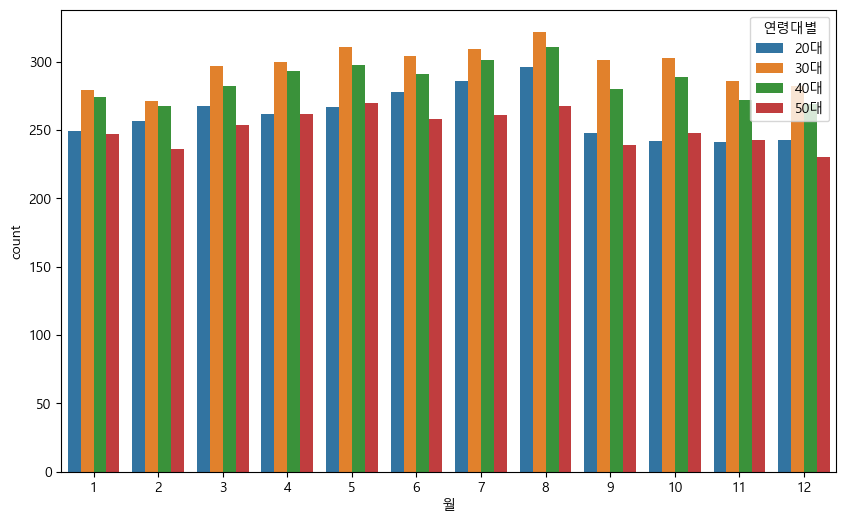

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=month_generation,x='월', y='count',hue='연령대별')

plt.show()

- 30대 40대순은 모든월에 제일 방문자가 많고 학기가 시작되고 날씾가 좋은 4월 5월 10월 11월에는 50대의 방문자가 방학시즌 휴가시즌 추운 시기에는 20대의 방문자가 50대보다 많다

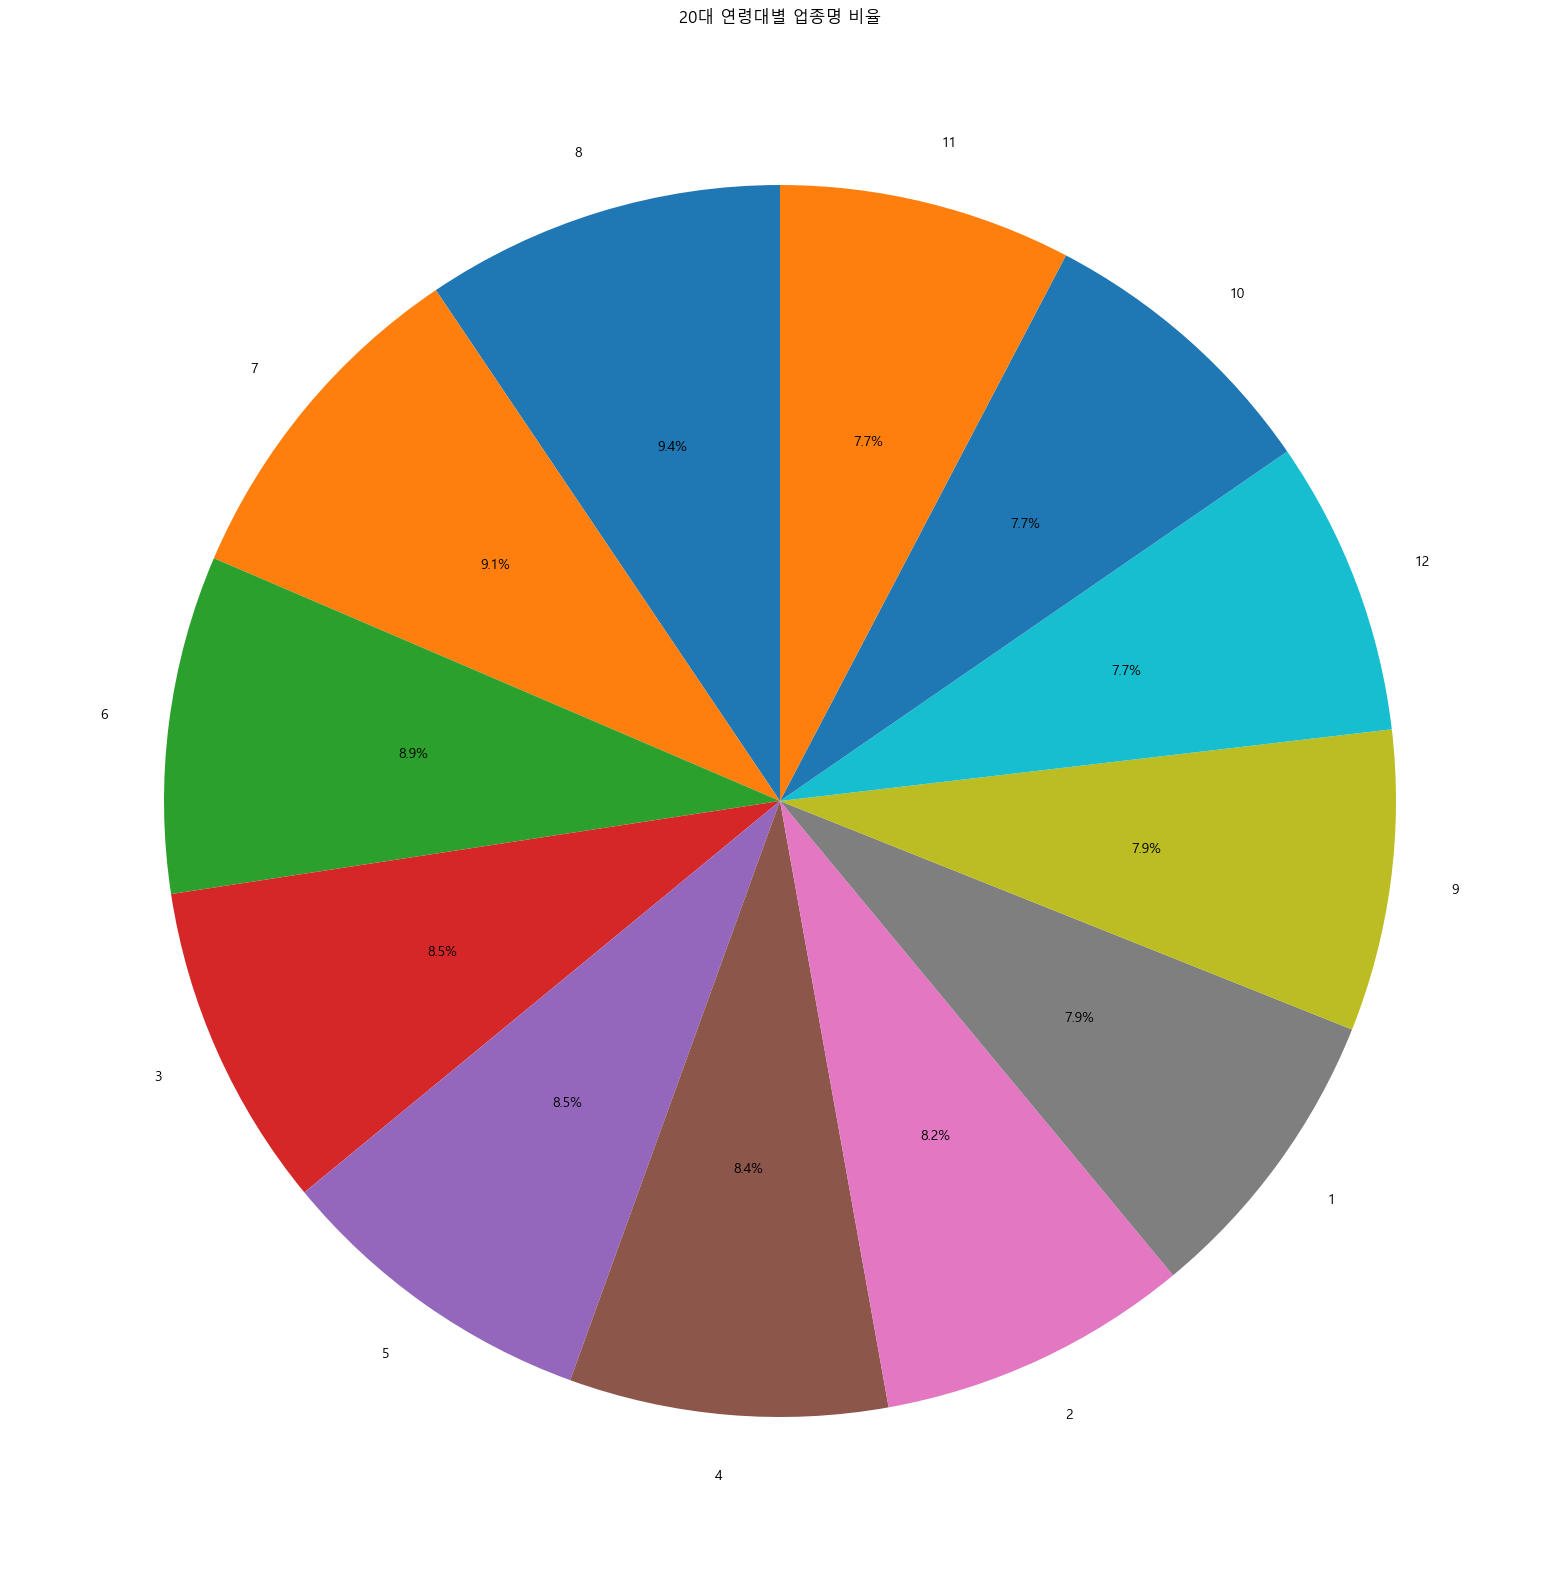

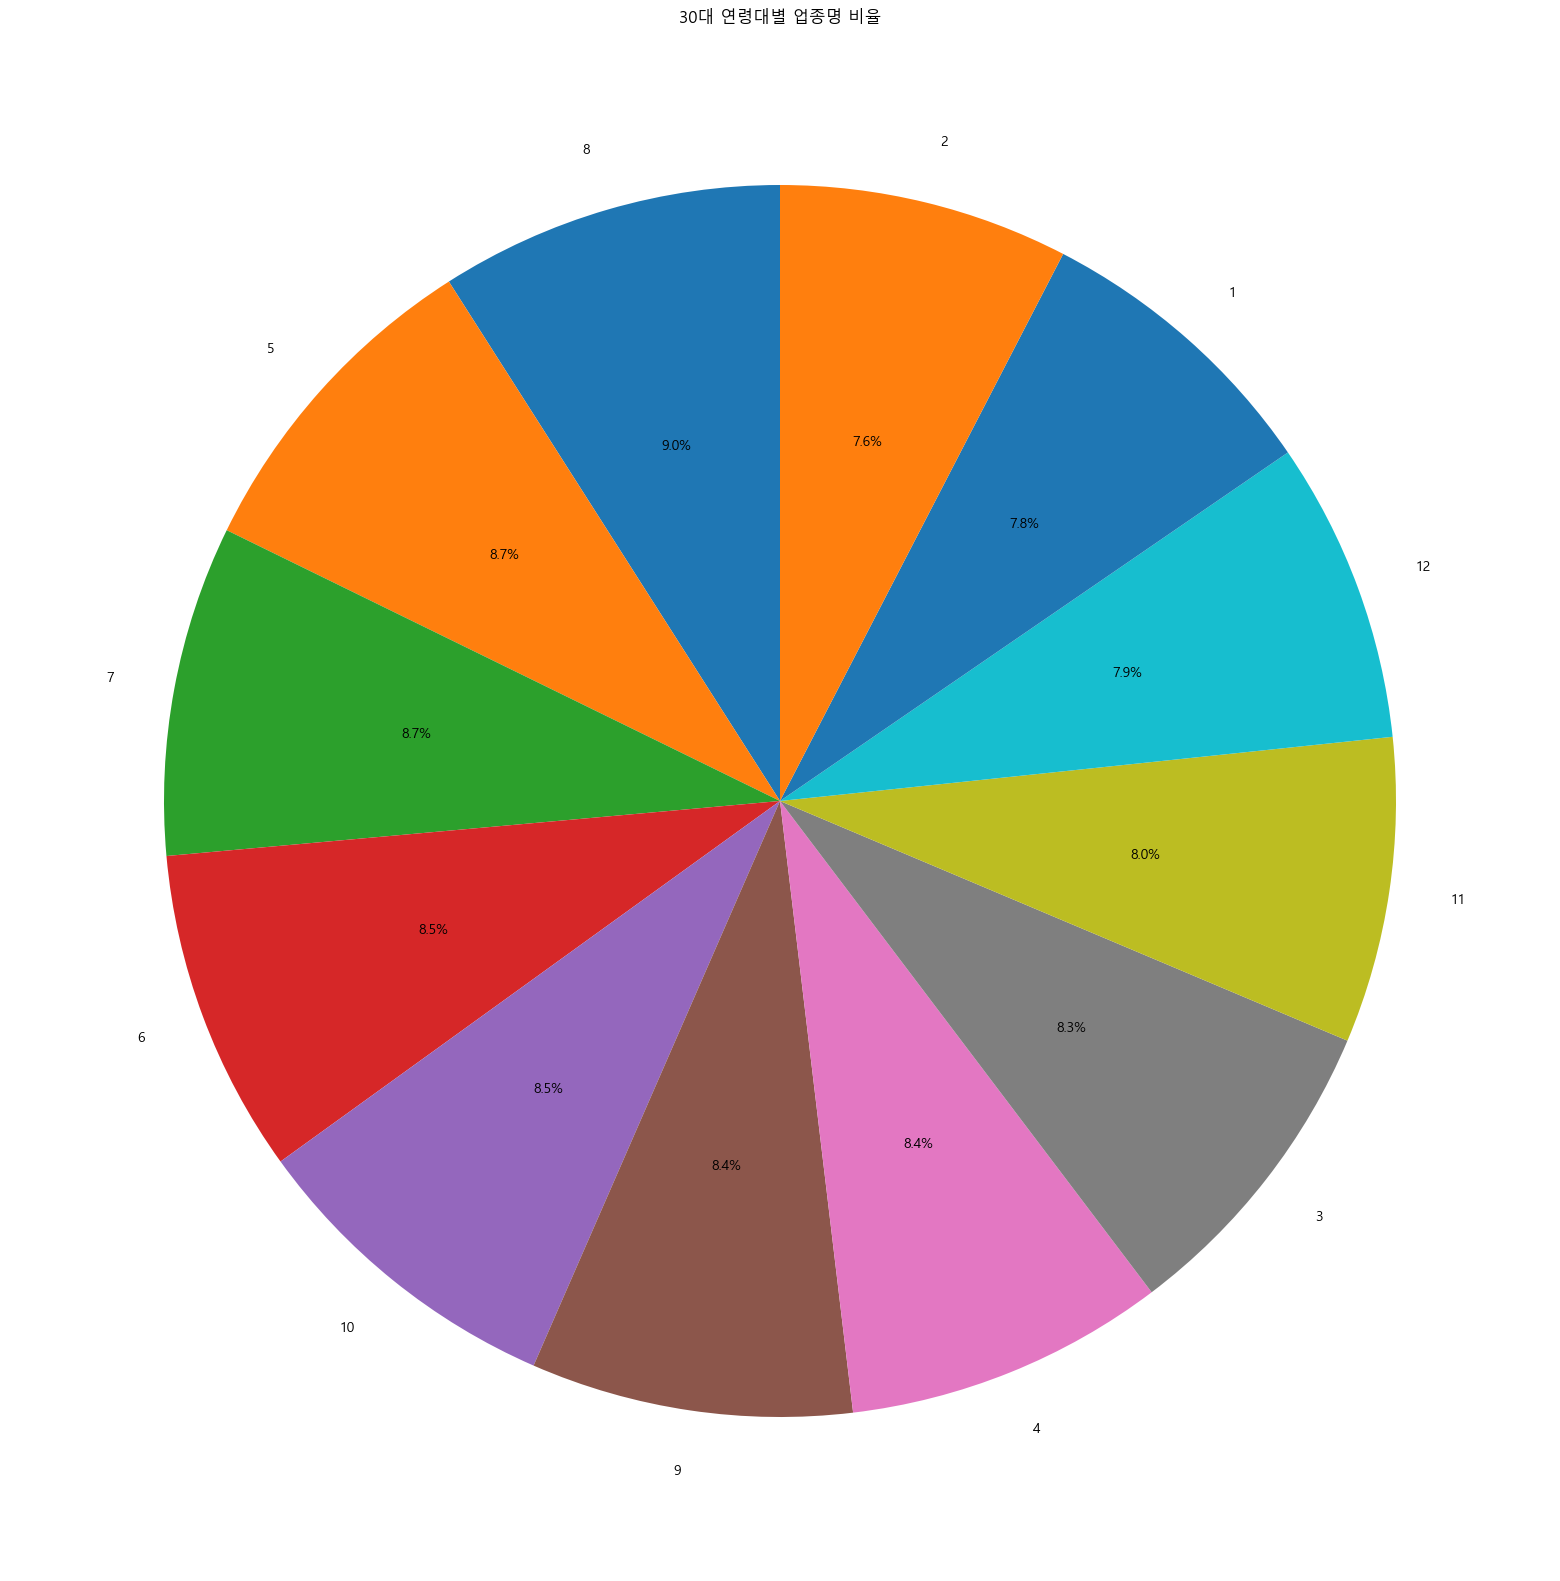

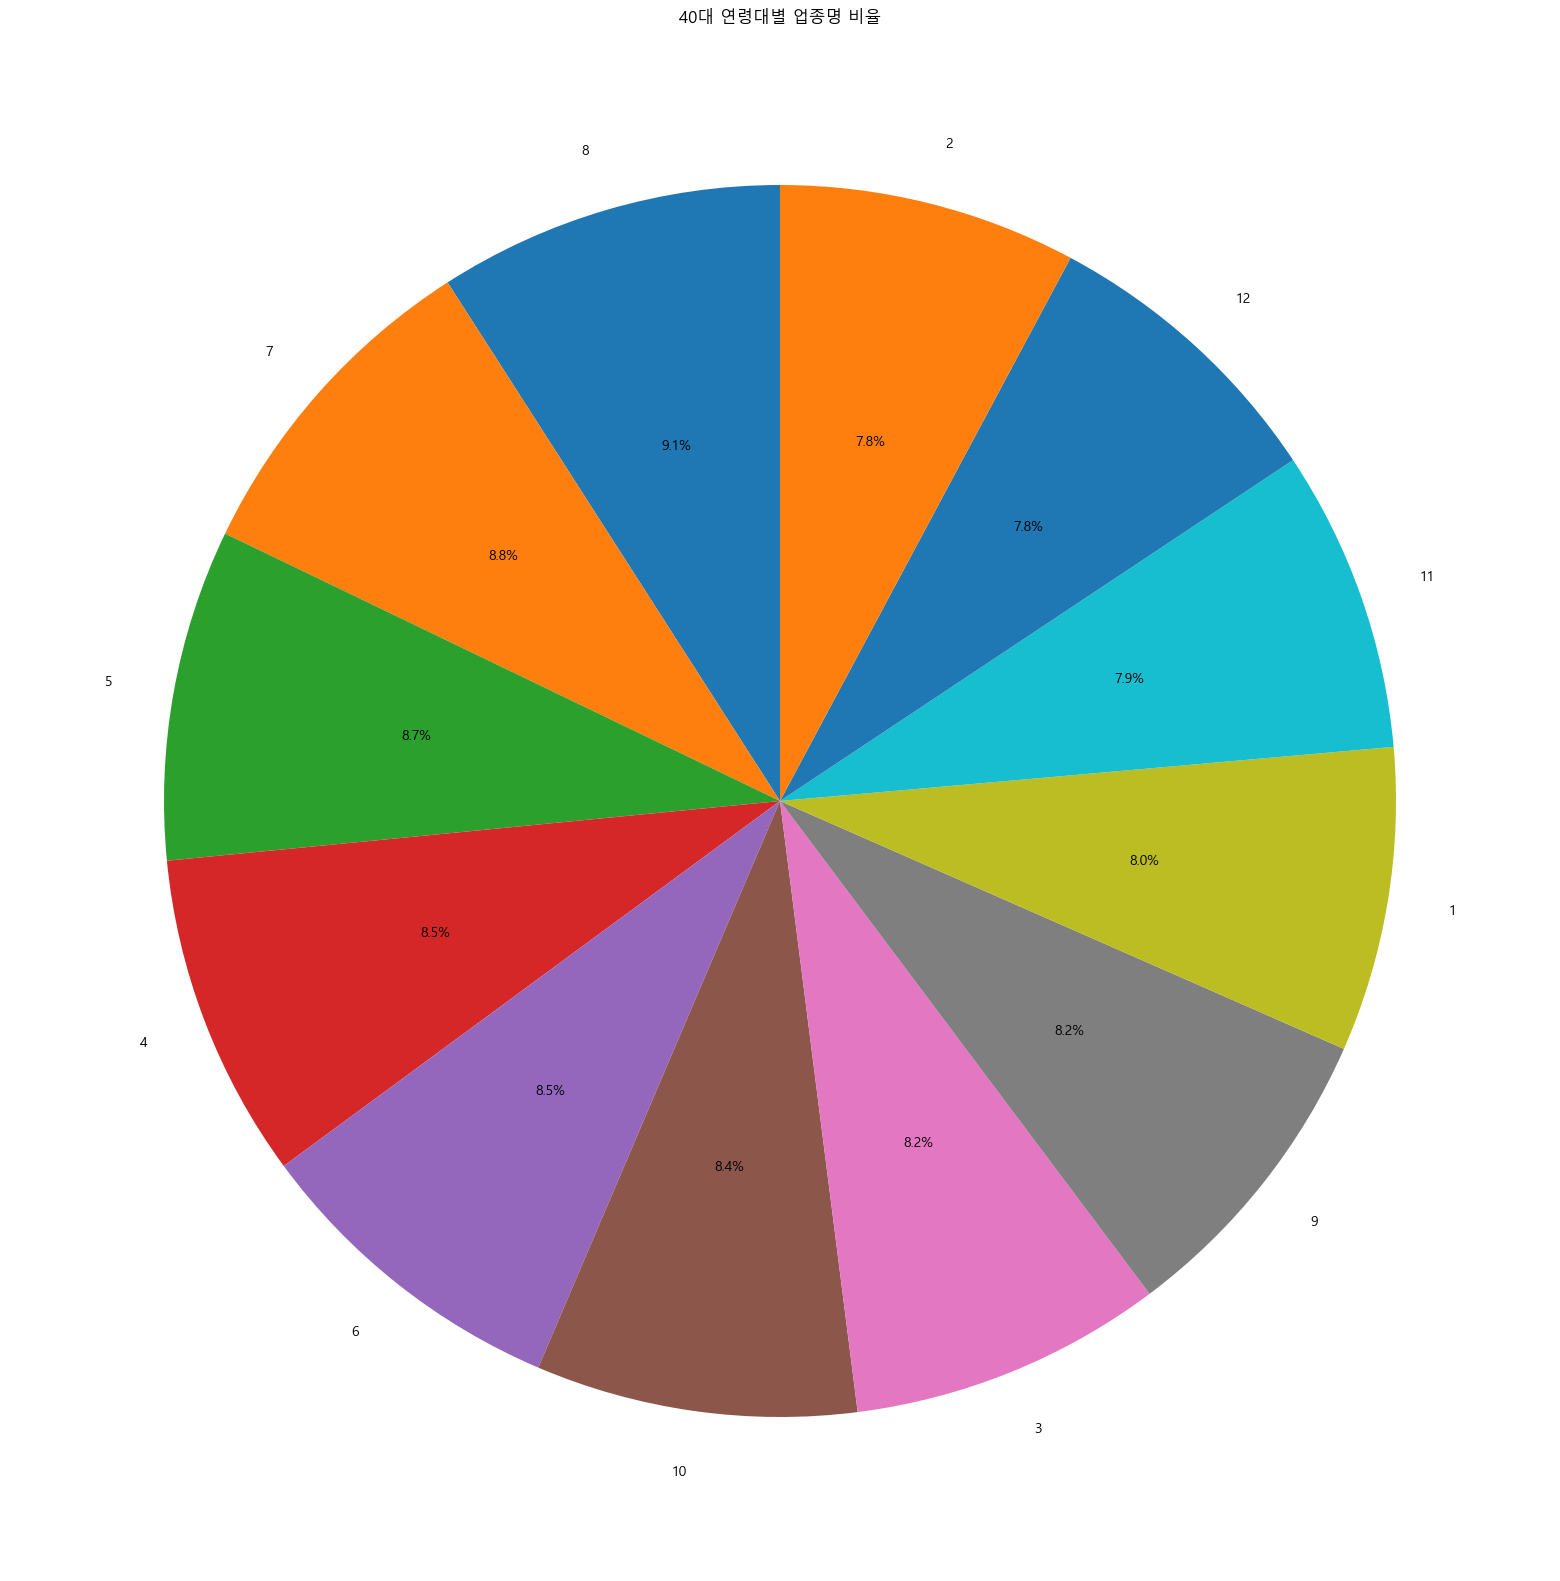

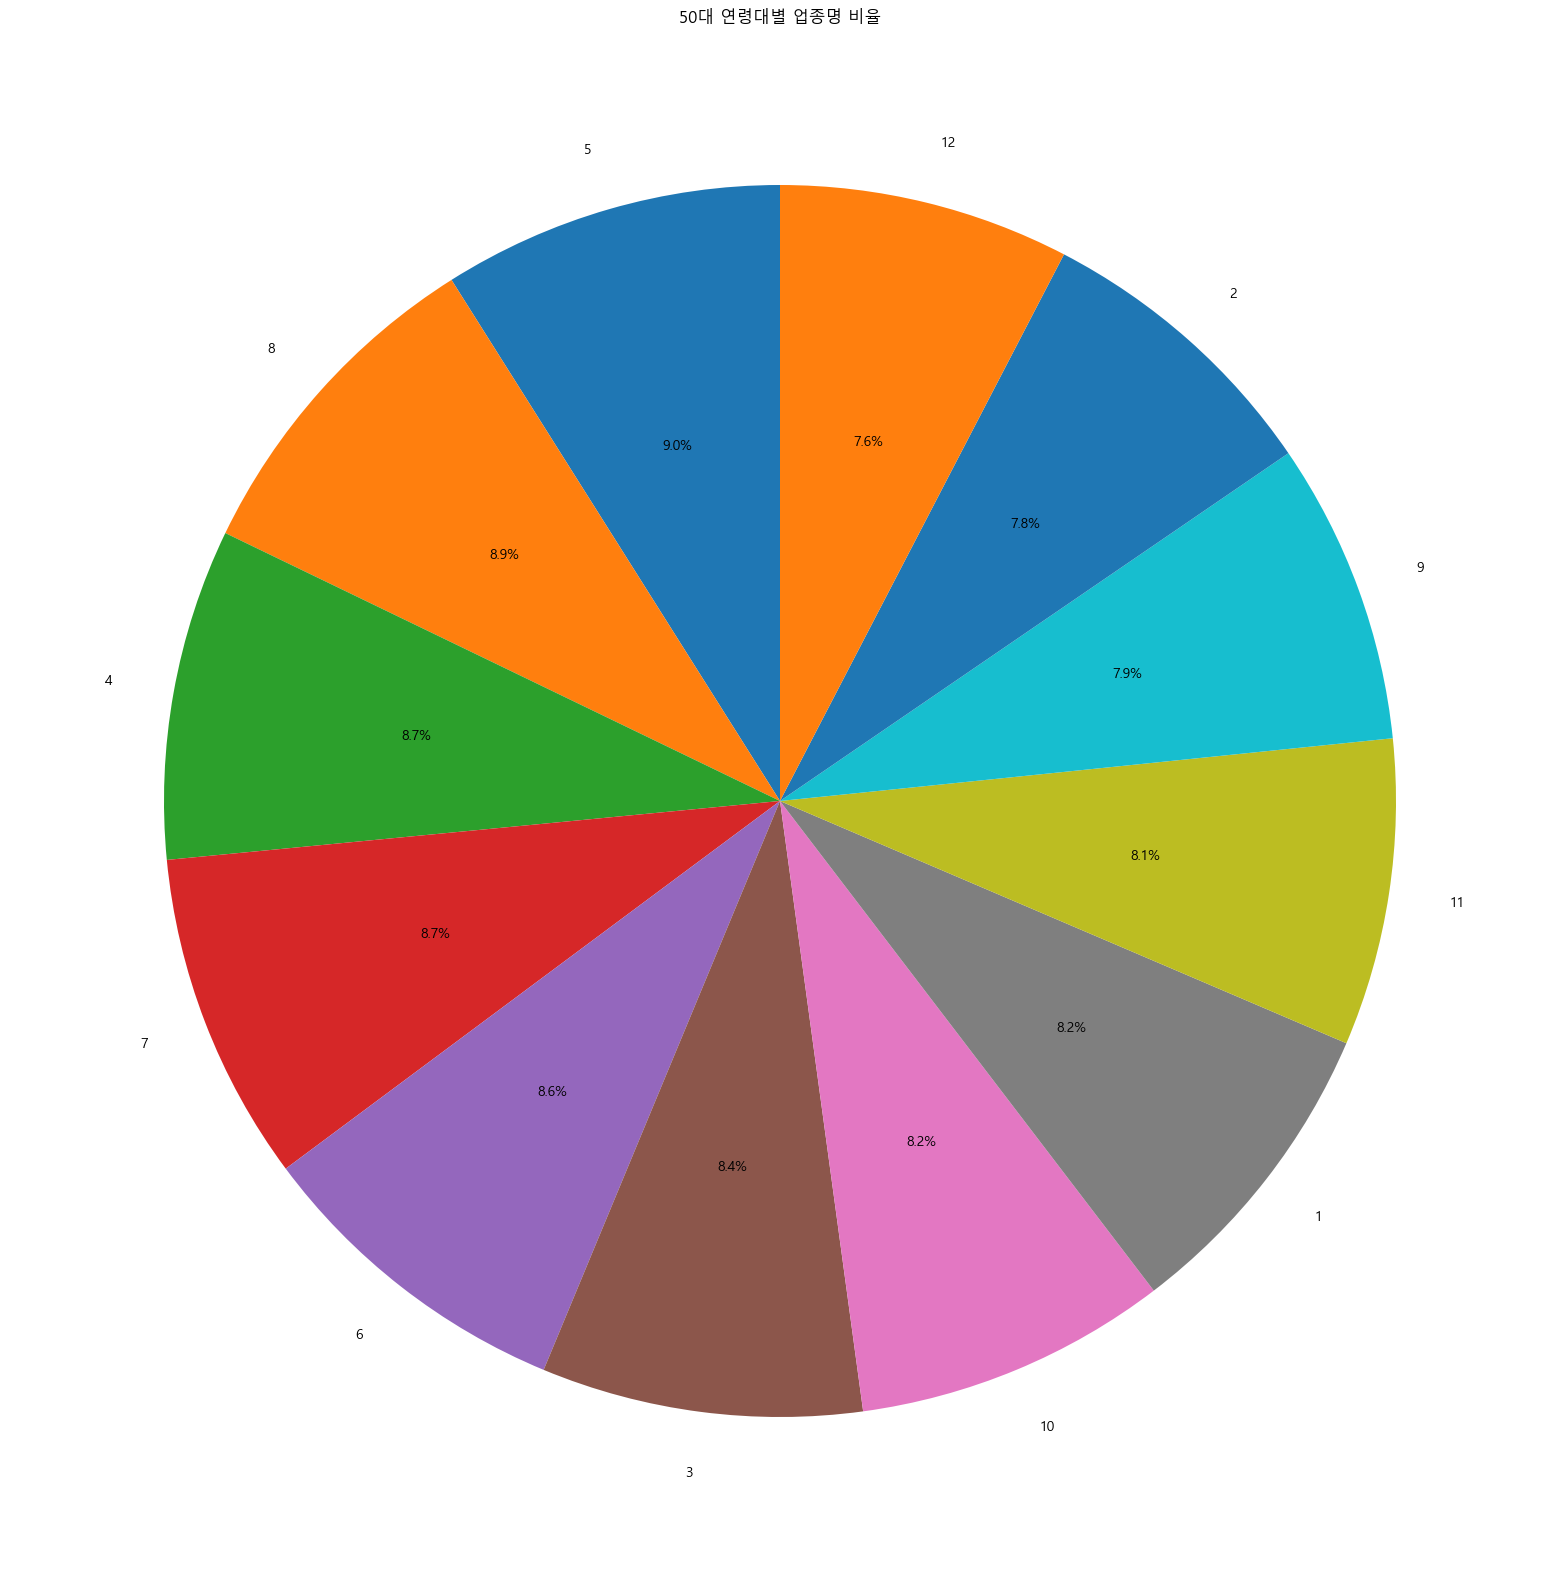

In [71]:
for age_group, data in month_generation.groupby('연령대별'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['월'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{age_group} 연령대별 업종명 비율')
    plt.show()


- 20대부터 40대 까지는 일하는사람 혹은 공부하는사람들이 많아 방학 혹은 휴가가 있는 8월의 비율이 제일 높다
- 50대는 은퇴한 사람들도 있고 꽃이 피는 4월 5월에 관광객이 방문한다

In [73]:
season_type = df.groupby(['계절','업종명'])['업종명'].count().reset_index(name='count')

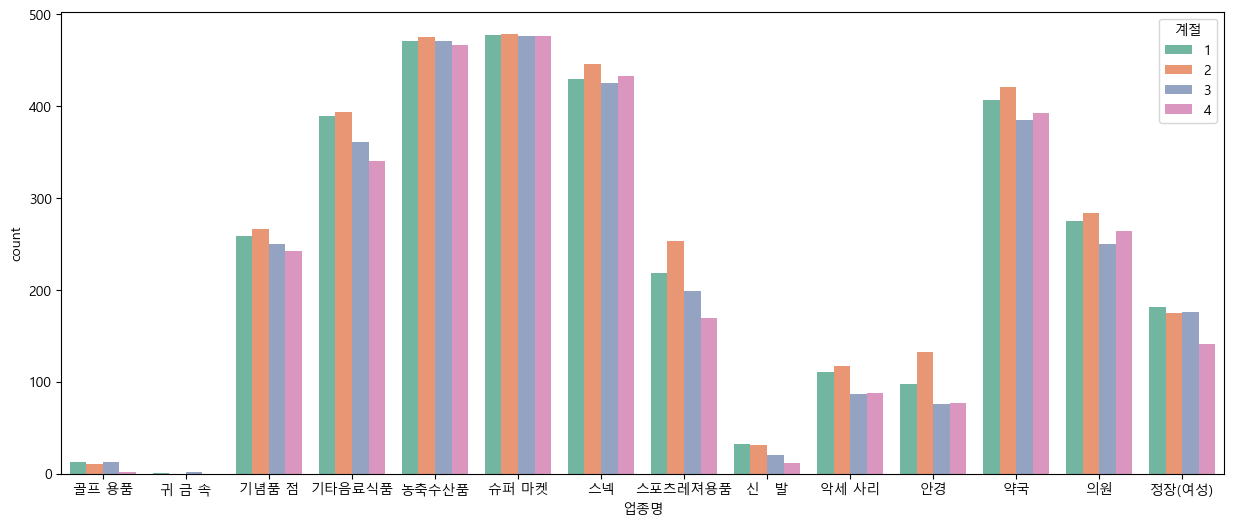

In [74]:
plt.figure(figsize=(15, 6))
sns.barplot(data=season_type, x='업종명', y='count',hue='계절', palette="Set2")
plt.show()

- 날씨가 좋은때 치기좋은 골프는 봄여름에 구매횟수가 많다
- 기념품과 수퍼마켓은 사람이 많이 오는 8월이 제일 많기는 하지만 그래도 계절과 상관없이 비슷하게 형성되어있다
- 레저는 여름에 많이 하니 스포츠레져용품은 여름에 구매가 많다
- 여름에 선글라스 구매를 많이하기때문에 여름에 구매가 많다
- 방문객이 많은 여름이라 약국 의원 스넥 기타음료식품이 방문이 많다


In [75]:
season_si = df.groupby(['계절','제주 대분류'])['제주 대분류'].count().reset_index(name='count')

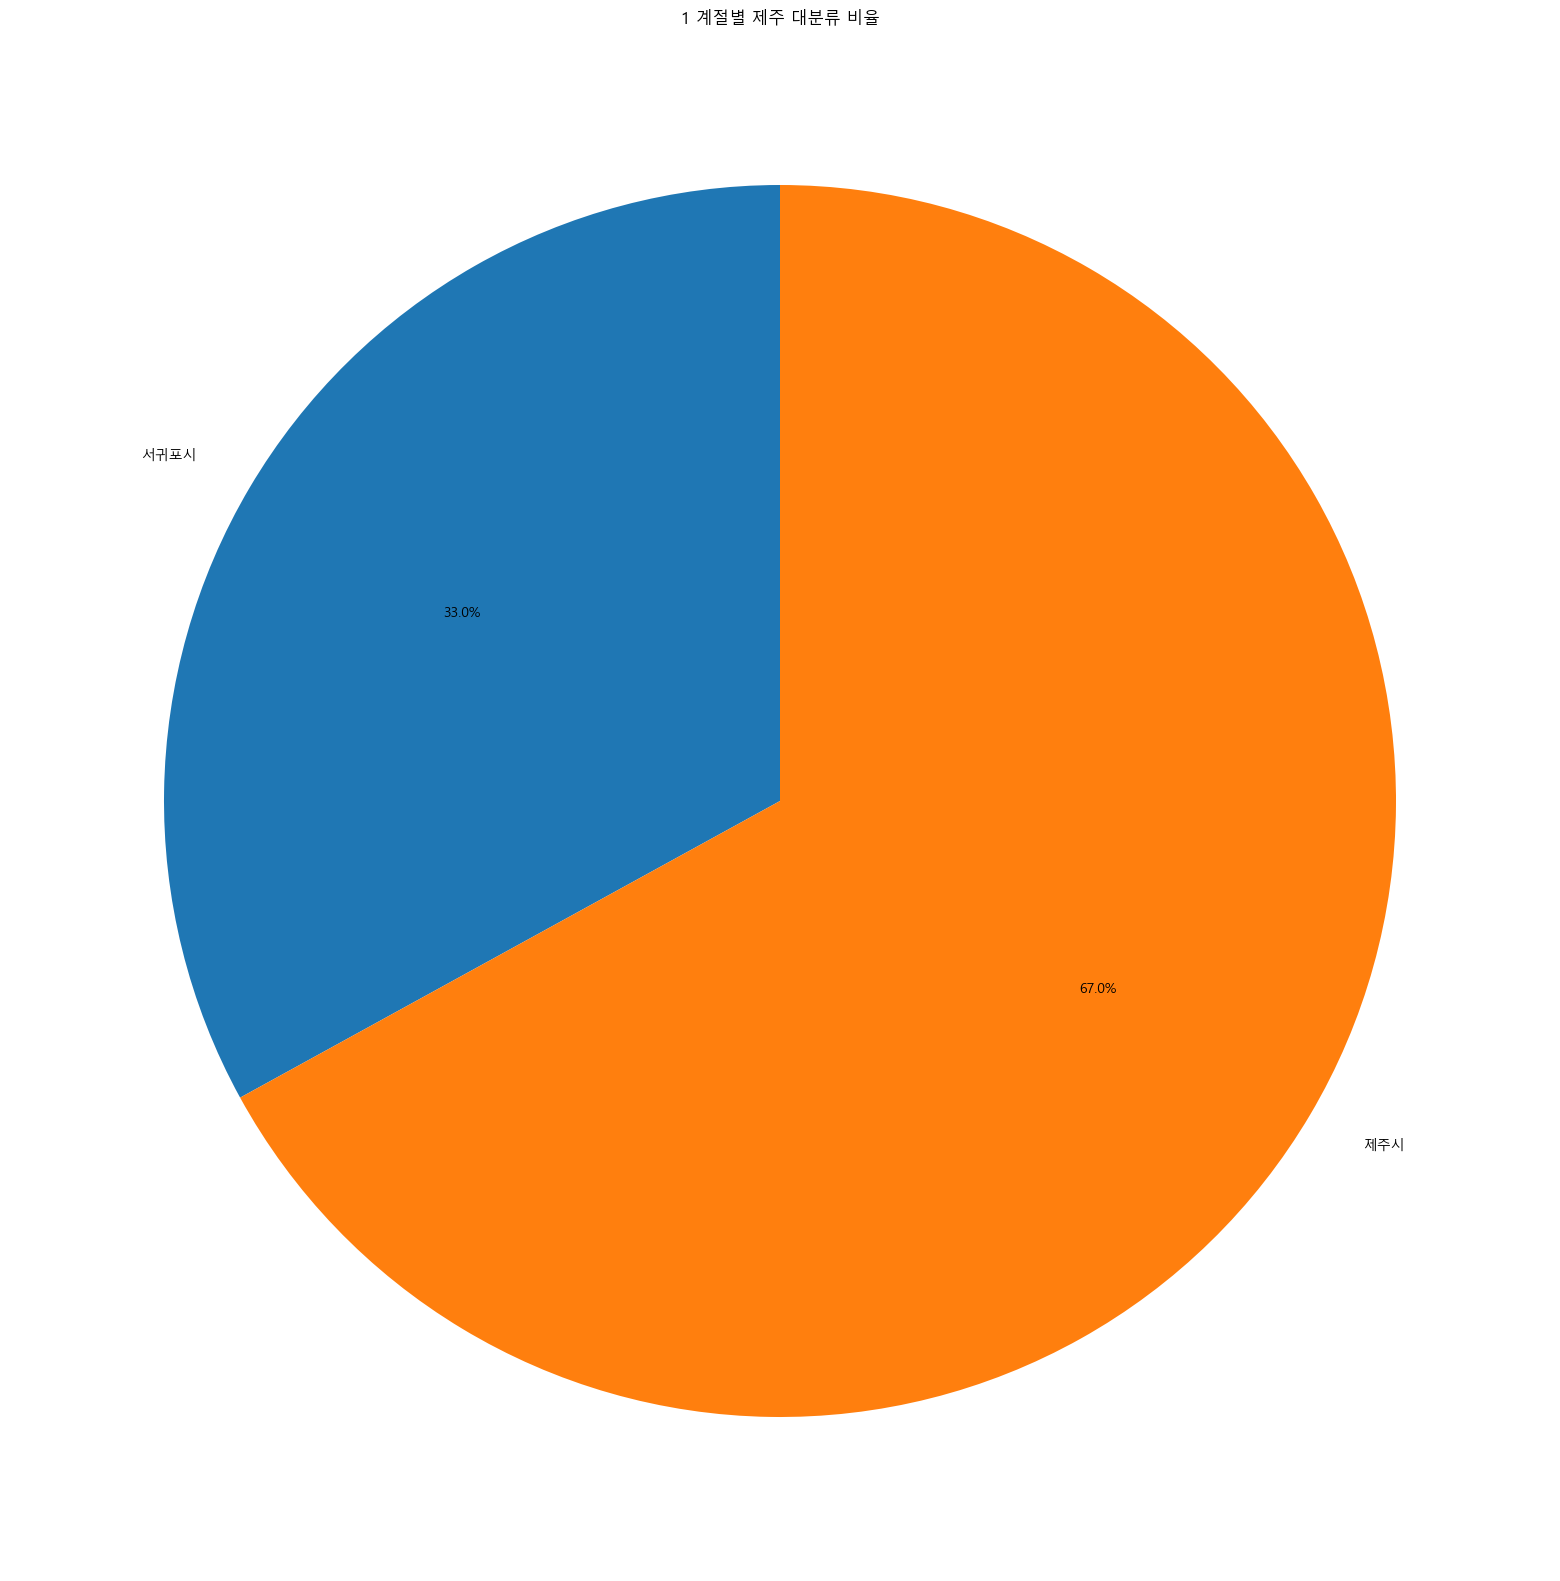

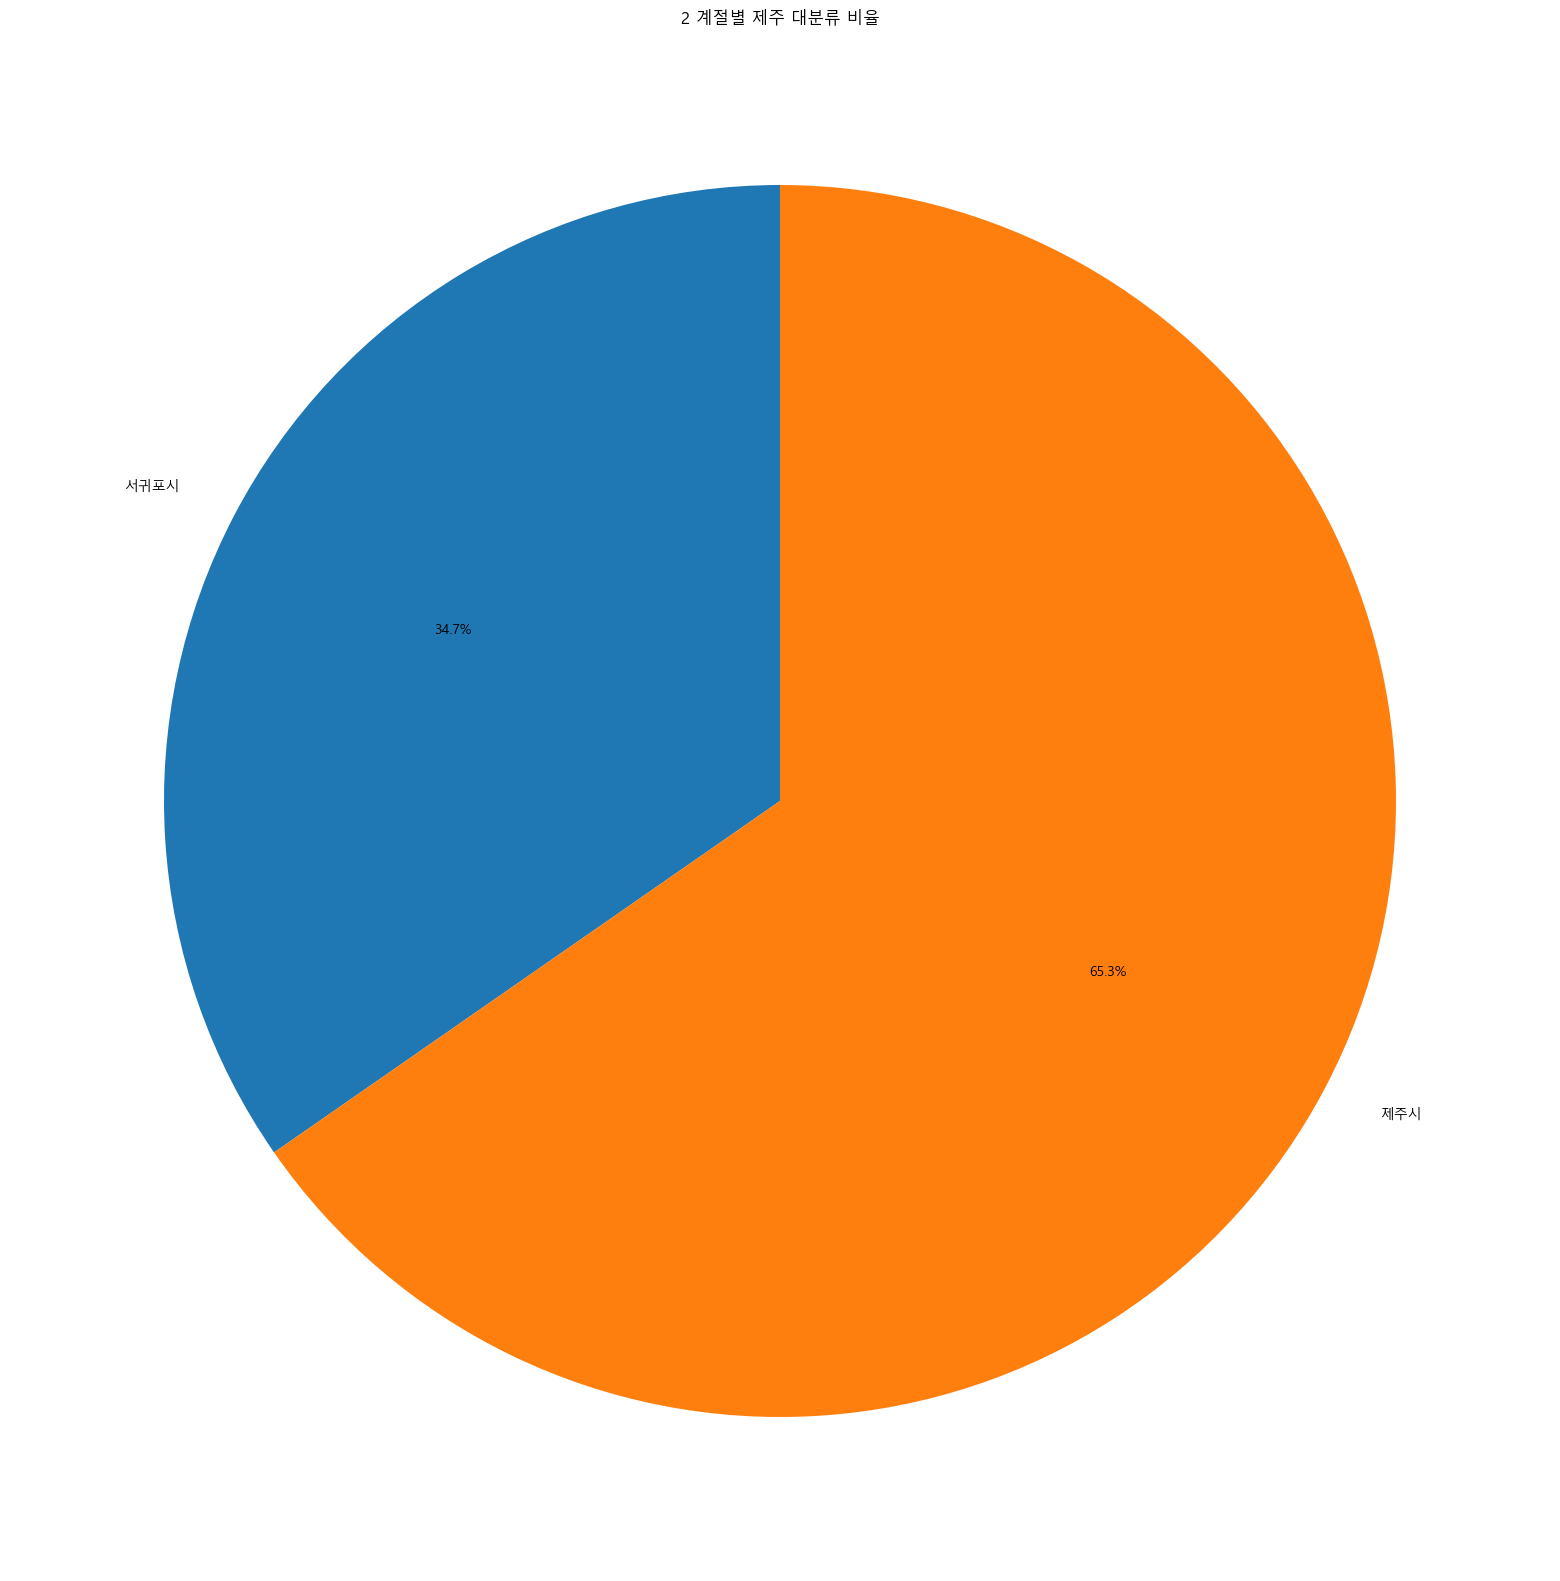

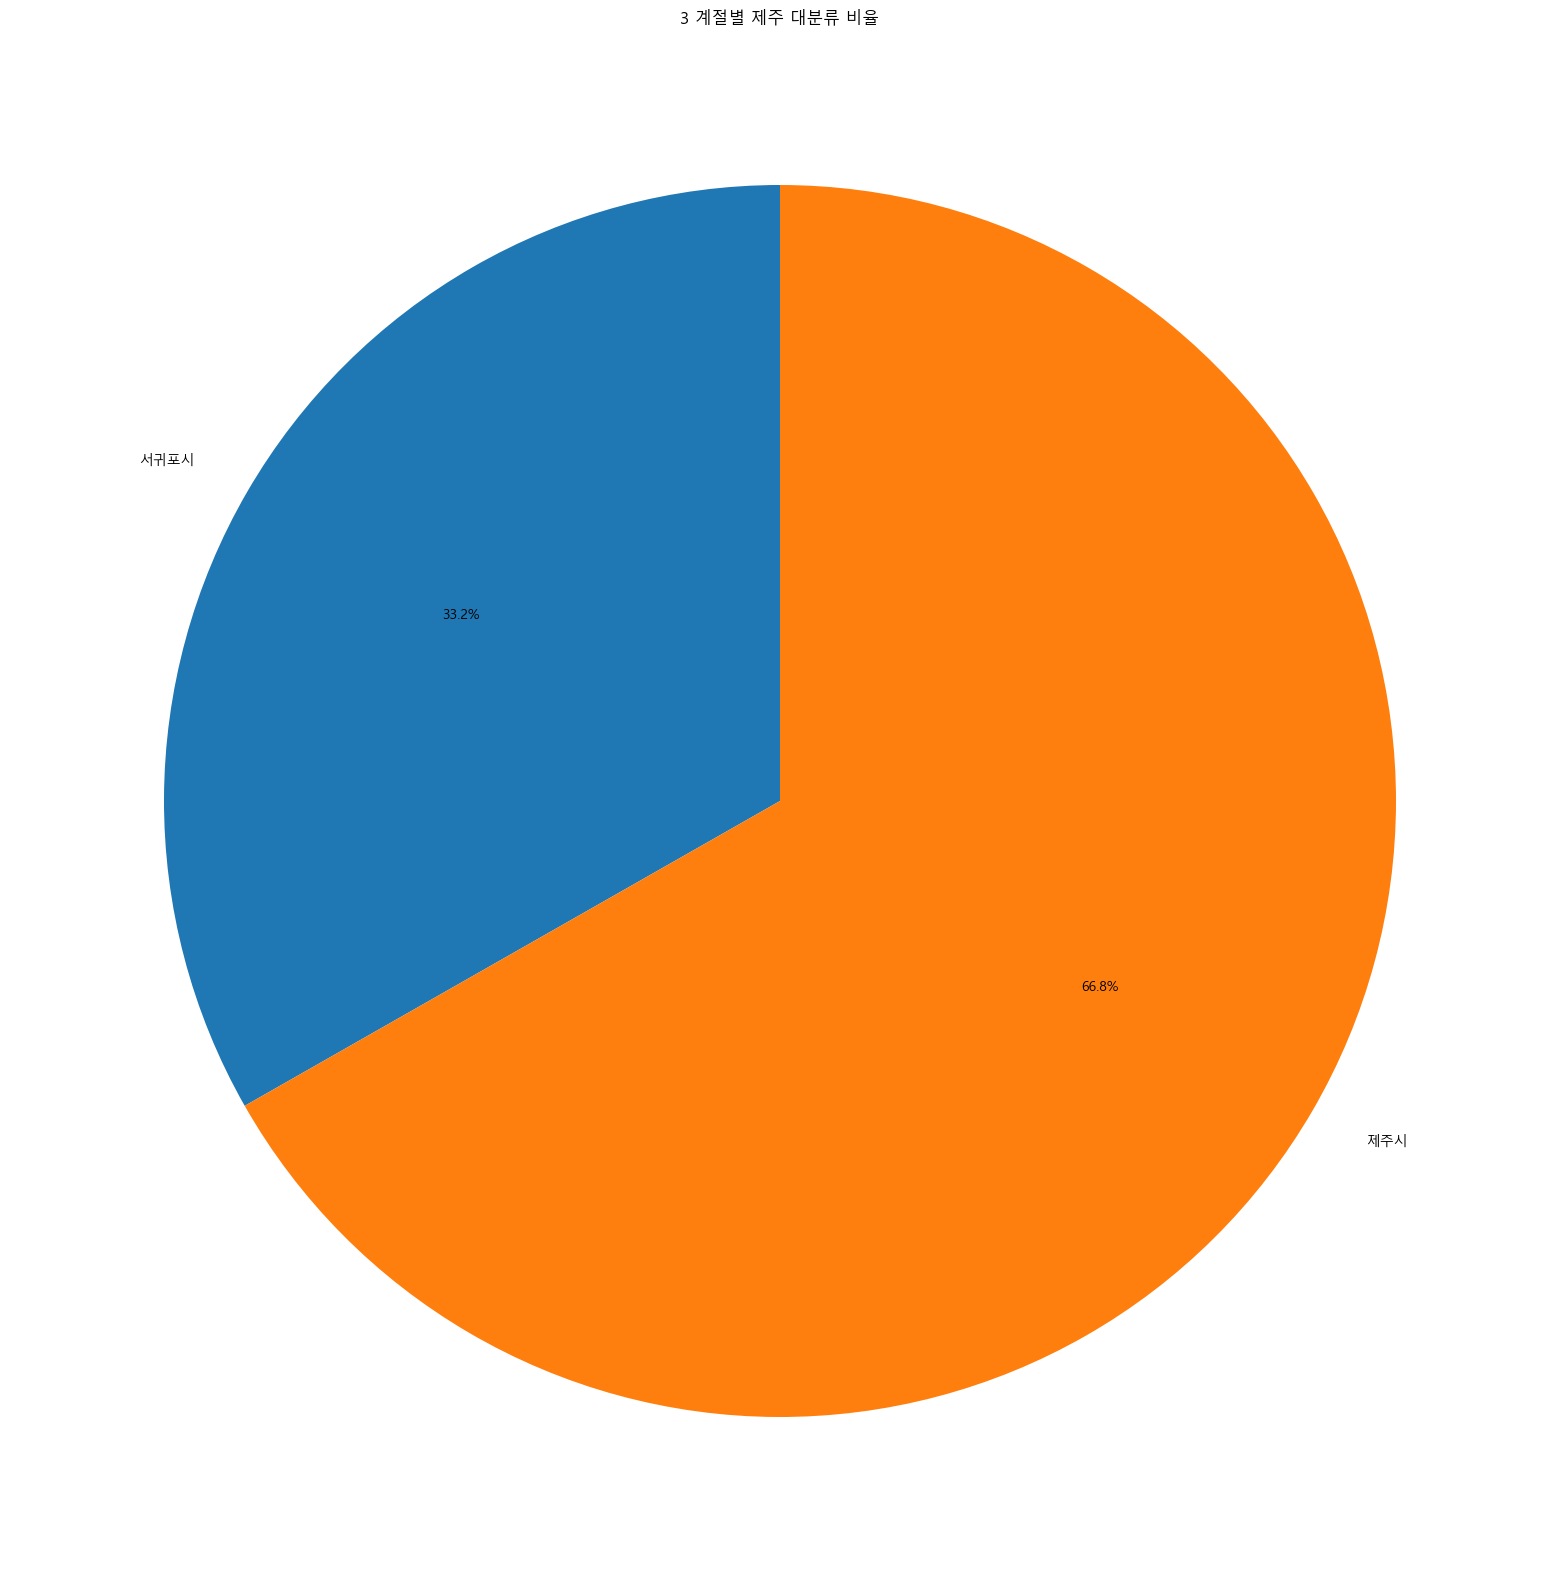

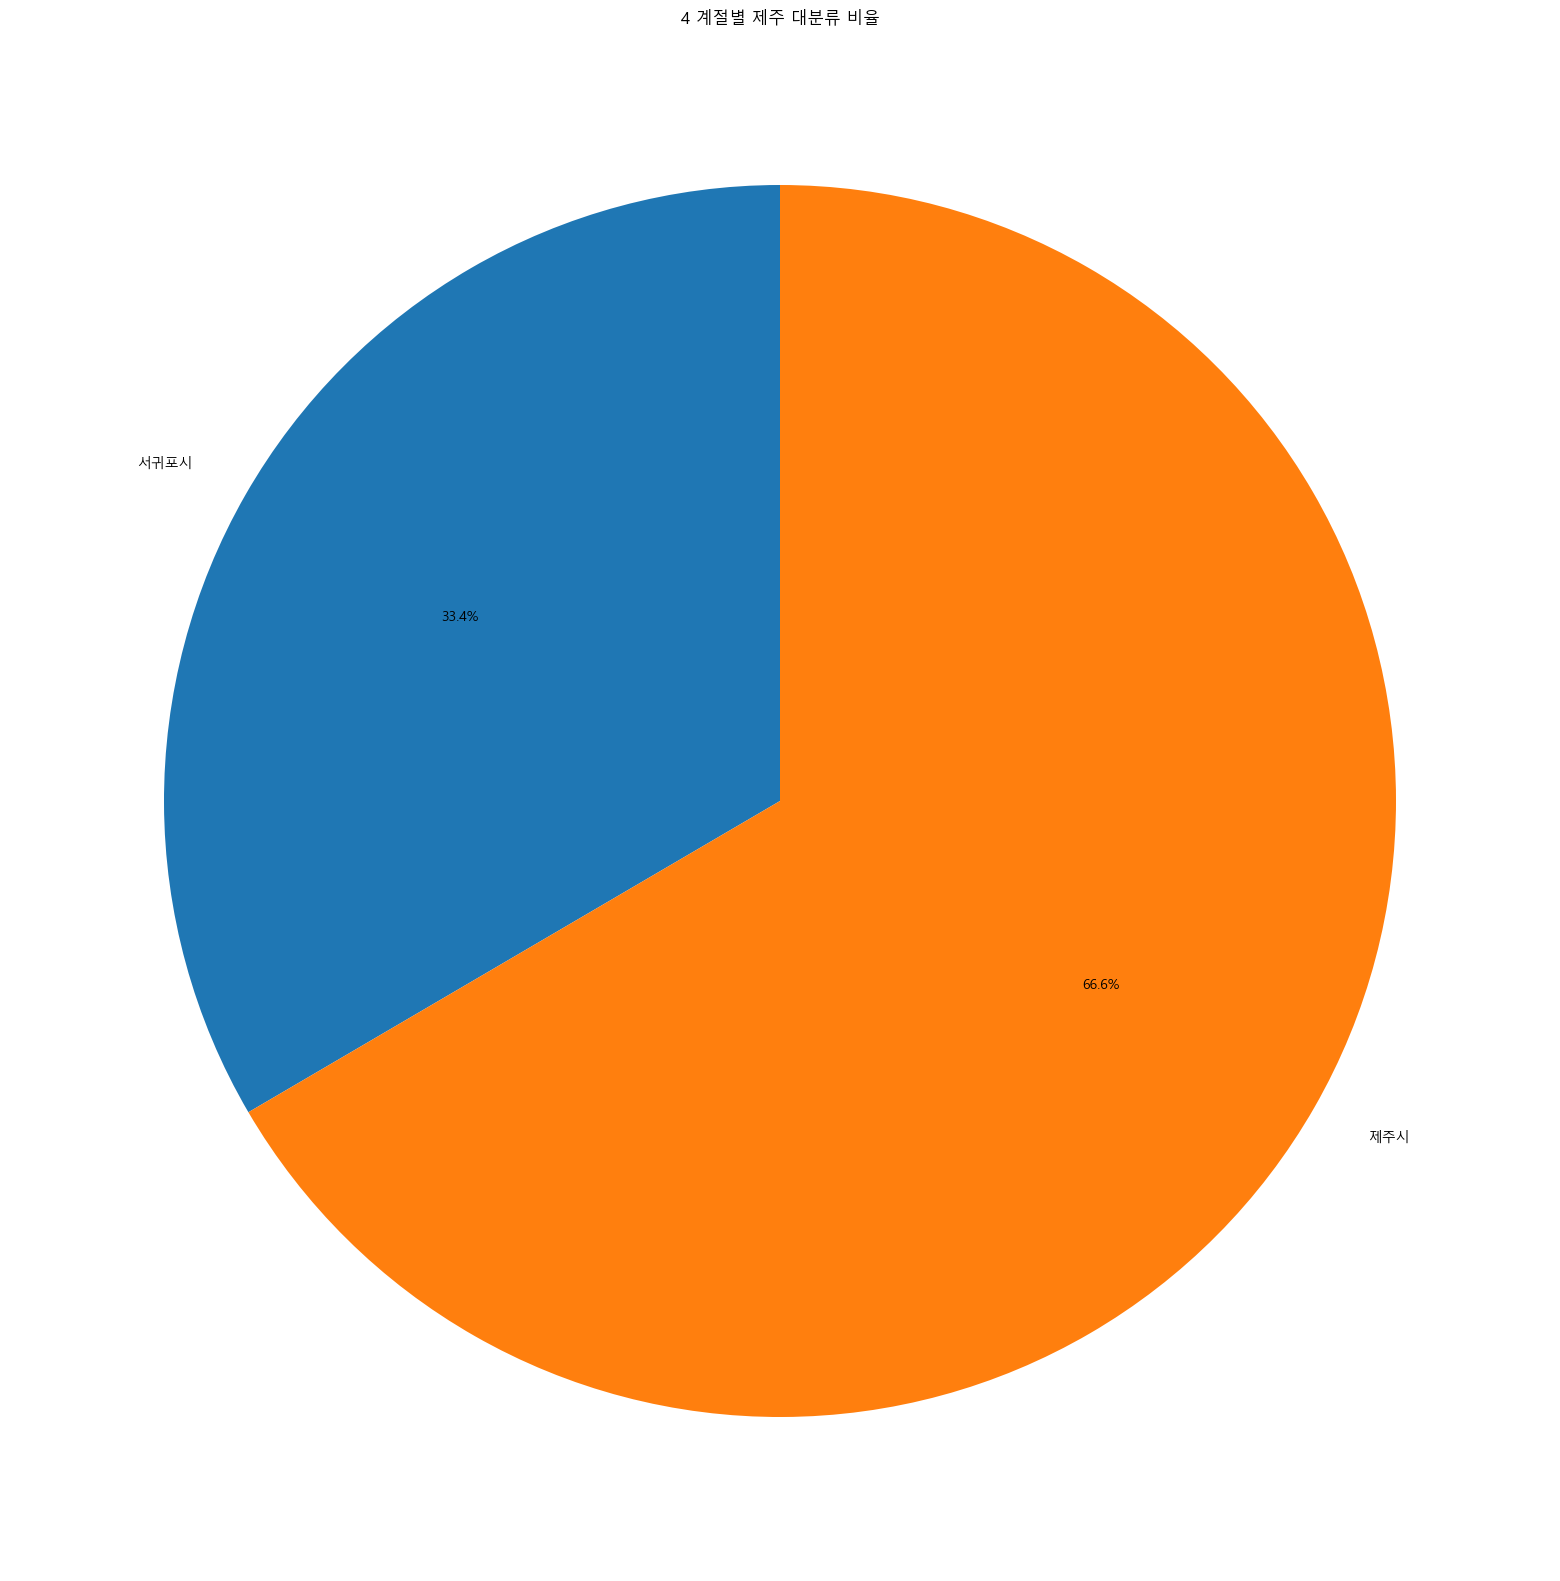

In [76]:
for season_group, data in season_si.groupby('계절'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['제주 대분류'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{season_group} 계절별 제주 대분류 비율')
    plt.show()

- 4계절 모두 비슷한 비율을 가지고 있다

In [97]:
generation_visit=df.groupby(['제주 중분류','연령대별'])['제주 중분류'].count().reset_index(name='count')

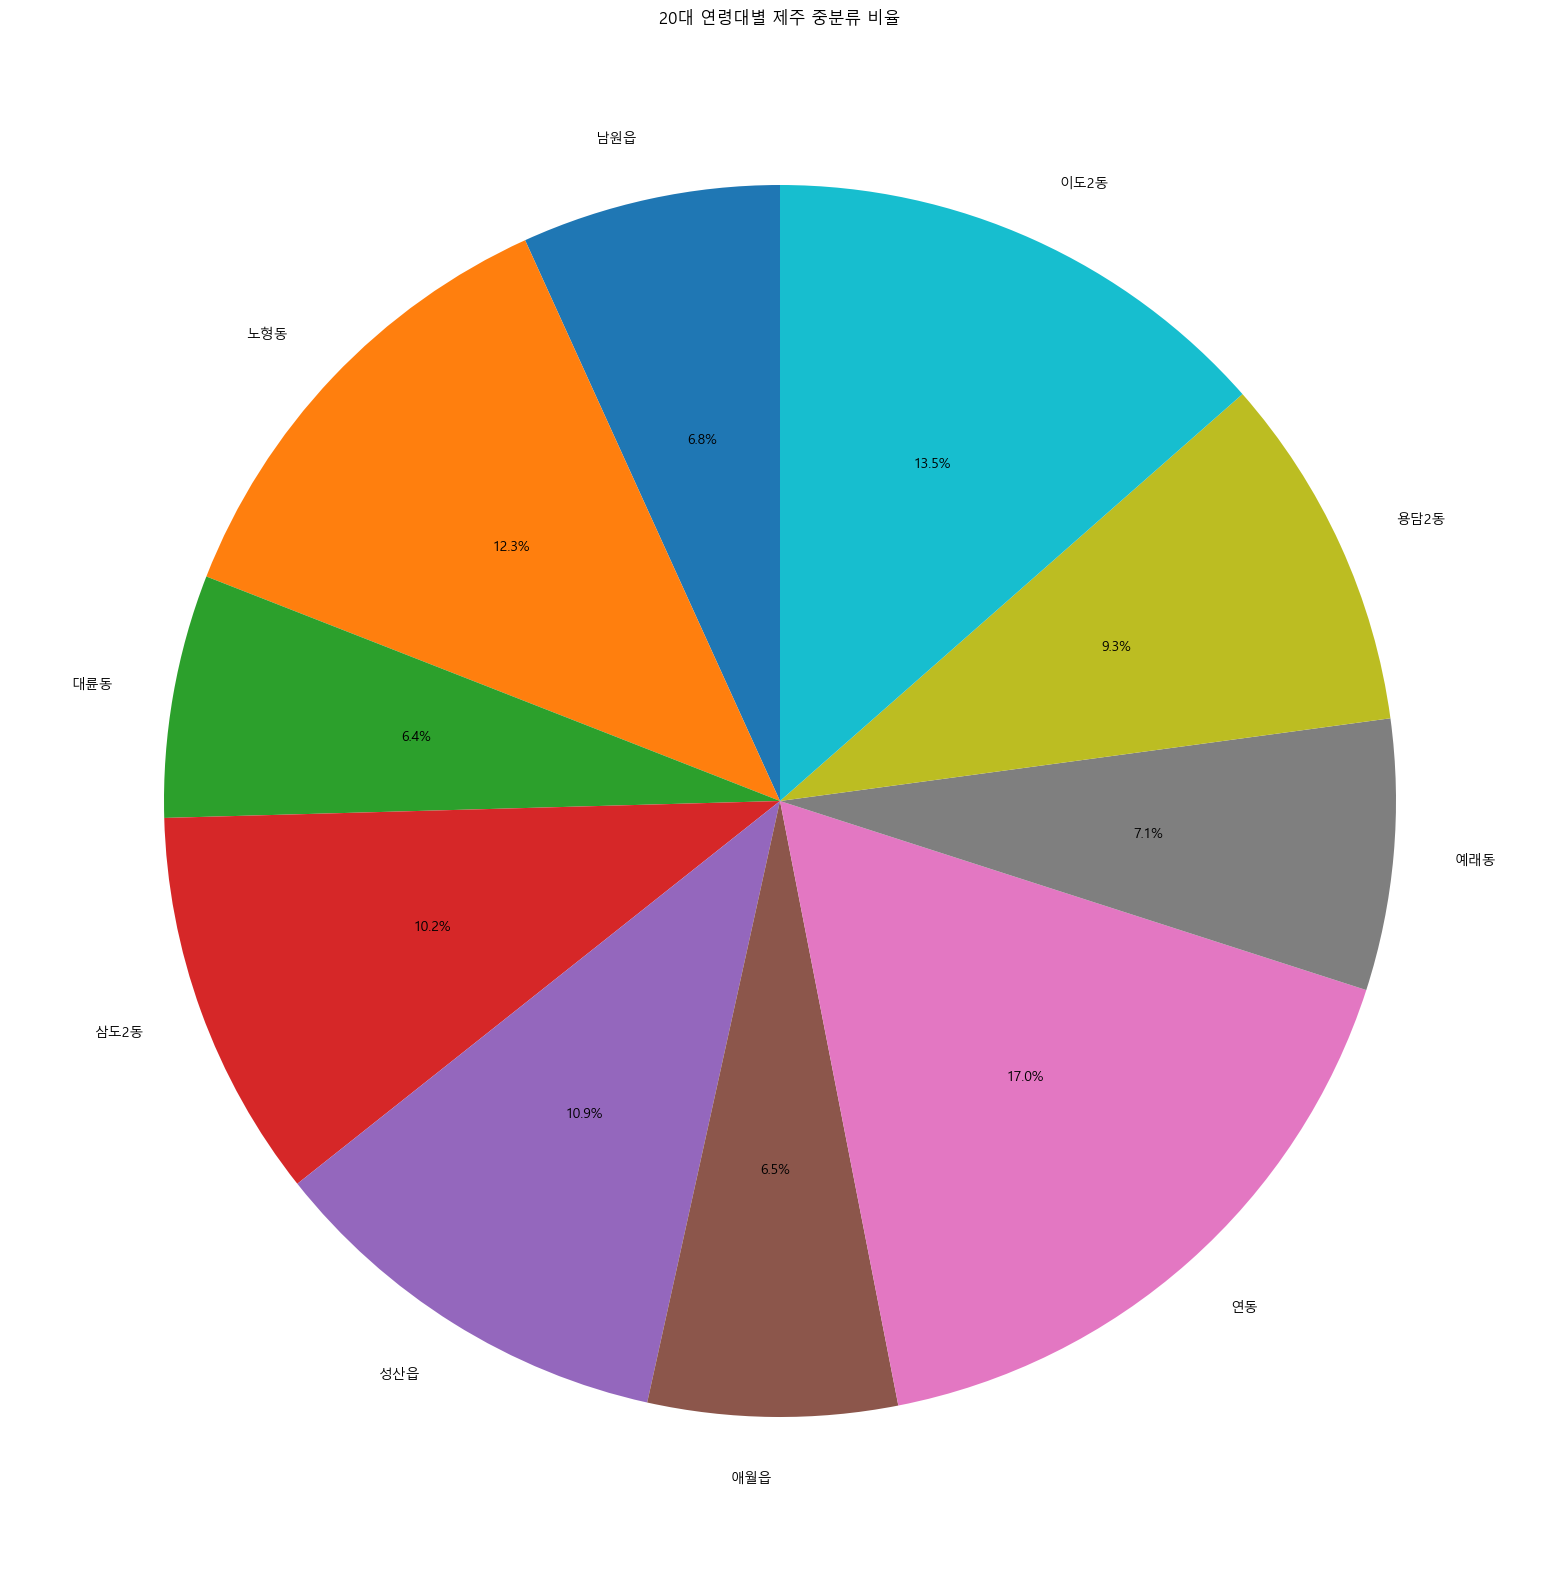

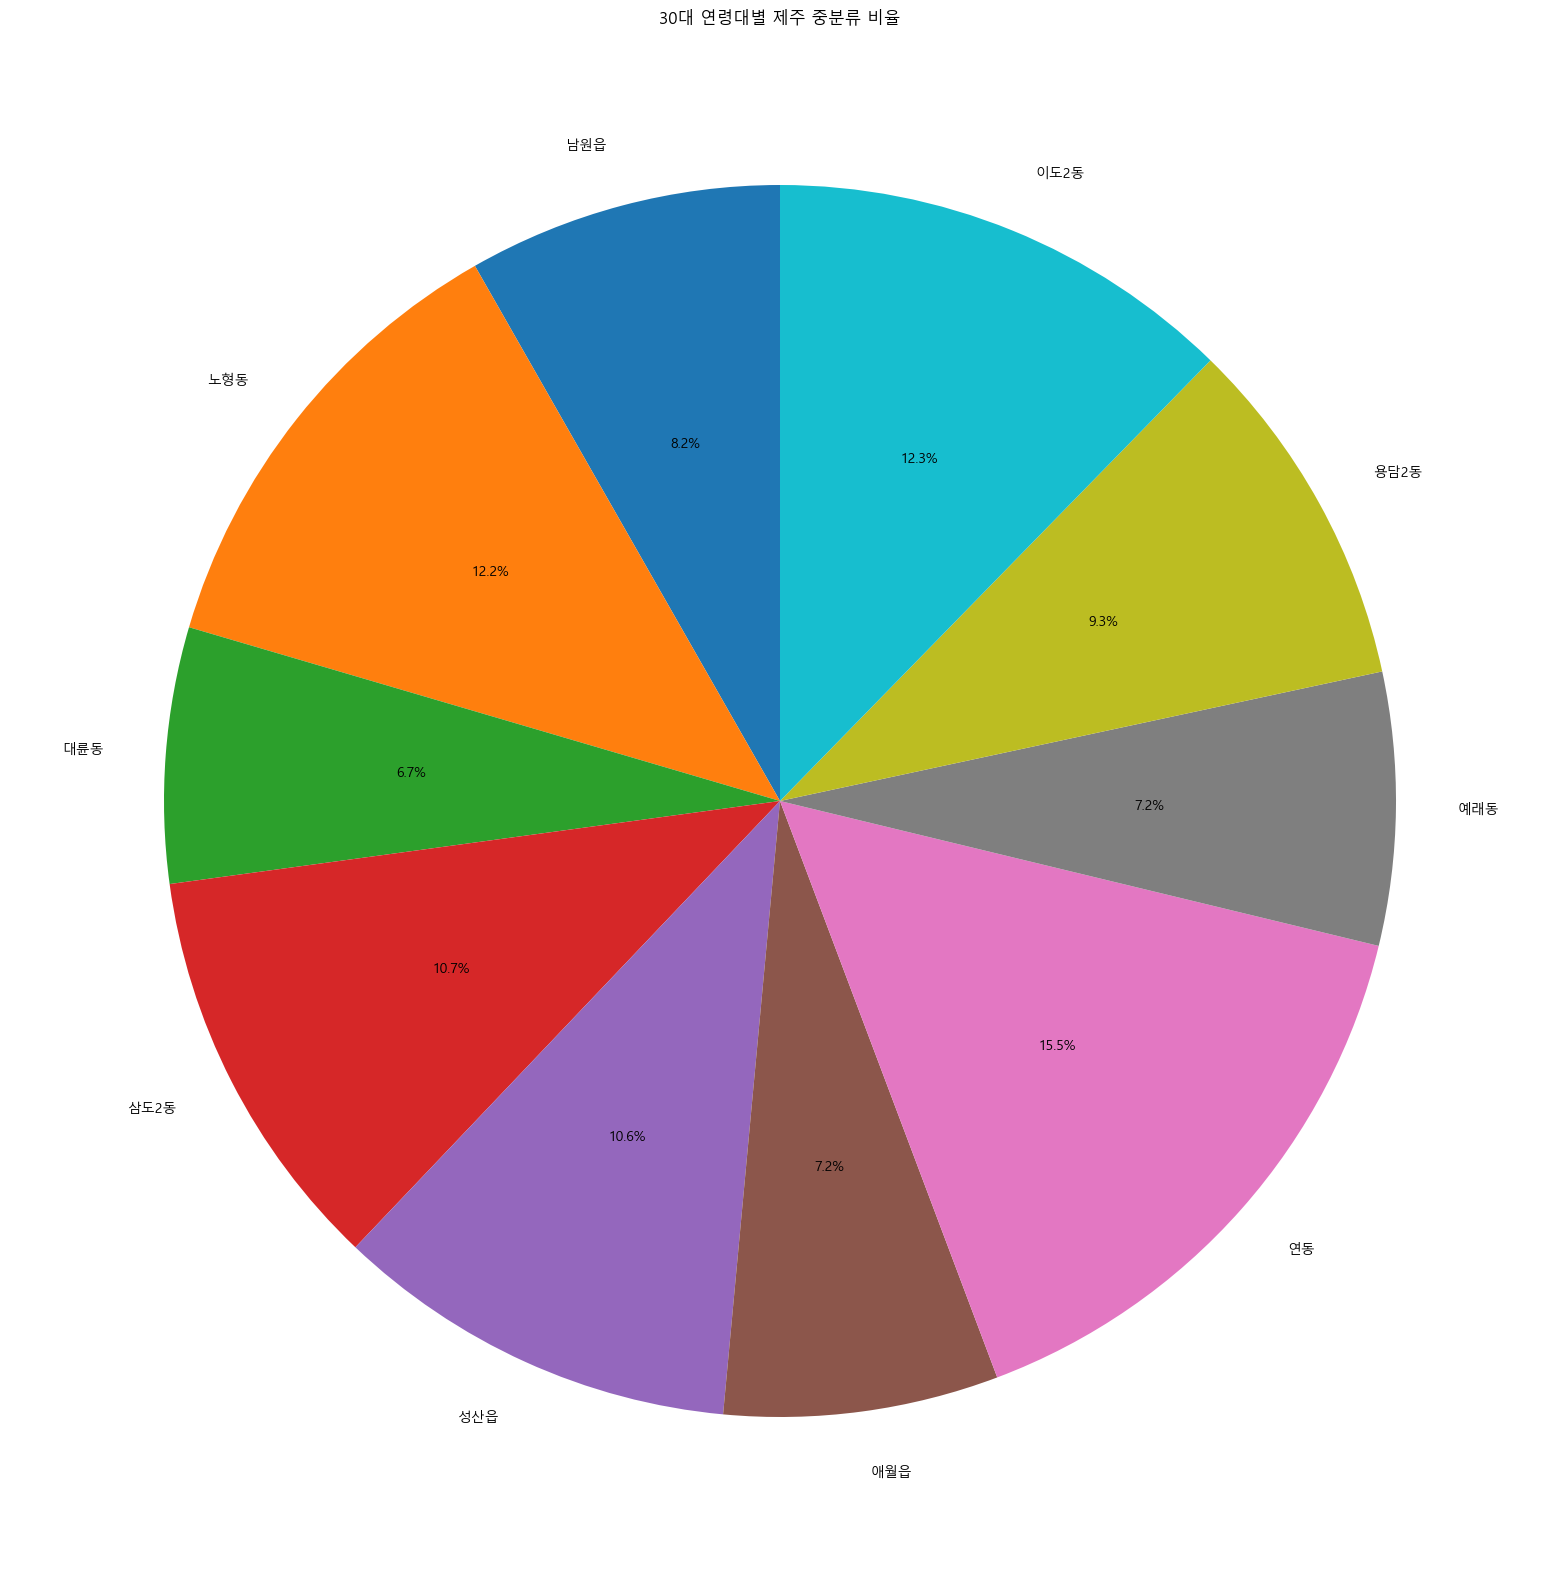

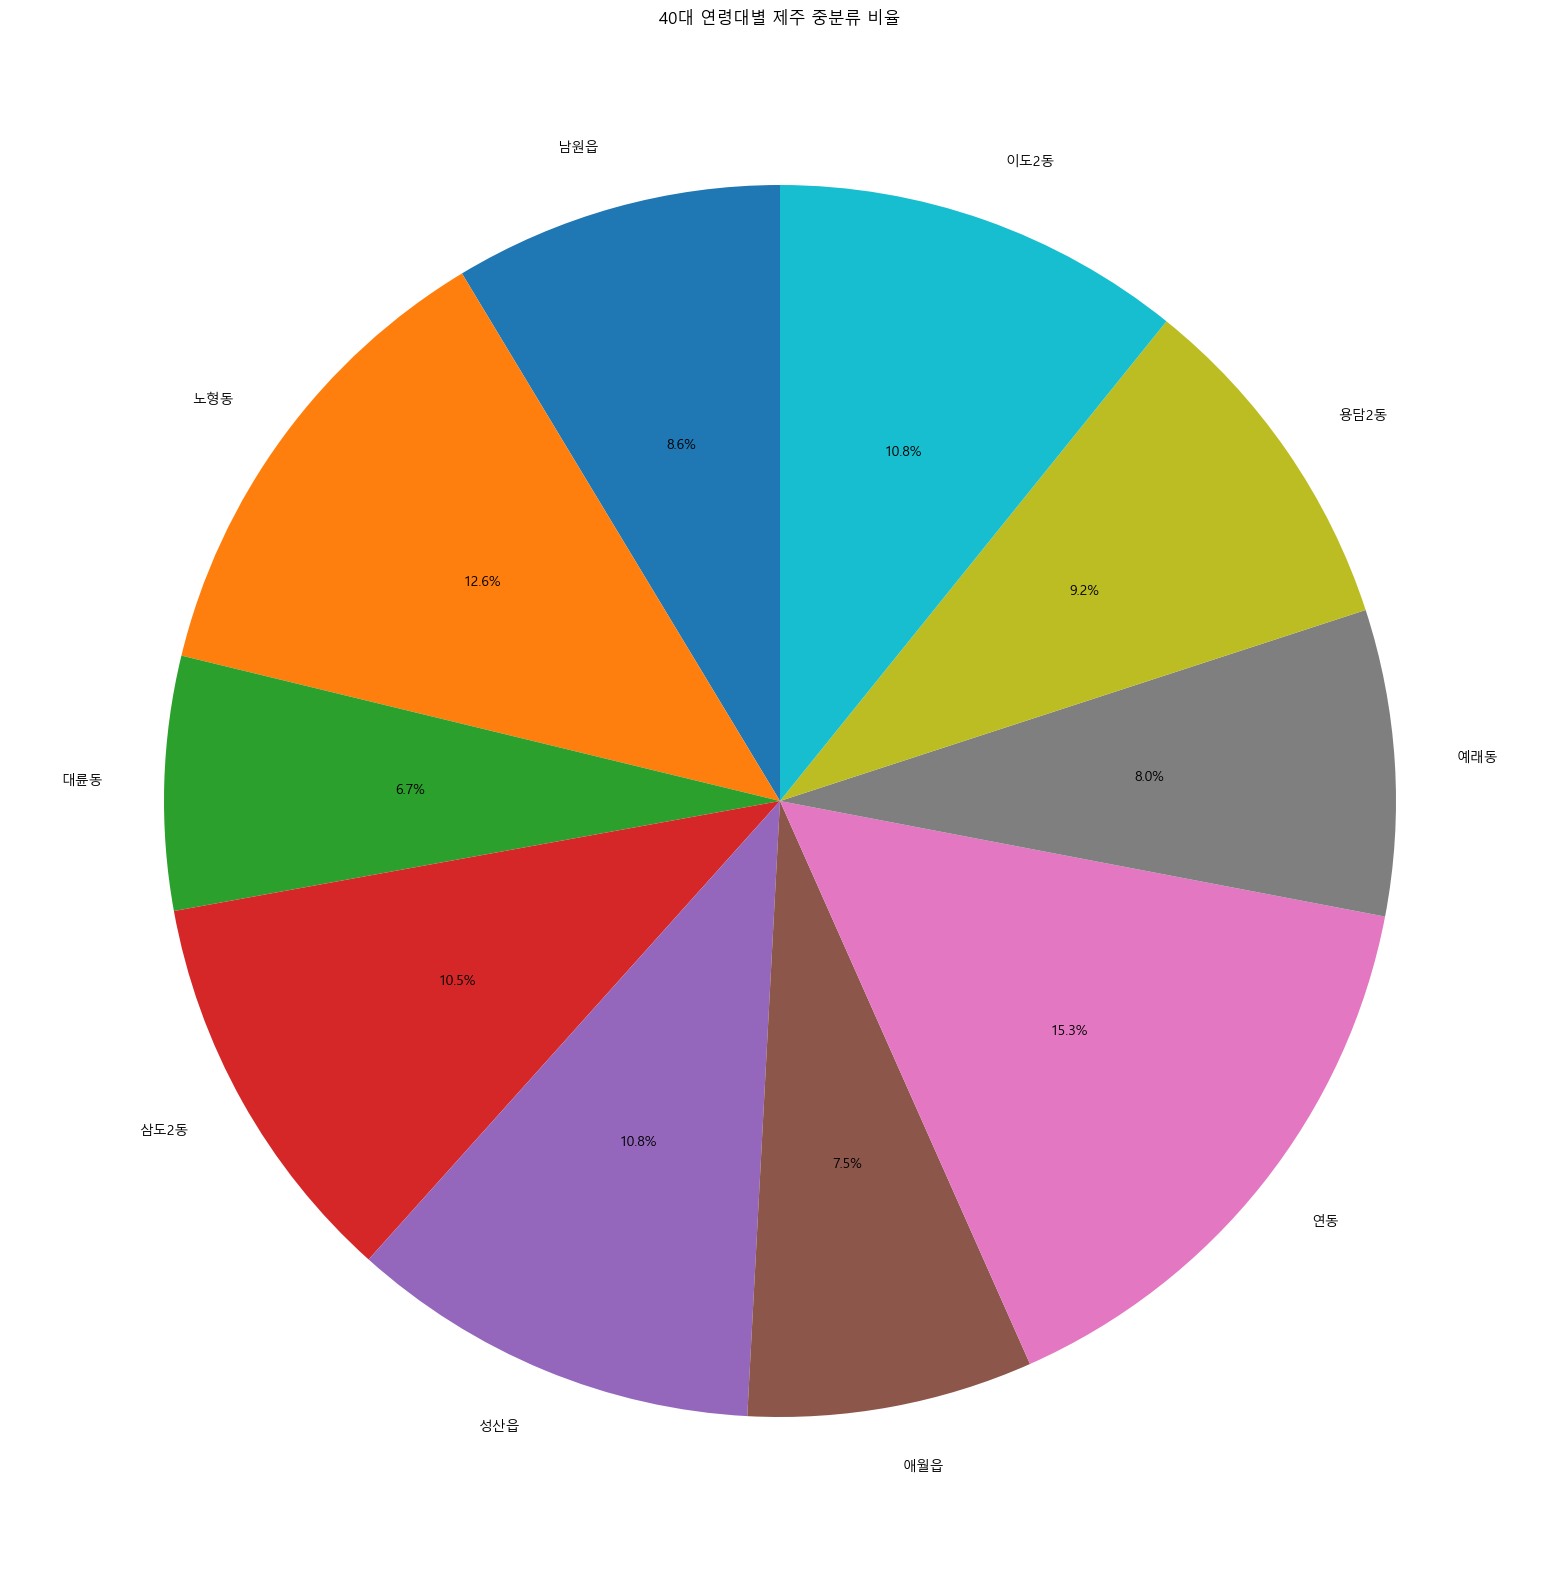

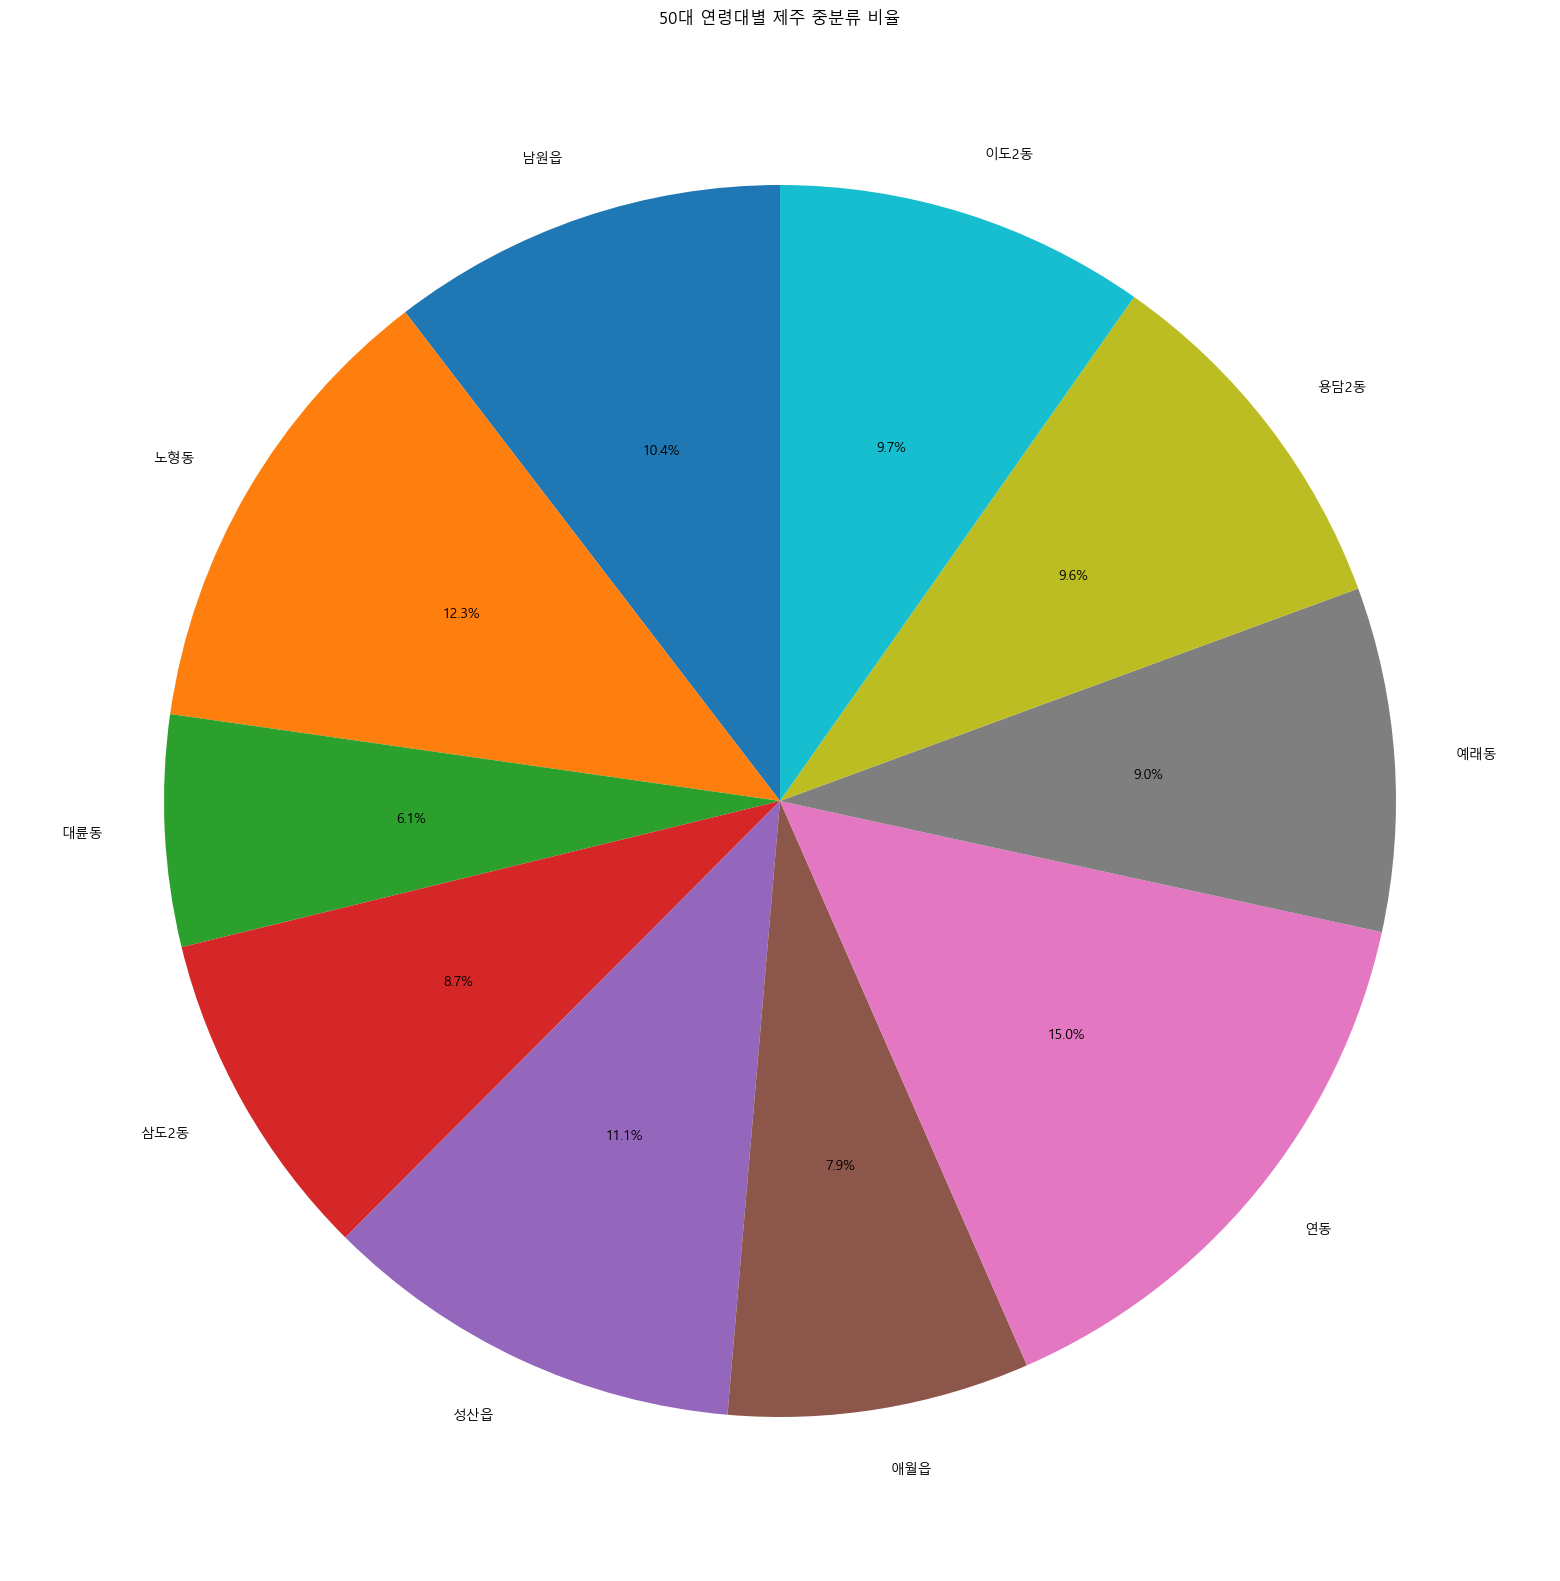

In [98]:
for age_group, data in generation_visit.groupby('연령대별'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['제주 중분류'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{age_group} 연령대별 제주 중분류 비율')
    plt.show()

- 연동과 용담2동은 비슷한 비율로 방문한다
- 예래동과 남원읍은 나이가 많아 질수록 비율이 높아진다
- 이도2동은 20대가 높은 비율로 방문한다

In [99]:
gender_visit=df.groupby(['제주 중분류','성별'])['제주 중분류'].count().reset_index(name='count')

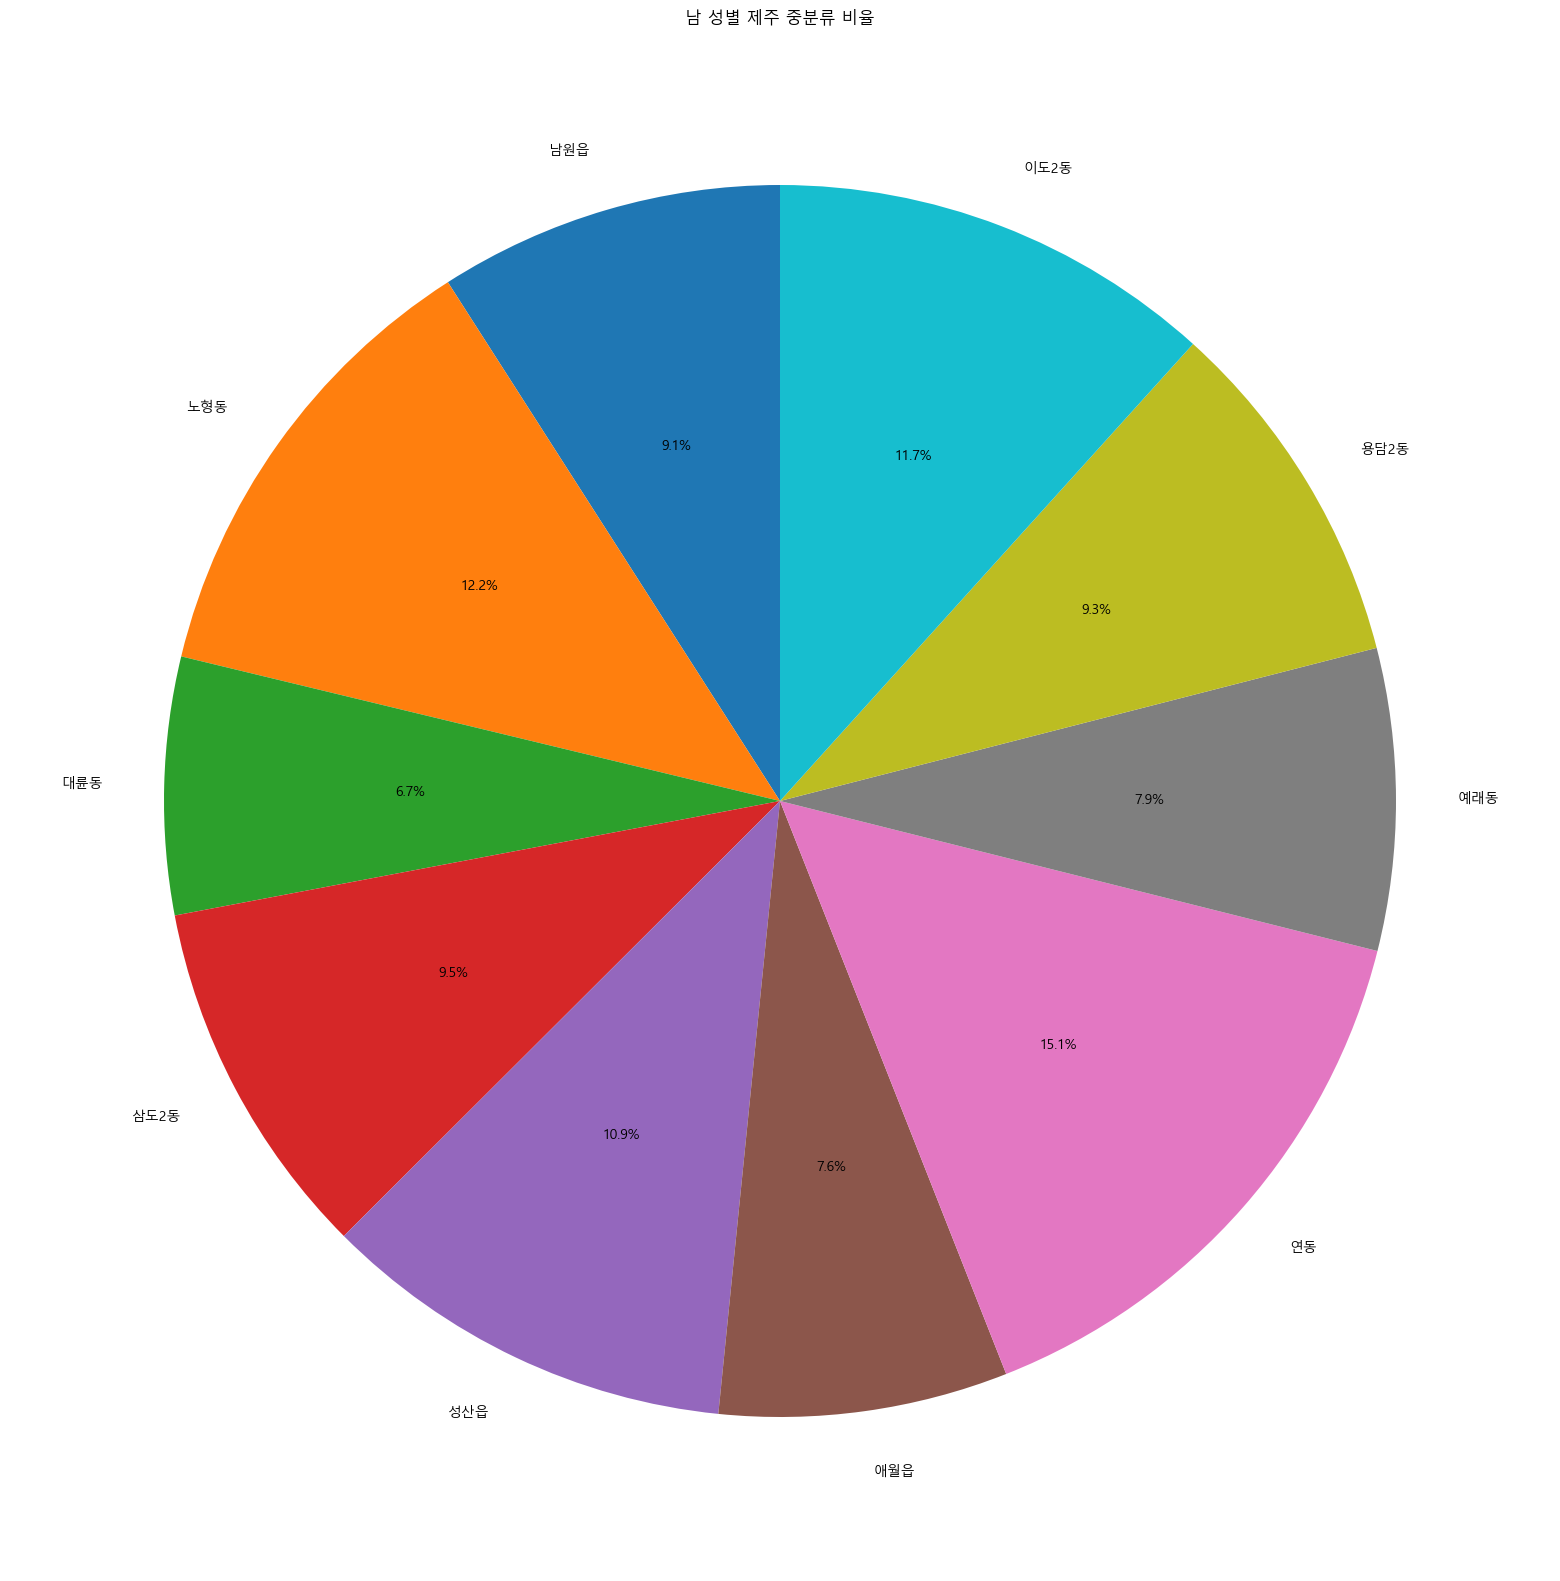

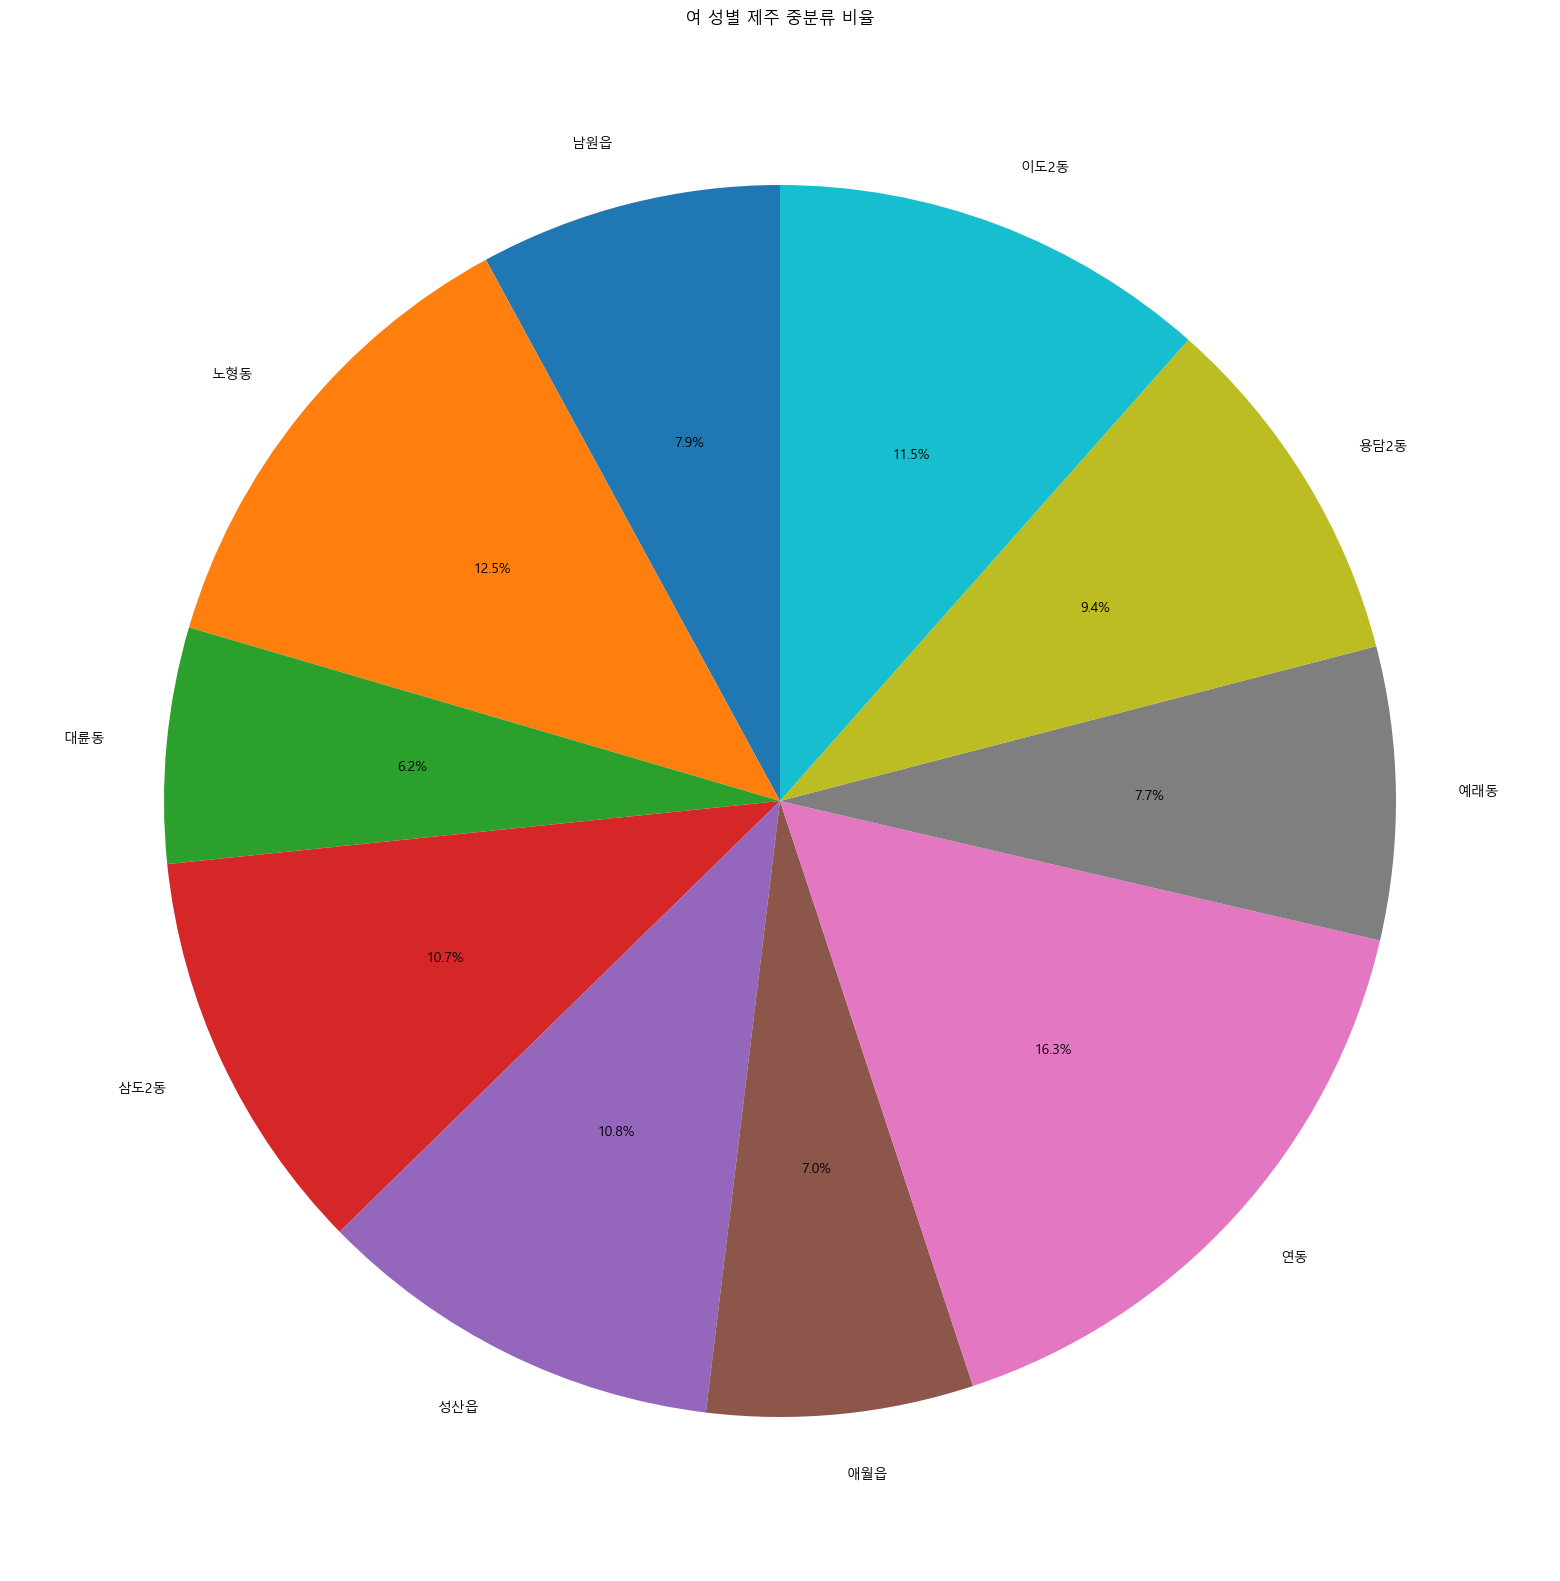

In [100]:
for gender_group, data in gender_visit.groupby('성별'):
    plt.figure(figsize=(20, 20))
    plt.pie(data['count'], labels=data['제주 중분류'], autopct='%1.1f%%', startangle=90)
    plt.title(f'{gender_group} 성별 제주 중분류 비율')
    plt.show()

- 남녀모두 비슷한 비율로 방문한다

# 최종분석
- 총 분석결과를 총합해본 결과 내가 만약 비지니스를 한다면 용담2동에 열것이다. 이유는 모든세대들이 용담2동을 일정 비율 방문을 하고 카드사용 건수와 비용이 제일 높기 때문이다.
- 용담2동의 위치 특성상 여행 첫째날 혹은 마지막날에 방문을 할것으로 예상한다
- 